# Project Five
# Game of Thrones - Word 2 Vec

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords
import spacy
from nltk import Tree
from nltk.grammar import DependencyGrammar
from nltk.parse import DependencyGraph
from nltk.parse import ProjectiveDependencyParser
from nltk.parse import NonprojectiveDependencyParser
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from gensim.models import Word2Vec
from nltk.tag import pos_tag
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

Using Theano backend.


In [2]:
pd.set_option('display.max_columns', 175)

## Importing and Cleaning Dialogue Lists

In [3]:
import pickle

with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s101.pkl', 'rb') as f:
    dialogue101 = pickle.load(f)
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s102.pkl', 'rb') as f:
    dialogue102 = pickle.load(f)
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s103.pkl', 'rb') as f:
    dialogue103 = pickle.load(f)    
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s104.pkl', 'rb') as f:
    dialogue104 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s105.pkl', 'rb') as f:
    dialogue105 = pickle.load(f)    
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s106.pkl', 'rb') as f:
    dialogue106 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s107.pkl', 'rb') as f:
    dialogue107 = pickle.load(f)    
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s108.pkl', 'rb') as f:
    dialogue108 = pickle.load(f)    
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s109.pkl', 'rb') as f:
    dialogue109 = pickle.load(f) 
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s110.pkl', 'rb') as f:
    dialogue110 = pickle.load(f) 
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s501.pkl', 'rb') as f:
    dialogue501 = pickle.load(f)     
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s502.pkl', 'rb') as f:
    dialogue502 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s503.pkl', 'rb') as f:
    dialogue503 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s504.pkl', 'rb') as f:
    dialogue504 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s505.pkl', 'rb') as f:
    dialogue505 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s506.pkl', 'rb') as f:
    dialogue506 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s507.pkl', 'rb') as f:
    dialogue507 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s508.pkl', 'rb') as f:
    dialogue508 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s509.pkl', 'rb') as f:
    dialogue509 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s510.pkl', 'rb') as f:
    dialogue510 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s601.pkl', 'rb') as f:
    dialogue601 = pickle.load(f)     
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s602.pkl', 'rb') as f:
    dialogue602 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s603.pkl', 'rb') as f:
    dialogue603 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s604.pkl', 'rb') as f:
    dialogue604 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s605.pkl', 'rb') as f:
    dialogue605 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s606.pkl', 'rb') as f:
    dialogue606 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s607.pkl', 'rb') as f:
    dialogue607 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s608.pkl', 'rb') as f:
    dialogue608 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s609.pkl', 'rb') as f:
    dialogue609 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s610.pkl', 'rb') as f:
    dialogue610 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s701.pkl', 'rb') as f:
    dialogue701 = pickle.load(f)     
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s702.pkl', 'rb') as f:
    dialogue702 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s703.pkl', 'rb') as f:
    dialogue703 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s704.pkl', 'rb') as f:
    dialogue704 = pickle.load(f)      
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s705.pkl', 'rb') as f:
    dialogue705 = pickle.load(f)   
    
with open('/Users/zoemarkovits/Metis/project_five_got/Dialogue_PKLs/s706.pkl', 'rb') as f:
    dialogue706 = pickle.load(f)     

In [4]:
season_one = (dialogue101 + dialogue102 + dialogue103 + dialogue104 + dialogue105 + dialogue106 + dialogue107
    + dialogue108 + dialogue109 + dialogue110)

season_five = (dialogue501 + dialogue502 + dialogue503 + dialogue504 + dialogue505 + dialogue506 + dialogue507
    + dialogue508 + dialogue509 + dialogue510)

season_six = (dialogue601 + dialogue602 + dialogue603 + dialogue604 + dialogue605 + dialogue606 + dialogue607 
    + dialogue608 + dialogue609 + dialogue610)

season_seven = (dialogue701 + dialogue702 + dialogue703 + dialogue704 + dialogue705 + dialogue706)

In [5]:
corpus = (dialogue101 + dialogue102 + dialogue103 + dialogue104 + dialogue105 + dialogue106 + dialogue107
    + dialogue108 + dialogue109 + dialogue110 + dialogue501 + dialogue502 + dialogue503 + dialogue504 + dialogue505
    + dialogue506 + dialogue507 + dialogue508 + dialogue509 + dialogue510 + dialogue601 + dialogue602 + dialogue603
    + dialogue604 + dialogue605 + dialogue606 + dialogue607 + dialogue608 + dialogue609 + dialogue610 + dialogue701
    + dialogue702 + dialogue703 + dialogue704 + dialogue705 + dialogue706)

In [6]:
episodeS201 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x01TheNorthRemembers.txt', 'r')
dialogue201 = episodeS201.readlines()

episodeS202 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x02TheNightLands.txt', 'r')
dialogue202 = episodeS202.readlines()

episodeS203 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x03WhatisDeadMayNeverDie.txt', 'r')
dialogue203 = episodeS203.readlines()

episodeS204 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x04GardenofBones.txt', 'r')
dialogue204 = episodeS204.readlines()

episodeS205 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x05TheGhostofHarrenhal.txt', 'r')
dialogue205 = episodeS205.readlines()

episodeS206 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x06TheOldGodsandtheNew.txt', 'r')
dialogue206 = episodeS206.readlines()

episodeS207 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x07AManWithoutHonor.txt', 'r')
dialogue207 = episodeS207.readlines()

episodeS208 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x08ThePrinceofWinterfell.txt', 'r')
dialogue208 = episodeS208.readlines()

episodeS209 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x09Blackwater.txt', 'r')
dialogue209 = episodeS209.readlines()

episodeS210 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s02/2x10ValarMorghulis.txt', 'r')
dialogue210 = episodeS210.readlines()

episodeS301 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x01ValarDohaeris.txt', 'r')
dialogue301 = episodeS301.readlines()

episodeS302 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x02DarkWingsDarkWords.txt', 'r')
dialogue302 = episodeS302.readlines()

episodeS303 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x03WalkofPunishment.txt', 'r')
dialogue303 = episodeS303.readlines()

episodeS304 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x04AndNowHisWatchisEnded.txt', 'r')
dialogue304 = episodeS304.readlines()

episodeS305 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x05KissedbyFire.txt', 'r')
dialogue305 = episodeS305.readlines()

episodeS306 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x06TheClimb.txt', 'r')
dialogue306 = episodeS306.readlines()

episodeS307 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x07TheBearandtheMaidenFair.txt', 'r')
dialogue307 = episodeS307.readlines()

episodeS308 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x08SecondSons.txt', 'r')
dialogue308 = episodeS308.readlines()

episodeS309 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x09TheRainsofCastamere.txt', 'r')
dialogue309 = episodeS309.readlines()

episodeS310 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s03/3x10Mhysa.txt', 'r')
dialogue310 = episodeS310.readlines()

episodeS401 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x01TwoSwords.txt', 'r')
dialogue401 = episodeS401.readlines()

episodeS402 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x02TheLionandtheRose.txt', 'r')
dialogue402 = episodeS402.readlines()

episodeS403 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x03BreakerofChains.txt', 'r')
dialogue403 = episodeS403.readlines()

episodeS404 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x04Oathkeeper.txt', 'r')
dialogue404 = episodeS404.readlines()

episodeS405 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x05FirstofHisName.txt', 'r')
dialogue405 = episodeS405.readlines()

episodeS406 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x06TheLawsofGodsandMen.txt', 'r')
dialogue406 = episodeS406.readlines()

episodeS407 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x07Mockingbird.txt', 'r')
dialogue407 = episodeS407.readlines()

episodeS408 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x08TheMountainandtheViper.txt', 'r')
dialogue408 = episodeS408.readlines()

episodeS409 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x09TheWatchersontheWall.txt', 'r')
dialogue409 = episodeS409.readlines()

episodeS410 = open('/Users/zoemarkovits/Metis/project_five_got/s01_s05_subs/s04/4x10TheChildren.txt', 'r')
dialogue410 = episodeS410.readlines()

In [7]:
dialogue201 = ' '.join(dialogue201)
dialogue202 = ' '.join(dialogue202)
dialogue203 = ' '.join(dialogue203)
dialogue204 = ' '.join(dialogue204)
dialogue205 = ' '.join(dialogue205)
dialogue206 = ' '.join(dialogue206)
dialogue207 = ' '.join(dialogue207)
dialogue208 = ' '.join(dialogue208)
dialogue209 = ' '.join(dialogue209)
dialogue210 = ' '.join(dialogue210)

dialogue301 = ' '.join(dialogue301)
dialogue302 = ' '.join(dialogue302)
dialogue303 = ' '.join(dialogue303)
dialogue304 = ' '.join(dialogue304)
dialogue305 = ' '.join(dialogue305)
dialogue306 = ' '.join(dialogue306)
dialogue307 = ' '.join(dialogue307)
dialogue308 = ' '.join(dialogue308)
dialogue309 = ' '.join(dialogue309)
dialogue310 = ' '.join(dialogue310)

dialogue401 = ' '.join(dialogue401)
dialogue402 = ' '.join(dialogue402)
dialogue403 = ' '.join(dialogue403)
dialogue404 = ' '.join(dialogue404)
dialogue405 = ' '.join(dialogue405)
dialogue406 = ' '.join(dialogue406)
dialogue407 = ' '.join(dialogue407)
dialogue408 = ' '.join(dialogue408)
dialogue409 = ' '.join(dialogue409)
dialogue410 = ' '.join(dialogue410)

In [8]:
dialogue201 = dialogue201.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>\r\n','')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace('== sync, corrected by <font color="#ff"elderman</font ==,  ,\
<font color="#ffff" size=www.tvsubtitles.net</font',' ')

dialogue202 = dialogue202.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-', ' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('Download Movie Subtitles Searcher from www.OpenSubtitles.org','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace('== sync, corrected by <font color="#ff"elderman</font ==,  ,\
<font color="#ffff" size=www.tvsubtitles.net</font',' ')

dialogue203 = dialogue203.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-', ' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue204 = dialogue204.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue205 = dialogue205.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue206 = dialogue206.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue207 = dialogue207.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('~[ Synced by <font color="#0080FF">Bo\xc5\xbe\xc3\xad \xc4\x8e\xc3\xa1bel</font> ]~','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue208 = dialogue208.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('~[ Synced by <font color="#0080FF">Bo\xc5\xbe\xc3\xad \xc4\x8e\xc3\xa1bel</font> ]~','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue209 = dialogue209.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('lafabrique.fbk (at) gmail.com','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue210 = dialogue210.replace('\xef\xbb\xbf','').replace('\r\n',' ').replace('-->',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('-',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('\xc3\x8f\xc3\x82\xc3\x94\xc3\x98\xc3\x97\xc3\xae\xc3\x90\xc3\x82\xc3\x83\xc3\x80\xc2\xbe\xc3\xa7\xc3\x97\xc3\x96\xc3\x84\xc2\xbb\xc2\xa3\xc2\xac\xc2\xbe\xc2\xb4\xc3\x87\xc3\xab\xc2\xb7\xc3\x83\xc3\x8e\xc3\x8a\xc2\xa3\xc2\xba\r\n \xc3\x8c\xc3\xac\xc3\x8c\xc3\xac\xc3\x97\xc3\x96\xc3\x84\xc2\xbb http://sub.ttfree.org','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

In [9]:
dialogue301 = dialogue301.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue302 = dialogue302.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','').replace('\xe2\x99\xaa',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue303 = dialogue303.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('\xe2\x99\xaa',' ').replace('font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue304 = dialogue304.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('Sync & corrections by honeybunny','').replace('www.addic7ed.com','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue305 = dialogue305.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('\xe2\x99\xaa',' ').replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue306 = dialogue306.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('\xe2\x99\xaa',' ').replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue307 = dialogue307.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ')\
.replace('\xe2\x99\xaa',' ').replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue308 = dialogue308.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue309 = dialogue309.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xe2\x99\xaa',' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue310 = dialogue310.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf',' ').replace('\xe2\x99\xaa',' ')\
.replace('== sync, corrected by <font color="#00ff00">elderman</font> ==','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

In [10]:
dialogue401 = dialogue401.replace('\r\n',' ').replace('-->',' ').replace('-',' ').replace('\n',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xef\xbb\xbf1',' ')\
.replace('\xe2\x99\xaa',' ').replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue402 = dialogue402.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\xe2\x80\x94',' ').replace('\xe2\x80\x93',' ')\
.replace('\xc2\xbb',' ').replace('\xc2\xab',' ').replace('\xc2\xbb',' ').replace('\xe2\x99\xaa',' ')\
.replace('Sync & corrections by <b>honeybunny</b>','').replace('\n',' ')\
.replace('<b>\xe2\x80\x94=\xc2\xabO\xc2\xbb=\xe2\x80\x94</b>','')\
.replace('<b>www.addic7ed.com','').replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace(' <b> = O = </b> ','')

dialogue403 = dialogue403.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','').replace('\n',' ')\
.replace('Repair and Synchronization by\r\n Easy Subtitles Synchronizer',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')\
.replace('Repair and Synchronization by  Easy Subtitles Synchronizer','')

dialogue404 = dialogue404.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue405 = dialogue405.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue406 = dialogue406.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny.','').replace('Corrected by SalilGoyal</font>','')\
.replace('<font color="#ec14bd">Sync & corrections by honeybunny</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>',' ')

dialogue407 = dialogue407.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue408 = dialogue408.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue409 = dialogue409.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('<font color="#ec14bd">Original sub by honeybunny</font>','')\
.replace('<font color="#ec14bd">www.addic7ed.com</font>','')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

dialogue410 = dialogue410.replace('\r\n',' ').replace('-->',' ').replace('-',' ')\
.replace('<i>',' ').replace('</i>',' ').replace('--', ' ').replace('\n',' ')\
.replace('\xef\xbb\xbf1',' ')\
.replace('<font color="#ffff00" size=14>www.tvsubtitles.net</font>','')

In [11]:
corpus2 = (dialogue201 + dialogue202 + dialogue203 + dialogue204 + dialogue205 + dialogue206 + dialogue207 
           + dialogue208 + dialogue209 + dialogue210 + dialogue301 + dialogue302 + dialogue303 + dialogue304
           + dialogue305 + dialogue306 + dialogue307 + dialogue308 + dialogue309 + dialogue310 + dialogue401
           + dialogue402 + dialogue403 + dialogue404 + dialogue405 + dialogue406 + dialogue407 + dialogue408
           + dialogue409 + dialogue410)

corpus2 = ''.join([i for i in corpus2 if not i.isdigit()])
corpus2 = corpus2.replace('::','')

In [12]:
#corpus2

In [13]:
corpus2 = sent_tokenize(corpus2)

In [14]:

corpus2 = [i.replace(',','').split() for i in corpus2]


In [15]:
corpus2[10]

['My', 'deepest', 'apologies.']

In [16]:
corpus2 =[' '.join(sent) for sent in corpus2]
corpus2[100]

"Quite right you did nothing when your son called for Ned Stark's head."

In [17]:
total_corpus = corpus2 + corpus

In [18]:
type(total_corpus)

list

In [19]:
len(total_corpus)

28767

## Dataframes by Season

In [20]:
from collections import defaultdict

characters = defaultdict(list)
for sentence in corpus:
    characters[sentence.split(':')[0]].append(sentence.split(':')[1])

#characters

In [21]:
S1_Names = ['Arya Stark', 'Cersei Baratheon', 'Daenerys Targaryen', 'Sansa Stark', 'Jaime Lannister', 'Jon Snow', 'Tyrion Lannister']

S5_Names = ['ARYA', 'CERSEI', 'DAENERYS', 'SANSA', 'JAIME', 'JON', 'TYRION']

S6_Names = ['ARYA', 'CERSEI', 'DAENERYS', 'SANSA', 'JAIME', 'JON SNOW', 'TYRION']

S7_Names = ['ARYA', 'CERSEI', 'DAENERYS', 'SANSA', 'JAIME', 'JON', 'TYRION']

In [22]:
from collections import defaultdict

season_one_text = defaultdict(list)
for sentence in season_one:
    if sentence.split(':')[0] in (S1_Names):
        season_one_text[sentence.split(':')[0]].append(sentence.split(':')[1])

season_five_text = defaultdict(list)
for sentence in season_five:
    if sentence.split(':')[0] in (S5_Names):
        season_five_text[sentence.split(':')[0]].append(sentence.split(':')[1])

season_six_text = defaultdict(list)
for sentence in season_six:
    if sentence.split(':')[0] in (S6_Names):
        season_six_text[sentence.split(':')[0]].append(sentence.split(':')[1])

season_seven_text = defaultdict(list)
for sentence in season_seven:
    if sentence.split(':')[0] in (S7_Names):
        season_seven_text[sentence.split(':')[0]].append(sentence.split(':')[1])

In [23]:
#Arya
AryaS1 = season_one_text['Arya Stark']
AryaS5 = season_five_text['ARYA']
AryaS6 = season_six_text['ARYA']
AryaS7 = season_seven_text['ARYA']

In [24]:
#Cersei
CerseiS1 = season_one_text['Cersei Baratheon']
CerseiS5 = season_five_text['CERSEI']
CerseiS6 = season_six_text['CERSEI']
CerseiS7 = season_seven_text['CERSEI']

In [25]:
#Daenerys
DaenerysS1 = season_one_text['Daenerys Targaryen']
DaenerysS5 = season_five_text['DAENERYS']
DaenerysS6 = season_six_text['DAENERYS']
DaenerysS7 = season_seven_text['DAENERYS']

In [26]:
#Sansa
SansaS1 = season_one_text['Sansa Stark']
SansaS5 = season_five_text['SANSA']
SansaS6 = season_six_text['SANSA']
SansaS7 = season_seven_text['SANSA']

In [27]:
#Jaime
JaimeS1 = season_one_text['Jaime Lannister']
JaimeS5 = season_five_text['JAIME']
JaimeS6 = season_six_text['JAIME']
JaimeS7 = season_seven_text['JAIME']

In [28]:
#Jon
JonS1 = season_one_text['Jon Snow']
JonS5 = season_five_text['JON']
JonS6 = season_six_text['JON SNOW']
JonS7 = season_seven_text['JON']

In [29]:
#Tyrion
TyrionS1 = season_one_text['Tyrion Lannister']
TyrionS5 = season_five_text['TYRION']
TyrionS6 = season_six_text['TYRION']
TyrionS7 = season_seven_text['TYRION']

In [30]:
season_one_dialogue = pd.DataFrame.from_dict(season_one_text, orient="index")
season_five_dialogue = pd.DataFrame.from_dict(season_five_text, orient="index")
season_six_dialogue = pd.DataFrame.from_dict(season_six_text, orient="index")
season_seven_dialogue = pd.DataFrame.from_dict(season_seven_text, orient="index")

In [31]:
season_one_dict = {'Daenerys Targaryen':'DAENERYS', 'Cersei Baratheon':'CERSEI', 'Arya Stark':'ARYA',
       'Tyrion Lannister':'TYRION', 'Sansa Stark':'SANSA', 'Jon Snow':'JON', 'Jaime Lannister':'JAIME'}

season_six_dict ={'SANSA':'SANSA', 'CERSEI':'CERSEI', 'JAIME':'JAIME', 'TYRION':'TYRION', 'DAENERYS':'DAENERYS', 
       'ARYA':'ARYA', 'JON SNOW':'JON'}

In [32]:
season_one_dialogue = season_one_dialogue.reset_index()
season_six_dialogue = season_six_dialogue.reset_index()

In [33]:
season_one_dialogue['index'] = season_one_dialogue['index'].replace(season_one_dict)
season_six_dialogue['index'] = season_six_dialogue['index'].replace(season_six_dict)

In [34]:
season_one_dialogue = season_one_dialogue.set_index('index')
season_six_dialogue = season_six_dialogue.set_index('index')

In [35]:
season_one_dialogue.fillna(value=str(0), inplace=True)
season_five_dialogue.fillna(value=str(0), inplace=True)
season_six_dialogue.fillna(value=str(0), inplace=True)
season_seven_dialogue.fillna(value=str(0), inplace=True)

In [47]:
def remove_stops(sentence):
    stoplist = stopwords.words('english') 
    try: 
        new_sentence = re.sub(r'[^a-zA-Z ]','', sentence)
        new_sentence = new_sentence.lower()
        new_sentence = new_sentence.split()
        new_sentence = [word for word in new_sentence if word not in stoplist]
        new_sentence = [lmtzr.lemmatize(word) for word in new_sentence]
        new_sentence = ' '.join(new_sentence)
        return new_sentence
    except:
        return sentence   

In [48]:
for column in season_one_dialogue.columns:
    for x in range(len(season_one_dialogue[column])):
        season_one_dialogue[column][x] = remove_stops(season_one_dialogue[column][x])
        
for column in season_five_dialogue.columns:
    for x in range(len(season_five_dialogue[column])):
        season_five_dialogue[column][x] = remove_stops(season_five_dialogue[column][x])        
        
for column in season_six_dialogue.columns:
    for x in range(len(season_six_dialogue[column])):
        season_six_dialogue[column][x] = remove_stops(season_six_dialogue[column][x])   
        
for column in season_seven_dialogue.columns:
    for x in range(len(season_seven_dialogue[column])):
        season_seven_dialogue[column][x] = remove_stops(season_seven_dialogue[column][x])        

In [49]:
season_one_dialogue.head(7)

0    \
index                                              
DAENERYS                      isnt anything else   
CERSEI                                      mean   
ARYA                                       watch   
TYRION    go call lord lady stark offer sympathy   
SANSA                                 practicing   
JON                                  already one   
JAIME                             little brother   

                                       1                               2    \
index                                                                        
DAENERYS                        everywhere                            moon   
CERSEI     mercy letting child linger pain  still cant believe youre going   
ARYA                                  shut                           think   
TYRION                                none                one word ill hit   
SANSA                  hound killed friend                     youre idiot   
JON                                 course             good youve got help   
JAIME     tell youre thinking taking black                        good man   

                                     3                         4    \
index                                                                
DAENERYS                           leave                       old   
CERSEI        child dont need hear filth                      home   
ARYA                        know end use  sansa keep sewing needle   
TYRION                                go                     bread   
SANSA     havent played doll since eight                      girl   
JON                           impressive      youll work every day   
JAIME                       someone mean          sturdy old thing   

                                          5                       6    \
index                                                                   
DAENERYS                                 nine   teach make khal happy   
CERSEI                               year ago  dare speak king manner   
ARYA                                                             stop   
TYRION                        beloved sibling              apparently   
SANSA     jeyne pooles mother five child girl                           
JON                              first lesson           im going miss   
JAIME                                    know                    calm   

                                    7                        8    \
index                                                              
DAENERYS                take three year               finish man   
CERSEI    girl butcher boy attacked son  joffrey told u happened   
ARYA                            nymeria             youve got go   
TYRION         maester say boy may live         god know certain   
SANSA               everyone would hate                  joffrey   
JON                     wish could wake                read much   
JAIME                        thinking u                   raving   

                                        9                        10   \
index                                                                  
DAENERYS  well sound like interesting woman  dont think dothraki way   
CERSEI                                 shes         shes wild animal   
ARYA                                     go                            
TYRION                  wheres sense wonder              go celibate   
SANSA                       aegon conqueror             maegor cruel   
JON                                   trick      brother killed king   
JAIME                            ill go war                    never   

                                      11   \
index                                       
DAENERYS                                    
CERSEI        joffrey bear scar rest life   
ARYA                           thats true   
TYRION     speaking grotesque id disagree   
SANSA                            mad king   
JON    

In [50]:
season_five_dialogue.head(7)

0    \
SANSA                                          heading west   
CERSEI                                                        
JAIME     theyre waiting night make sure he really dead ...   
TYRION           still dont see stay fucking crate set sail   
DAENERYS                                theyve never killed   
ARYA                                              he statue   
JON                      wasnt heavy wouldnt stop sword get   

                                        1    \
SANSA         wanted betray u already would   
CERSEI              dont need afraid father   
JAIME                                threat   
TYRION    know like stuff shit one air hole   
DAENERYS                      didnt conquer   
ARYA                         thank bringing   
JON                                    come   

                                           2                  3    \
SANSA                                                       going   
CERSEI                                     yes             course   
JAIME                                     note             softer   
TYRION                                  pentos        much better   
DAENERYS  learn see thing differently mossador  want buried honor   
ARYA                            valar dohaeris              hello   
JON                            good good pivot       roose bolton   

                                     4                                    5    \
SANSA     left maester gave raven scroll  mother used say dark wing dark word   
CERSEI                   said terrifying          know youre witch see future   
JAIME                               loud   world cant know know shes daughter   
TYRION                dont think anymore                                  box   
DAENERYS                angry snake lash                                 good   
ARYA                    jaqen hghar gave                               please   
JON          want great many thing grace                      theyre good men   

                                                 6    \
SANSA                                      good news   
CERSEI    tell future ill two boring eye gouged head   
JAIME               father child theyd stoned street   
TYRION                                           cut   
DAENERYS                                  concession   
ARYA                                            wait   
JON                                         belonged   

                                                  7    \
SANSA     thought still mourn death beloved aunt lysa   
CERSEI                                          queen   
JAIME                           ill make thing better   
TYRION                 eunuch spider master whisperer   
DAENERYS                                im politician   
ARYA                                 said jaqen hghar   
JON                              born wrong side wall   

                                              8    \
SANSA                                         ill   
CERSEI                               keep waiting   
JAIME                              im going dorne   
TYRION                                     coward   
DAENERYS            dont expect wise master happy   
ARYA                                         well   
JON       men night watch sworn play part stannis   

                                      9                        10   \
SANSA                       dont see fuss             give courage   
CERSEI                                                     nothing   
JAIME               im going ask anything                     army   
TYRION                never told set free               could said   
DAENERYS                     fighting pit             fighting pit   
ARYA               ive sweeping floor day   didnt come sweep floor   
JON       grace want wildlings march army  dont think thats likely   

                                           11   \
SANSA                         

In [51]:
season_six_dialogue.head(7)

0   \
index                                                         
SANSA                                                    go   
CERSEI                  think locking myrcella crypt cersei   
JAIME                                         mother cersei   
TYRION    never going fix whats wrong city top foot pyra...   
DAENERYS  lie bear child anyone else sun rise west set east   
ARYA                                               one waif   
JON           stabbed ollyhe put knife heart shouldnt davos   

                                                  1   \
index                                                  
SANSA                                   mmm jon snow   
CERSEI                                     yet jaime   
JAIME                          fail sometimes tommen   
TYRION    hard know queen popular meereen used varys   
DAENERYS                       mmhmm lhazareen woman   
ARYA                                       one jaqen   
JON             think hold burning body dolorous edd   

                                                         2   \
index                                                         
SANSA     spent lot time thinking as wish could change e...   
CERSEI                                                        
JAIME                go see mother ask forgive high sparrow   
TYRION    possibly daenerys targaryen took away valuable...   
DAENERYS                             would like see one day   
ARYA                                                one ext   
JON             wear burn whatever want castle black credit   

                                                         3   \
index                                                         
SANSA                               well take back jon snow   
CERSEI    since ive missed past several small coucil mee...   
JAIME     broke sacred oath stabbed king back killed cou...   
TYRION                                       problem tyrion   
DAENERYS                               dont want know think   
ARYA                                                  first   
JON                                      south dolorous edd   

                                                         4   \
index                                                         
SANSA                                           thats right   
CERSEI                                        unfortunately   
JAIME     oh god wont mind theyve spilled blood rest u c...   
TYRION                      dragon well captivity missandei   
DAENERYS                                                      
ARYA                                                     go   
JON                                   get warm dolorous edd   

                                                         5   \
index                                                         
SANSA                                                    go   
CERSEI                                                 look   
JAIME     woman murdered myrcella overthrown house marte...   
TYRION                        thats drink know thing tyrion   
DAENERYS                                               know   
ARYA                                            girl desire   
JON                      everything could know dolorous edd   

                                                   6   \
index                                                   
SANSA           watch soldier take turn raping sister   
CERSEI                                          right   
JAIME                              cersei mother king   
TYRION                                time supper cut   
DAENERYS  drogo promised take khalasar west world end   
ARYA                                                    
JON                                         pea onion   

                                               7                   8   \
index                                                                   
SANSA                                 father dead   

In [52]:
season_seven_dialogue.head(7)

0    \
SANSA                                castle committed crime   
CERSEI                              weve waiting whole life   
JAIME                                                         
TYRION                           wont stay dragonstone long   
DAENERYS                                        shall begin   
ARYA               people ask happened tell north remembers   
JON       want every northern maester scour record menti...   

                                     1    \
SANSA                        broke faith   
CERSEI                              take   
JAIME                               knew   
TYRION    conquering westeros would easy   
DAENERYS             wish could remember   
ARYA                   thats pretty song   
JON                                  boy   

                                                        2    \
SANSA               there punishment treason reward loyalty   
CERSEI                          youve quiet since came home   
JAIME                                                 angry   
TYRION    take seven kingdom without turning slaughterhouse   
DAENERYS                    always thought would homecoming   
ARYA                                   dont want steal food   
JON              cant defend north half population fighting   

                                                        3    \
SANSA                                  died fighting ramsay   
CERSEI                                               afraid   
JAIME                                                         
TYRION    grace ready drink small coffin lord varys told...   
DAENERYS                                               good   
ARYA                                           king landing   
JON                     preparing attack need shore defense   

                                            4    \
SANSA                       start wearing crown   
CERSEI    daenerys targaryen chosen tyrion hand   
JAIME                               dragonstone   
TYRION          lord varys proven loyal servant   
DAENERYS                              many lion   
ARYA                                        bad   
JON       going survive winter together tormund   

                                                        5    \
SANSA                        cant question decision anymore   
CERSEI                                           enemy east   
JAIME                                   deepwater port ship   
TYRION                            doesnt really roll tongue   
DAENERYS  people used tell brother sort thing stupid eno...   
ARYA                                             riverlands   
JON                       last time saw night king hardhome   

                                                        6    \
SANSA                 youre far joffrey anyone ive ever met   
CERSEI                  enemy southellaria sand brood bitch   
JAIME                                                winter   
TYRION                                             jon snow   
DAENERYS  viserys three dragon army back hed invaded kin...   
ARYA                                             oh couldnt   
JON       breach wall first two castle path last hearth ...   

                                                   7    \
SANSA                                  youre good know   
CERSEI                       enemy westolenna old cunt   
JAIME                               think daenerys win   
TYRION                traveled wall joined night watch   
DAENERYS                                                 
ARYA                               youre long way home   
JON       umber karstarks fought beside starks century   

                                                        8    \
SANSA                                                ruling   
CERSEI                                          enemy north   
JAIME                                    three kingdom best   
TYRION    cant speak prophecy vision flame like jon 

## Constructing Word2Vec Model

In [53]:
#nltk.download()

In [54]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
lmtzr.lemmatize('words')

u'word'

In [55]:
def remove_stops(sentence):
    stoplist = stopwords.words('english') 
    try: 
        new_sentence = re.sub(r'[^a-zA-Z ]','', sentence)
        new_sentence = new_sentence.lower()
        new_sentence = new_sentence.split()
        new_sentence = [word for word in new_sentence if word not in stoplist]
        new_sentence = [lmtzr.lemmatize(word) for word in new_sentence]
        #new_sentence = ' '.join(new_sentence)
        return new_sentence
    except:
        return sentence   

In [56]:
total_corpus[-10]

u'ARYA: We both wanted to be other people when we were younger.'

In [57]:
stoplist = stopwords.words('english')

texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in total_corpus]

texts2 = [remove_stops(sentence) for sentence in total_corpus]

/Users/zoemarkovits/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.


In [58]:
texts[:3]

[['well', 'struck.'], ['well', 'struck', 'dog.'], ['like', 'that?']]

In [59]:
texts2[:3]

[['well', 'struck'], ['well', 'struck', 'dog'], ['like']]

In [60]:
#texts2

In [61]:
type(texts2)

list

In [62]:
import pickle
with open('/Users/zoemarkovits/Metis/project_five_got/total_corpus_texts2.pkl', 'wb') as f:
    pickle.dump(texts2, f)

In [63]:
import gensim  
model = gensim.models.Word2Vec(texts, size=100, window=5, min_count=1, workers=2,sg=1)

In [64]:
list(model.wv.vocab.items())[:10]

[(u'sees.', <gensim.models.keyedvectors.Vocab at 0x1232072d0>),
 ('swordsman.', <gensim.models.keyedvectors.Vocab at 0x123207410>),
 ('screaming?', <gensim.models.keyedvectors.Vocab at 0x1232070d0>),
 ('foul', <gensim.models.keyedvectors.Vocab at 0x123207190>),
 ('four', <gensim.models.keyedvectors.Vocab at 0x123207250>),
 ('gag', <gensim.models.keyedvectors.Vocab at 0x122b176d0>),
 ('woods', <gensim.models.keyedvectors.Vocab at 0x123207490>),
 ('spiders', <gensim.models.keyedvectors.Vocab at 0x123207610>),
 ("friend's", <gensim.models.keyedvectors.Vocab at 0x123207690>),
 ('hanging', <gensim.models.keyedvectors.Vocab at 0x123207650>)]

In [65]:
model2 = gensim.models.Word2Vec(texts2, size=100, window=5, min_count=1, workers=2,sg=1)

In [66]:
list(model2.wv.vocab.items())[:10]

[('foul', <gensim.models.keyedvectors.Vocab at 0x11d309410>),
 ('four', <gensim.models.keyedvectors.Vocab at 0x11d9ff9d0>),
 ('hanging', <gensim.models.keyedvectors.Vocab at 0x123207b50>),
 ('marching', <gensim.models.keyedvectors.Vocab at 0x122c90ed0>),
 (u'increase', <gensim.models.keyedvectors.Vocab at 0x122e13c90>),
 ('midafternoon', <gensim.models.keyedvectors.Vocab at 0x122c90fd0>),
 ('mutinied', <gensim.models.keyedvectors.Vocab at 0x122c90f50>),
 ('lord', <gensim.models.keyedvectors.Vocab at 0x122c90d10>),
 (u'sinking', <gensim.models.keyedvectors.Vocab at 0x122c90e10>),
 ('leisurely', <gensim.models.keyedvectors.Vocab at 0x1231f81d0>)]

In [183]:
#model.most_similar('courage')

In [184]:
#model2.most_similar('courage')

In [69]:
model.most_similar('strength')

[('big', 0.9995490312576294),
 ('gilly', 0.9995373487472534),
 ("father's", 0.9995359778404236),
 ('read', 0.9994698762893677),
 ('burn', 0.9994587898254395),
 ('execute', 0.9994577765464783),
 ('kingslayer', 0.9994503259658813),
 ('mother.', 0.9994491934776306),
 ('loved', 0.9994491338729858),
 ('over.', 0.9994465112686157)]

In [70]:
model2.most_similar('strength')

[(u'dy', 0.9996358156204224),
 ('certain', 0.9996278285980225),
 ('age', 0.9996269345283508),
 ('fell', 0.9996199607849121),
 ('others', 0.999607503414154),
 (u'savage', 0.9996023178100586),
 ('meat', 0.9995970726013184),
 ('sell', 0.9995889067649841),
 ('point', 0.9995871782302856),
 ('khalasar', 0.9995869398117065)]

In [71]:
model.most_similar('lead')

[('loyal', 0.999719500541687),
 ('gate', 0.9997094869613647),
 ('move', 0.9997018575668335),
 (u'here,', 0.9997000098228455),
 ('magic', 0.9996998310089111),
 ('past', 0.999699056148529),
 ('love.', 0.9996981620788574),
 ('gather', 0.9996960759162903),
 ('westeros.', 0.9996928572654724),
 ('step', 0.9996886253356934)]

In [72]:
model2.most_similar('lead')

[('yeah', 0.9995696544647217),
 ('food', 0.9995685815811157),
 ('till', 0.9995675086975098),
 ('big', 0.9995629787445068),
 ('favor', 0.9995371103286743),
 ('later', 0.9995256662368774),
 ('escape', 0.9995219707489014),
 ('top', 0.9995215535163879),
 ('within', 0.999519407749176),
 ('enter', 0.9995146989822388)]

In [185]:
#model.most_similar('power')

In [186]:
#model2.most_similar('power')

In [187]:
#model.most_similar('action')

In [188]:
#model2.most_similar('action')

In [189]:
#model.most_similar('force')

In [190]:
#model2.most_similar('force')

In [191]:
#model.most_similar('tough')

In [192]:
#model2.most_similar('tough')

In [81]:
model.most_similar('command')

[('gather', 0.9996757507324219),
 (u'lyanna:', 0.9996705055236816),
 ('city.', 0.9996699690818787),
 ('daughter', 0.9996662735939026),
 (u'here,', 0.9996639490127563),
 ('capital', 0.9996610283851624),
 ('plan', 0.9996591806411743),
 ('learned', 0.9996554851531982),
 (u'what\u2019s', 0.9996539950370789),
 ('stories', 0.9996533393859863)]

In [82]:
model2.most_similar('command')

[(u'glover', 0.9993626475334167),
 ('duty', 0.9992875456809998),
 ('boltons', 0.9992260932922363),
 ('defend', 0.999175488948822),
 ('warden', 0.9991456866264343),
 ('ride', 0.999137818813324),
 ('loyalty', 0.9991363883018494),
 (u'report', 0.9991166591644287),
 ('umber', 0.9991037845611572),
 ('karstark', 0.9990924596786499)]

## Using Word2Vec Model for Whole Season Dialogue

### Key Words:
#### Strength, Lead, Action, Power, Force, Command

In [87]:
season_one_dialogue.columns = range(len(season_one_dialogue.columns))
season_one_strength = pd.DataFrame()
season_one_lead = pd.DataFrame()
season_one_action = pd.DataFrame()
season_one_power = pd.DataFrame()
season_one_force = pd.DataFrame()
season_one_command = pd.DataFrame()

season_five_dialogue.columns = range(len(season_five_dialogue.columns))
season_five_strength = pd.DataFrame()
season_five_lead = pd.DataFrame()
season_five_action = pd.DataFrame()
season_five_power = pd.DataFrame()
season_five_force = pd.DataFrame()
season_five_command = pd.DataFrame()

season_six_dialogue.columns = range(len(season_six_dialogue.columns))
season_six_strength = pd.DataFrame()
season_six_lead = pd.DataFrame()
season_six_action = pd.DataFrame()
season_six_power = pd.DataFrame()
season_six_force = pd.DataFrame()
season_six_command = pd.DataFrame()

season_seven_dialogue.columns = range(len(season_seven_dialogue.columns))
season_seven_strength = pd.DataFrame()
season_seven_lead = pd.DataFrame()
season_seven_action = pd.DataFrame()
season_seven_power = pd.DataFrame()
season_seven_force = pd.DataFrame()
season_seven_command = pd.DataFrame()

In [88]:
def word2vec_strength(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('strength',word))
    return np.mean(similarity_scores)

def word2vec_lead(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('lead',word))
    return np.mean(similarity_scores)

def word2vec_action(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('action',word))
    return np.mean(similarity_scores)

def word2vec_power(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('power',word))
    return np.mean(similarity_scores)

def word2vec_force(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('force',word))
    return np.mean(similarity_scores)

def word2vec_command(x):
    similarity_scores = []
    for word in x.split():
        similarity_scores.append(model2.wv.similarity('command',word))
    return np.mean(similarity_scores)

In [89]:
example = 'people ask happened tell north remembers'

In [90]:
word2vec_command(example)

0.98858350612073265

### Word2Vec Strength

In [91]:
for i in range(len(season_one_dialogue.columns)):
    season_one_strength['model' + str(i) ] = season_one_dialogue[i].apply(word2vec_strength)
    
#season_one_strength.fillna(value=0, inplace=True)    
    
season_one_strength.head(7)  

/Users/zoemarkovits/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


model0    model1    model2    model3    model4    model5  \
index                                                                  
DAENERYS  0.997420  0.999322  0.998311  0.994763  0.994663  0.999141   
CERSEI    0.994254  0.997886  0.975027  0.979358  0.987495  0.991423   
ARYA      0.896857  0.999248  0.962997  0.980646  0.984846       NaN   
TYRION    0.927168  0.999365  0.995669  0.962451  0.999424  0.987140   
SANSA     0.994856  0.997257  0.989226  0.998018  0.987560  0.994833   
JON       0.997698  0.996342  0.990777  0.998798  0.990995  0.984871   
JAIME     0.992094  0.979058  0.992149  0.996202  0.992627  0.944737   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
DAENERYS  0.996181  0.990572  0.995260  0.993133  0.966860       NaN   
CERSEI    0.960888  0.993581  0.983437  0.996138  0.998329  0.988157   
ARYA      0.996395  0.998752  0.980187  0.962451       NaN  0.987192   
TYRION    0.999342  0.994184  0.977857  0.999077  0.975764  0.996697   
SANSA          NaN  0.998272  0.950748  0.999262  0.999053  0.922428   
JON       0.950978  0.997924  0.997134  0.998843  0.945608  0.993482   
JAIME     0.999147  0.993767  0.971906  0.982967  0.992440  0.998595   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
DAENERYS       NaN  0.986248  0.999000  0.975801       NaN  0.970402   
CERSEI    0.999383  0.998955  0.999506  0.983825  0.998843  0.961132   
ARYA      0.992058  0.998507  0.998507  0.998507  0.980426  0.964537   
TYRION    0.998014  0.982535  0.990808  0.991265  0.994832  0.957017   
SANSA     0.995643  0.969909  0.991617  0.951762  0.942918  0.989205   
JON       0.912157  0.995815  0.997550  0.988572  0.998950  0.999244   
JAIME     0.971177       NaN  0.991810  0.995900  0.982743  0.999375   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
DAENERYS       NaN  0.944737  0.991547  0.988007       NaN  0.966530   
CERSEI    0.987192  0.984546       NaN  0.997334  0.997026  0.999404   
ARYA      0.998257  0.993145  0.988826  0.980103  0.999201  0.998334   
TYRION    0.997064  0.966858  0.960886  0.988414  0.999252  0.995477   
SANSA     0.996477  0.988562  0.942413  0.970208  0.983637  0.995373   
JON       0.908482  0.990115  0.986066  0.996470  0.969425  0.996000   
JAIME     0.870504  0.998828       NaN  0.981745  0.999225  0.807921   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
DAENERYS  0.999212       NaN       NaN  0.997932  0.999180  0.997431   
CERSEI    0.985866  0.994601  0.991420  0.996123  0.993573  0.992523   
ARYA      0.998715  0.998771  0.999345  0.999369       NaN  0.987582   
TYRION    0.998193  0.987903  0.960156  0.973229       NaN  0.984398   
SANSA     0.986277  0.988384  0.979725       NaN  0.998257  0.998655   
JON       0.964720  0.980283  0.960521  0.993861  0.994850  0.979144   
JAIME     0.979237  0.893663  0.964714  0.996254  0.998769  0.988874   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
DAENERYS  0.998979  0.983702  0.996395  0.986102  0.944547       NaN   
CERSEI    0.969060  0.999319  0.968630  0.968630  0.996931  0.992503   
ARYA      0.998606  0.957948  0.995501       NaN  0.999229  0.999165   
TYRION    0.930538  0.991164  0.991152  0.999274  0.994400  0.991230   
SANSA     0.993924       NaN  0.987205  0.996064       NaN  0.999100   
JON       0.991242  0.984546  0.988898  0.948029  0.997805  0.994937   
JAIME     0.997656  0.997425  0.991593  0.951200  0.796321  0.995958   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [92]:
season_one_strength.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, DAENERYS to JAIME
Columns: 170 entries, model0 to model169
dtypes: float64(170)
memory usage: 9.4+ KB


In [93]:
for i in range(len(season_five_dialogue.columns)):
    season_five_strength['model' + str(i) ] = season_five_dialogue[i].apply(word2vec_strength)

#season_five_strength.fillna(value=0, inplace=True)    
    
season_five_strength.head(7)  

model0    model1    model2    model3    model4    model5  \
SANSA     0.999266  0.996200       NaN  0.919757  0.997084  0.993209   
CERSEI         NaN  0.970789  0.984546  0.996342  0.984591  0.980901   
JAIME     0.986033  0.999466  0.999012  0.989592  0.998947  0.977818   
TYRION    0.986257  0.988347  0.999110  0.993912  0.959211  0.998934   
DAENERYS  0.995614  0.989129  0.993737  0.984162  0.993519  0.992979   
ARYA      0.997045  0.995758  0.998356  0.998718  0.998208  0.983702   
JON       0.994334  0.986842  0.984661  0.996333  0.984064  0.992925   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.996132  0.998546  0.991670  0.951990  0.996800  0.999517   
CERSEI    0.993860  0.975801  0.997449       NaN  0.992523  0.990490   
JAIME     0.996238  0.991697  0.951055  0.961496  0.994966  0.993298   
TYRION    0.997741  0.998689  0.999547  0.996667  0.995353  0.990962   
DAENERYS  0.983123  0.931266  0.982267  0.998592  0.998592  0.997267   
ARYA      0.999100  0.997155  0.991742  0.984046  0.990527  0.996415   
JON       0.999151  0.994747  0.956408  0.986420  0.965883  0.999342   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.945039  0.986103  0.995929  0.998477  0.977034  0.998109   
CERSEI    0.992350  0.998962  0.998232  0.976676  0.997351       NaN   
JAIME     0.976316  0.982777  0.992133  0.999426  0.996078       NaN   
TYRION    0.986191  0.978354  0.968223  0.793881  0.976822  0.988073   
DAENERYS       NaN       NaN  0.996645  0.995244  0.980695  0.999570   
ARYA      0.975258  0.994850  0.998574       NaN  0.987969  0.927385   
JON       0.992981       NaN  0.957644  0.948653  0.998191  0.993049   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.992612  0.999330  0.994149  0.993762  0.999344  0.919757   
CERSEI    0.997447  0.995499  0.959639  0.991025  0.991212  0.997904   
JAIME     0.992979  0.998034  0.981747  0.988310  0.999092       NaN   
TYRION    0.994210  0.997228  0.998895  0.992963  0.980247  0.999403   
DAENERYS  0.998114       NaN  0.997391  0.995742       NaN  0.922428   
ARYA      0.976930  0.987036  0.998899       NaN       NaN  0.991964   
JON       0.997311  0.991063  0.998225  0.988137  0.997070       NaN   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.871963  0.991366  0.944737  0.930631  0.989614  0.979237   
CERSEI    0.995526       NaN  0.986622  0.970140  0.991565  0.994737   
JAIME     0.970675  0.990136  0.982186  0.966181       NaN  0.998111   
TYRION    0.979237  0.998115  0.996622  0.988977  0.994945  0.993752   
DAENERYS  0.962463  0.997474  0.998419  0.998937  0.993270  0.999317   
ARYA      0.998686  0.979278  0.996428  0.991742       NaN  0.942918   
JON       0.911517  0.995690  0.998780  0.999370  0.969381  0.987969   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.978979  0.988400  0.930631  0.977021  0.995964  0.968870   
CERSEI    0.987838  0.987892  0.998871  0.974170  0.985571  0.992781   
JAIME     0.994077  0.990293  0.969883  0.992641  0.968630  0.997754   
TYRION    0.979237  0.994922  0.984697  0.989437  0.999127  0.977628   
DAENERYS  0.994763       NaN  0.985484       NaN  0.992979  0.995805   
ARYA      0.998588  0.999375  0.999117  0.996478  0.984546  0.998356   
JON       0.989447  0.951092  0.933354  0.998899  0.982420       NaN   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.995340       NaN  0.991145  0.992133  0.995203       NaN   
CERSEI    0.992979  0.997909  0.998923  0.973310  0.995658  0.948724   
JAIME     0.995131  0.998383  0.999179  0.999246  0.997029  0.991801   
TYRION    0.996056  0.998937  0.964714  0.997324  0.998853  0.964023   
DAENERYS  0.999292  0.994312  0.984234  0.991737  0.991208  0.999333   
ARYA      0.999252  0.996290       NaN  0.982157  0.942918  0.995977   
JON       0.999304  0.997026  0.980557  0.9959

In [94]:
for i in range(len(season_six_dialogue.columns)):
    season_six_strength['model' + str(i) ] = season_six_dialogue[i].apply(word2vec_strength)

#season_six_strength.fillna(value=0, inplace=True)    
    
season_six_strength.head(7) 

model0    model1    model2    model3    model4    model5  \
index                                                                  
SANSA     0.962451  0.805186  0.945253  0.869587  0.982278  0.962451   
CERSEI    0.987237  0.987802       NaN  0.993941  0.986303  0.989347   
JAIME     0.985044  0.997549  0.984022  0.986252  0.991403  0.994458   
TYRION    0.985922  0.987548  0.991292  0.982042  0.994804  0.976359   
DAENERYS  0.998839  0.996724  0.987076  0.944621       NaN  0.944737   
ARYA      0.997924  0.996906  0.997646  0.970265  0.962451  0.993494   
JON       0.996127  0.991953  0.974008  0.996253  0.992601  0.986387   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
SANSA     0.979674  0.990490  0.984546  0.996316  0.994841  0.999205   
CERSEI    0.979330  0.991948  0.993050  0.997353  0.990443  0.997789   
JAIME     0.939221  0.994375  0.940203  0.984148  0.919650  0.992349   
TYRION    0.996112  0.985949  0.998780  0.981970  0.995540  0.983092   
DAENERYS  0.996848  0.997861  0.965064  0.999055  0.990302  0.951762   
ARYA           NaN  0.996225  0.995828  0.993374       NaN  0.998699   
JON       0.989199  0.982555  0.962451  0.983248  0.977599  0.948447   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
SANSA     0.996558  0.993040  0.961744  0.991911  0.983154  0.998488   
CERSEI    0.993772  0.994720       NaN  0.987969  0.998985  0.999233   
JAIME     0.990865  0.992595  0.999414  0.982732  0.951087  0.982178   
TYRION    0.989327  0.994071  0.995257  0.997345  0.996000  0.997821   
DAENERYS  0.987283  0.997529  0.996648  0.991696  0.995180  0.989016   
ARYA      0.993527  0.992523  0.994154       NaN  0.986062  0.999442   
JON       0.961857       NaN  0.970414  0.930631  0.991521  0.982557   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
SANSA     0.992798  0.996719  0.968664  0.974981  0.998444  0.994966   
CERSEI    0.999238  0.997672  0.934334  0.998255  0.979237  0.998246   
JAIME     0.989055  0.998383  0.998660  0.992308  0.952400  0.953180   
TYRION    0.977335  0.995382  0.993640  0.995000  0.992472  0.984546   
DAENERYS  0.999041  0.993296  0.997861  0.999100  0.992700  0.989062   
ARYA      0.989285  0.998805  0.962451  0.997757  0.989103  0.985139   
JON       0.944737  0.991238  0.970290  0.962053  0.995255  0.971268   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
SANSA     0.997882  0.968305  0.996320  0.983491       NaN  0.965346   
CERSEI    0.998006  0.992440  0.997713  0.997506  0.948631  0.992300   
JAIME     0.990567  0.998815  0.995086  0.981463  0.997486  0.998715   
TYRION    0.999269  0.995836  0.997126  0.998267  0.994761  0.995241   
DAENERYS       NaN  0.996933  0.995963  0.992979  0.956576  0.999398   
ARYA      0.988384  0.976798  0.990333  0.997234  0.998628  0.998034   
JON       0.937096  0.988168  0.990838  0.977888       NaN  0.983746   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
SANSA     0.998481  0.992207  0.995411  0.992382  0.998989       NaN   
CERSEI    0.998922  0.997522  0.998729  0.990767  0.996782  0.996974   
JAIME     0.991013  0.993704  0.999364  0.916526  0.939477  0.995750   
TYRION    0.995618  0.994196  0.999331  0.992208  0.950978  0.988692   
DAENERYS  0.993415  0.998841  0.993787  0.997874  0.988551  0.953133   
ARYA      0.987969  0.974677  0.998341  0.981690  0.998092  0.935376   
JON       0.998610  0.953035  0.993006  0.995888  0.969343  0.996173   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [95]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_strength['model' + str(i) ] = season_seven_dialogue[i].apply(word2vec_strength)

#season_seven_strength.fillna(value=0, inplace=True)       
    
season_seven_strength.head(7)

model0    model1    model2    model3    model4    model5  \
SANSA     0.974905  0.999185  0.998164  0.995990  0.999132  0.996203   
CERSEI    0.997215  0.987390  0.993188  0.988180  0.958292  0.999073   
JAIME          NaN  0.998303  0.999483       NaN  0.999297  0.996296   
TYRION    0.995454  0.998313  0.984910  0.988426  0.986921  0.997338   
DAENERYS  0.999100  0.997746  0.996816  0.992979  0.994085  0.992643   
ARYA      0.988316  0.994324  0.967374  0.871963  0.998927  0.999288   
JON       0.990758  0.993133  0.991351  0.996847  0.982433  0.943660   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.982491  0.972287  0.998891       NaN  0.993785  0.995307   
CERSEI    0.997237  0.996814  0.983945  0.997480  0.959415  0.996867   
JAIME     0.999309  0.977724  0.988530  0.999146  0.995153  0.995953   
TYRION    0.708761  0.943521  0.948081  0.992742  0.996123  0.979304   
DAENERYS  0.967261       NaN  0.993324  0.980830  0.993510  0.989441   
ARYA      0.987479  0.988491  0.990347       NaN  0.995208  0.954904   
JON       0.984786  0.997313  0.980483  0.999218  0.948228  0.981431   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.977402  0.997941  0.991576  0.931006  0.949465  0.998297   
CERSEI    0.993605  0.992052  0.998926  0.995411  0.988684       NaN   
JAIME     0.977887  0.999087  0.987067  0.996046  0.995361  0.981357   
TYRION    0.995731  0.989588       NaN  0.967077  0.997232  0.994401   
DAENERYS  0.996382  0.994166  0.995386  0.995752  0.973542  0.999216   
ARYA      0.998515  0.998034  0.978818  0.981460  0.998953  0.995176   
JON       0.984585  0.998854  0.998899  0.981296  0.983468  0.972395   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.999144  0.977711  0.988033  0.966127  0.995946  0.980855   
CERSEI    0.968208  0.999223  0.977426  0.975801  0.994647  0.976750   
JAIME     0.993540  0.995457  0.996302  0.999172  0.969656  0.997219   
TYRION    0.991856  0.996280  0.891635  0.999050  0.993233  0.998020   
DAENERYS  0.997606  0.996316  0.998544  0.994217  0.973106  0.984354   
ARYA      0.871963  0.990080  0.999219  0.987665  0.979419       NaN   
JON       0.949321  0.992133       NaN       NaN  0.993312       NaN   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.929749  0.999136  0.981175  0.990010  0.989931  0.999355   
CERSEI    0.996902  0.986068  0.989023  0.918935  0.995969  0.997191   
JAIME     0.985227  0.995017  0.996020  0.998430  0.984829  0.988056   
TYRION    0.994619  0.992979  0.997318  0.996342  0.992109  0.986842   
DAENERYS  0.969823  0.998637  0.986563  0.992933  0.944737  0.992137   
ARYA      0.989265  0.998925  0.999435  0.993150  0.970835  0.986842   
JON       0.994955  0.979975  0.958845  0.910256  0.927776  0.991370   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.994254  0.996315  0.980312  0.989899  0.992391  0.996453   
CERSEI    0.994190  0.977647  0.999349  0.995978  0.998252  0.999373   
JAIME     0.995770  0.991832  0.995871  0.999253  0.916526       NaN   
TYRION    0.999524  0.999492       NaN  0.994263  0.992618  0.969311   
DAENERYS  0.991742  0.990613  0.987465  0.978404  0.997931  0.999416   
ARYA      0.985227       NaN  0.835378  0.988244  0.865505  0.877827   
JON       0.995917  0.959569       NaN       NaN  0.993661  0.959681   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.995250       NaN  0.992827  0.951839  0.991281  0.944737   
CERSEI    0.972076  0.951762  0.996425  0.999234  0.998217  0.997396   
JAIME          NaN  0.996655  0.997676       NaN  0.890830  0.995731   
TYRION    0.997307  0.996400  0.986123  0.992789  0.996478  0.989081   
DAENERYS  0.992133  0.990421  0.982634  0.980204  0.977211       NaN   
ARYA      0.796321  0.977309  0.974899  0.863166  0.988912  0.864010   
JON       0.969745  0.975809  0.991060  0.9447

### Word2Vec Lead

In [96]:
for i in range(len(season_one_dialogue.columns)):
    season_one_lead['model' + str(i) ] = season_one_dialogue[i].apply(word2vec_lead)

#season_one_lead.fillna(value=0, inplace=True)       
    
season_one_lead.head(7)  

model0    model1    model2    model3    model4    model5  \
index                                                                  
DAENERYS  0.997346  0.999029  0.998736  0.994772  0.995048  0.998681   
CERSEI    0.992833  0.997353  0.973350  0.978494  0.987177  0.991228   
ARYA      0.901806  0.998971  0.962104  0.979919  0.984115       NaN   
TYRION    0.924602  0.999504  0.995193  0.960941  0.999129  0.986822   
SANSA     0.993883  0.996349  0.987830  0.997657  0.985500  0.993641   
JON       0.997404  0.994804  0.990632  0.998976  0.992280  0.983999   
JAIME     0.991342  0.978811  0.991677  0.995273  0.992757  0.942722   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
DAENERYS  0.995914  0.990500  0.995357  0.992651  0.966370       NaN   
CERSEI    0.958907  0.992132  0.982373  0.995140  0.997940  0.987543   
ARYA      0.995866  0.998295  0.980001  0.960941       NaN  0.984572   
TYRION    0.999053  0.993682  0.977029  0.998749  0.974377  0.996173   
SANSA          NaN  0.997821  0.946670  0.998852  0.998690  0.918914   
JON       0.948840  0.997881  0.996932  0.998844  0.943051  0.992639   
JAIME     0.999122  0.994684  0.972508  0.981819  0.992086  0.997489   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
DAENERYS       NaN  0.984617  0.998745  0.971788       NaN  0.968602   
CERSEI    0.999215  0.999084  0.999297  0.982692  0.998844  0.959202   
ARYA      0.990265  0.997567  0.997567  0.997567  0.978481  0.962489   
TYRION    0.997995  0.981113  0.990266  0.989502  0.995140  0.957163   
SANSA     0.994476  0.968687  0.990326  0.948719  0.939983  0.989125   
JON       0.912472  0.995669  0.997005  0.987322  0.998374  0.998992   
JAIME     0.969953       NaN  0.990621  0.994744  0.982354  0.999235   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
DAENERYS       NaN  0.942722  0.991647  0.987618       NaN  0.966072   
CERSEI    0.984572  0.980726       NaN  0.996919  0.997068  0.999321   
ARYA      0.997328  0.991981  0.987292  0.979510  0.998976  0.997493   
TYRION    0.996528  0.965144  0.959296  0.987109  0.998981  0.994549   
SANSA     0.995689  0.986938  0.944408  0.969164  0.982491  0.994498   
JON       0.906381  0.990365  0.985041  0.996387  0.968106  0.995736   
JAIME     0.866909  0.998734       NaN  0.982239  0.999055  0.803544   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
DAENERYS  0.998893       NaN       NaN  0.997553  0.999129  0.996566   
CERSEI    0.985479  0.994208  0.991097  0.996355  0.993102  0.992724   
ARYA      0.998011  0.998746  0.998761  0.999273       NaN  0.986888   
TYRION    0.998088  0.987758  0.958924  0.972288       NaN  0.983742   
SANSA     0.985327  0.988295  0.980480       NaN  0.997328  0.997672   
JON       0.962540  0.981410  0.959352  0.994793  0.995163  0.977016   
JAIME     0.977186  0.891206  0.964129  0.996219  0.998179  0.988518   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
DAENERYS  0.998734  0.981406  0.995866  0.985550  0.941312       NaN   
CERSEI    0.970166  0.998903  0.967461  0.967461  0.996539  0.991411   
ARYA      0.998349  0.957061  0.996142       NaN  0.998592  0.998675   
TYRION    0.927642  0.990773  0.991607  0.998847  0.994326  0.990049   
SANSA     0.994143       NaN  0.985130  0.995576       NaN  0.998671   
JON       0.991227  0.980726  0.988596  0.950277  0.996952  0.994717   
JAIME     0.996696  0.996664  0.991128  0.948436  0.790307  0.995067   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [97]:
for i in range(len(season_five_dialogue.columns)):
    season_five_lead['model' + str(i) ] = season_five_dialogue[i].apply(word2vec_lead)

#season_five_lead.fillna(value=0, inplace=True)       
    
season_five_lead.head(7)  

model0    model1    model2    model3    model4    model5  \
SANSA     0.999244  0.996419       NaN  0.916651  0.997029  0.992781   
CERSEI         NaN  0.969476  0.980726  0.994804  0.983766  0.979772   
JAIME     0.986301  0.998931  0.998825  0.988666  0.998979  0.976668   
TYRION    0.985669  0.987921  0.998788  0.993745  0.958258  0.998857   
DAENERYS  0.995195  0.987714  0.993601  0.983234  0.993318  0.991498   
ARYA      0.996407  0.995032  0.997963  0.997989  0.997676  0.981406   
JON       0.993846  0.987521  0.983849  0.996056  0.983410  0.992947   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.995289  0.997873  0.990801  0.950960  0.996638  0.999126   
CERSEI    0.993403  0.971788  0.997717       NaN  0.992724  0.988586   
JAIME     0.995446  0.991521  0.948843  0.959806  0.995438  0.992759   
TYRION    0.998291  0.998295  0.999061  0.996032  0.994685  0.990988   
DAENERYS  0.982327  0.929662  0.981416  0.998370  0.998370  0.997069   
ARYA      0.998671  0.996158  0.990774  0.985185  0.989927  0.995889   
JON       0.998740  0.995425  0.958351  0.986116  0.964420  0.999140   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.942687  0.986076  0.995410  0.997670  0.975634  0.997821   
CERSEI    0.991633  0.998295  0.997513  0.975208  0.996854       NaN   
JAIME     0.975010  0.981863  0.990961  0.998675  0.995836       NaN   
TYRION    0.985327  0.977260  0.966869  0.790923  0.975626  0.988611   
DAENERYS       NaN       NaN  0.996254  0.994277  0.979969  0.999293   
ARYA      0.973774  0.994609  0.998051       NaN  0.987430  0.925932   
JON       0.993060       NaN  0.956197  0.946259  0.997268  0.993086   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.991426  0.998873  0.993263  0.992570  0.998981  0.916651   
CERSEI    0.997245  0.995472  0.957983  0.991062  0.991661  0.996868   
JAIME     0.991498  0.997380  0.980985  0.988215  0.999057       NaN   
TYRION    0.993736  0.996635  0.998584  0.993152  0.979583  0.999150   
DAENERYS  0.997773       NaN  0.997187  0.994959       NaN  0.918914   
ARYA      0.975821  0.985866  0.998754       NaN       NaN  0.991838   
JON       0.997088  0.990819  0.998311  0.987378  0.996616       NaN   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.867233  0.990891  0.942722  0.928785  0.989237  0.977186   
CERSEI    0.995342       NaN  0.985441  0.968489  0.990473  0.994581   
JAIME     0.970378  0.989873  0.979623  0.964989       NaN  0.997701   
TYRION    0.977186  0.997817  0.996613  0.987603  0.994560  0.994422   
DAENERYS  0.959974  0.996869  0.998105  0.998672  0.993585  0.999072   
ARYA      0.998013  0.977813  0.996110  0.990774       NaN  0.939983   
JON       0.908294  0.994663  0.998494  0.999018  0.968084  0.987010   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.978525  0.987076  0.928785  0.975581  0.995504  0.967578   
CERSEI    0.987679  0.987248  0.998840  0.972625  0.984498  0.992302   
JAIME     0.992538  0.990903  0.968524  0.992613  0.967461  0.997132   
TYRION    0.977186  0.995125  0.984577  0.989158  0.999290  0.976413   
DAENERYS  0.994772       NaN  0.984433       NaN  0.991498  0.995077   
ARYA      0.998199  0.998960  0.998876  0.996142  0.980726  0.997963   
JON       0.989070  0.948867  0.936872  0.998754  0.982404       NaN   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994998       NaN  0.988381  0.990961  0.993891       NaN   
CERSEI    0.991498  0.997104  0.998165  0.971796  0.995664  0.946284   
JAIME     0.993477  0.998120  0.998761  0.999121  0.996438  0.992095   
TYRION    0.995917  0.998672  0.964129  0.996985  0.998597  0.962495   
DAENERYS  0.998868  0.994404  0.984145  0.991452  0.990655  0.998983   
ARYA      0.998673  0.995207       NaN  0.981631  0.939983  0.996617   
JON       0.998854  0.997267  0.981194  0.9966

In [98]:
for i in range(len(season_six_dialogue.columns)):
    season_six_lead['model' + str(i) ] = season_six_dialogue[i].apply(word2vec_lead)

#season_six_lead.fillna(value=0, inplace=True)       
    
season_six_lead.head(7) 

model0    model1    model2    model3    model4    model5  \
index                                                                  
SANSA     0.960941  0.807083  0.945845  0.870914  0.979793  0.960941   
CERSEI    0.986350  0.986390       NaN  0.993914  0.985990  0.988339   
JAIME     0.982690  0.996694  0.982902  0.985693  0.991085  0.994066   
TYRION    0.985451  0.986332  0.990943  0.981654  0.994247  0.975277   
DAENERYS  0.998531  0.996589  0.987231  0.943004       NaN  0.942722   
ARYA      0.997548  0.996337  0.997303  0.968579  0.960941  0.992308   
JON       0.996008  0.992063  0.974851  0.997155  0.993256  0.986413   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
SANSA     0.980239  0.988586  0.980726  0.995659  0.994399  0.998897   
CERSEI    0.977355  0.991490  0.993391  0.996865  0.990422  0.997595   
JAIME     0.935584  0.994404  0.938012  0.982367  0.915379  0.991410   
TYRION    0.996360  0.985154  0.998157  0.981476  0.995592  0.982418   
DAENERYS  0.996818  0.997601  0.962958  0.999074  0.990333  0.948719   
ARYA           NaN  0.995649  0.994896  0.993140       NaN  0.998405   
JON       0.989261  0.982086  0.960941  0.982129  0.976283  0.945917   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
SANSA     0.996223  0.993245  0.963191  0.989743  0.982598  0.998081   
CERSEI    0.993497  0.994293       NaN  0.987010  0.998608  0.998981   
JAIME     0.991075  0.991787  0.999149  0.981597  0.948936  0.981550   
TYRION    0.989087  0.993270  0.995110  0.997333  0.995736  0.997322   
DAENERYS  0.986665  0.996983  0.996476  0.992267  0.995186  0.989521   
ARYA      0.992377  0.992724  0.994543       NaN  0.984257  0.999273   
JON       0.960973       NaN  0.969753  0.928785  0.991432  0.982294   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
SANSA     0.992442  0.996044  0.967698  0.974567  0.997680  0.995438   
CERSEI    0.998741  0.997500  0.931743  0.997509  0.977186  0.998140   
JAIME     0.986771  0.998355  0.998416  0.991078  0.950223  0.950848   
TYRION    0.975854  0.994444  0.992626  0.994798  0.992204  0.980726   
DAENERYS  0.998421  0.993046  0.997849  0.998671  0.991762  0.988305   
ARYA      0.987397  0.997996  0.960941  0.997243  0.987783  0.984493   
JON       0.942722  0.991216  0.968439  0.960812  0.994231  0.971923   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
SANSA     0.997235  0.967444  0.995309  0.983376       NaN  0.965243   
CERSEI    0.997250  0.992086  0.997066  0.997542  0.946427  0.991808   
JAIME     0.991096  0.998644  0.994440  0.980845  0.996902  0.998321   
TYRION    0.998754  0.995609  0.996685  0.997652  0.993819  0.994246   
DAENERYS       NaN  0.995882  0.996631  0.991498  0.955761  0.998943   
ARYA      0.988295  0.975621  0.989830  0.996464  0.998175  0.997380   
JON       0.936392  0.987885  0.990354  0.976004       NaN  0.983526   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
SANSA     0.997904  0.992129  0.994875  0.992229  0.998664       NaN   
CERSEI    0.998408  0.997520  0.998066  0.989493  0.996946  0.996069   
JAIME     0.990864  0.993651  0.998977  0.914849  0.936908  0.995028   
TYRION    0.994929  0.993834  0.999189  0.992168  0.948840  0.987466   
DAENERYS  0.992595  0.998675  0.994210  0.997173  0.987438  0.950824   
ARYA      0.987010  0.974021  0.998023  0.979268  0.997209  0.933595   
JON       0.998254  0.952285  0.992049  0.996431  0.968164  0.996210   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [99]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_lead['model' + str(i) ] = season_seven_dialogue[i].apply(word2vec_lead)

#season_seven_lead.fillna(value=0, inplace=True)    
    
season_seven_lead.head(7)

model0    model1    model2    model3    model4    model5  \
SANSA     0.975918  0.998931  0.998157  0.995884  0.998964  0.995692   
CERSEI    0.997700  0.987117  0.993192  0.986252  0.956739  0.998514   
JAIME          NaN  0.997678  0.999154       NaN  0.999024  0.996324   
TYRION    0.995048  0.998041  0.984289  0.987263  0.986011  0.996801   
DAENERYS  0.998942  0.997550  0.996103  0.991498  0.994014  0.991988   
ARYA      0.987689  0.993195  0.966513  0.867233  0.999006  0.999062   
JON       0.990942  0.991440  0.991027  0.996823  0.981877  0.944381   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.981656  0.970412  0.998789       NaN  0.992781  0.995798   
CERSEI    0.996772  0.996411  0.983493  0.997131  0.956864  0.996283   
JAIME     0.999084  0.976978  0.988016  0.998994  0.994199  0.994809   
TYRION    0.711935  0.946906  0.948371  0.992493  0.996309  0.978227   
DAENERYS  0.966388       NaN  0.993290  0.979213  0.993625  0.988414   
ARYA      0.985457  0.988128  0.988470       NaN  0.994038  0.951972   
JON       0.985621  0.996733  0.979256  0.998811  0.950227  0.979986   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.975951  0.997512  0.991674  0.932385  0.947969  0.998178   
CERSEI    0.994669  0.991721  0.998299  0.994875  0.988172       NaN   
JAIME     0.975987  0.998400  0.986376  0.996027  0.994943  0.980017   
TYRION    0.995355  0.988763       NaN  0.966063  0.996786  0.994605   
DAENERYS  0.996286  0.993925  0.994763  0.995137  0.972530  0.998725   
ARYA      0.998413  0.997380  0.976486  0.980305  0.998648  0.995392   
JON       0.984564  0.998625  0.998754  0.980527  0.982475  0.970361   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.998461  0.977342  0.988686  0.964658  0.995228  0.980215   
CERSEI    0.966967  0.998666  0.976732  0.971788  0.994566  0.975547   
JAIME     0.992437  0.994899  0.996158  0.998849  0.968318  0.996698   
TYRION    0.992491  0.996328  0.886759  0.998360  0.991906  0.997841   
DAENERYS  0.996978  0.996087  0.998236  0.994522  0.971740  0.983970   
ARYA      0.867233  0.988304  0.998384  0.986406  0.978378       NaN   
JON       0.946623  0.990961       NaN       NaN  0.991697       NaN   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.930068  0.998675  0.980360  0.989858  0.989073  0.998715   
CERSEI    0.996416  0.984128  0.987400  0.915690  0.995575  0.996980   
JAIME     0.982231  0.994288  0.995607  0.998319  0.984496  0.987260   
TYRION    0.994144  0.991498  0.997338  0.994804  0.991381  0.987521   
DAENERYS  0.968452  0.998131  0.986496  0.992239  0.942722  0.991858   
ARYA      0.988076  0.998816  0.999008  0.993165  0.969139  0.987521   
JON       0.994212  0.979521  0.956206  0.907329  0.928115  0.991824   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.992833  0.995980  0.980154  0.989848  0.992587  0.995924   
CERSEI    0.993366  0.976446  0.998980  0.995285  0.997409  0.999174   
JAIME     0.995533  0.991002  0.995858  0.999022  0.914849       NaN   
TYRION    0.999229  0.999416       NaN  0.994072  0.991878  0.968430   
DAENERYS  0.990774  0.988983  0.985385  0.976730  0.998037  0.998985   
ARYA      0.982231       NaN  0.830215  0.987908  0.865199  0.879059   
JON       0.996288  0.960580       NaN       NaN  0.994074  0.957336   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994967       NaN  0.991869  0.950135  0.989973  0.942722   
CERSEI    0.970907  0.948719  0.996184  0.998890  0.997500  0.996406   
JAIME          NaN  0.995949  0.997311       NaN  0.887764  0.994792   
TYRION    0.996652  0.995899  0.984830  0.991677  0.995836  0.988484   
DAENERYS  0.990961  0.989297  0.981590  0.979592  0.976613       NaN   
ARYA      0.790307  0.975626  0.975018  0.858591  0.987742  0.859858   
JON       0.968527  0.975018  0.991377  0.9427

### Word2Vec Action

In [100]:
for i in range(len(season_one_dialogue.columns)):
    season_one_action['model' + str(i) ] = season_one_dialogue[i].apply(word2vec_action)
    
#season_one_action.fillna(value=0, inplace=True)    
    
season_one_action.head(7)  

model0    model1    model2    model3    model4    model5  \
index                                                                  
DAENERYS  0.996815  0.999225  0.998161  0.993758  0.995002  0.999143   
CERSEI    0.993489  0.997668  0.973486  0.977856  0.986526  0.991665   
ARYA      0.894656  0.999271  0.960454  0.979351  0.984548       NaN   
TYRION    0.926252  0.999155  0.995126  0.961224  0.999327  0.987618   
SANSA     0.994660  0.996794  0.988577  0.997912  0.986804  0.994500   
JON       0.997409  0.996152  0.990194  0.998708  0.990520  0.984566   
JAIME     0.991564  0.978061  0.991824  0.995613  0.992177  0.941064   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
DAENERYS  0.995895  0.990511  0.995015  0.992604  0.964947       NaN   
CERSEI    0.961095  0.993662  0.983141  0.995832  0.998133  0.988179   
ARYA      0.995349  0.998239  0.979470  0.961224       NaN  0.987102   
TYRION    0.999374  0.993928  0.976784  0.998944  0.975254  0.996616   
SANSA          NaN  0.997951  0.951956  0.999252  0.998914  0.922851   
JON       0.949420  0.997509  0.996489  0.998702  0.945392  0.992863   
JAIME     0.999160  0.992915  0.972633  0.982333  0.992033  0.998694   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
DAENERYS       NaN  0.985046  0.998786  0.977035       NaN  0.968605   
CERSEI    0.999324  0.998779  0.999219  0.984361  0.998702  0.961281   
ARYA      0.991470  0.998264  0.998264  0.998264  0.980594  0.963850   
TYRION    0.998155  0.981248  0.989974  0.990908  0.994759  0.955928   
SANSA     0.995185  0.968257  0.990614  0.950494  0.941800  0.989797   
JON       0.912191  0.995489  0.997158  0.987778  0.998632  0.998844   
JAIME     0.970336       NaN  0.991415  0.996190  0.982531  0.999232   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
DAENERYS       NaN  0.941064  0.990313  0.988112       NaN  0.964538   
CERSEI    0.987102  0.984630       NaN  0.997217  0.997061  0.999275   
ARYA      0.998379  0.992682  0.988083  0.979390  0.998964  0.998313   
TYRION    0.996965  0.966139  0.960764  0.987608  0.999267  0.995220   
SANSA     0.996430  0.987626  0.940505  0.968943  0.983949  0.994737   
JON       0.906949  0.989135  0.984996  0.995998  0.968520  0.995247   
JAIME     0.867893  0.998810       NaN  0.980681  0.999087  0.804874   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
DAENERYS  0.999306       NaN       NaN  0.997701  0.999000  0.997640   
CERSEI    0.985341  0.994255  0.991387  0.995503  0.993667  0.991502   
ARYA      0.998621  0.998732  0.999148  0.999067       NaN  0.986880   
TYRION    0.997943  0.987200  0.958691  0.972550       NaN  0.983483   
SANSA     0.986018  0.986307  0.979144       NaN  0.998379  0.998437   
JON       0.962251  0.979937  0.958441  0.993418  0.994124  0.977903   
JAIME     0.978027  0.891258  0.965566  0.996019  0.998802  0.987680   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
DAENERYS  0.998946  0.982566  0.995349  0.985418  0.944745       NaN   
CERSEI    0.967297  0.999340  0.967329  0.967329  0.996598  0.992056   
ARYA      0.998221  0.955673  0.996131       NaN  0.998995  0.999228   
TYRION    0.930903  0.990758  0.990292  0.999307  0.994160  0.990962   
SANSA     0.993324       NaN  0.986593  0.995498       NaN  0.999157   
JON       0.989798  0.984630  0.987829  0.946767  0.997650  0.994388   
JAIME     0.997078  0.997332  0.991347  0.952269  0.794124  0.995774   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [101]:
for i in range(len(season_five_dialogue.columns)):
    season_five_action['model' + str(i) ] = season_five_dialogue[i].apply(word2vec_action)

#season_five_action.fillna(value=0, inplace=True)    
    
season_five_action.head(7)  

model0    model1    model2    model3    model4    model5  \
SANSA     0.999183  0.995650       NaN  0.916793  0.996816  0.992801   
CERSEI         NaN  0.969047  0.984630  0.996152  0.984273  0.979627   
JAIME     0.985376  0.999336  0.998984  0.989766  0.999089  0.976228   
TYRION    0.985415  0.987598  0.999244  0.992839  0.956707  0.999085   
DAENERYS  0.995297  0.988105  0.993054  0.982962  0.993553  0.992753   
ARYA      0.997112  0.995532  0.998246  0.998483  0.998067  0.982566   
JON       0.993938  0.985392  0.984905  0.995937  0.983104  0.992545   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.996029  0.998309  0.990865  0.949991  0.996702  0.999354   
CERSEI    0.993594  0.977035  0.997718       NaN  0.991502  0.990015   
JAIME     0.996123  0.990760  0.949695  0.960054  0.994919  0.992624   
TYRION    0.997614  0.998872  0.999416  0.996391  0.994695  0.991278   
DAENERYS  0.982911  0.930755  0.981406  0.998572  0.998572  0.997172   
ARYA      0.999157  0.996832  0.990919  0.983838  0.989638  0.995880   
JON       0.999146  0.994451  0.955701  0.985515  0.963979  0.999450   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.945085  0.985088  0.995582  0.998577  0.975919  0.997388   
CERSEI    0.992410  0.999057  0.998191  0.975819  0.997121       NaN   
JAIME     0.975161  0.983211  0.991587  0.999401  0.995930       NaN   
TYRION    0.986618  0.977395  0.968329  0.793778  0.975074  0.987800   
DAENERYS       NaN       NaN  0.996438  0.994986  0.979470  0.999368   
ARYA      0.973298  0.994883  0.998075       NaN  0.988167  0.928394   
JON       0.991997       NaN  0.955423  0.948661  0.997999  0.992632   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.991806  0.999239  0.993939  0.993553  0.999300  0.916793   
CERSEI    0.997185  0.995197  0.957188  0.990733  0.990776  0.997744   
JAIME     0.992753  0.997474  0.980611  0.987699  0.998963       NaN   
TYRION    0.994628  0.997151  0.999009  0.992575  0.978795  0.999319   
DAENERYS  0.997966       NaN  0.997187  0.995491       NaN  0.922851   
ARYA      0.976161  0.986143  0.998626       NaN       NaN  0.991437   
JON       0.996813  0.990448  0.997656  0.987304  0.996908       NaN   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.873365  0.990056  0.941064  0.926671  0.988650  0.978027   
CERSEI    0.995218       NaN  0.986201  0.968736  0.991683  0.994162   
JAIME     0.969460  0.990244  0.981205  0.964190       NaN  0.998125   
TYRION    0.978027  0.998068  0.996392  0.988128  0.994411  0.993032   
DAENERYS  0.961830  0.997657  0.998360  0.999065  0.992901  0.999404   
ARYA      0.998682  0.977552  0.996059  0.990919       NaN  0.941800   
JON       0.910699  0.995706  0.998677  0.999174  0.967992  0.986355   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.978972  0.987484  0.926671  0.975949  0.995535  0.966962   
CERSEI    0.987130  0.987589  0.998917  0.973079  0.985697  0.992459   
JAIME     0.994081  0.989715  0.968395  0.992114  0.967329  0.997228   
TYRION    0.978027  0.994605  0.984021  0.989014  0.998810  0.977179   
DAENERYS  0.993758       NaN  0.985738       NaN  0.992753  0.995431   
ARYA      0.998547  0.999254  0.998893  0.996247  0.984630  0.998246   
JON       0.988926  0.949681  0.932009  0.998626  0.981879       NaN   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994822       NaN  0.990857  0.991587  0.994993       NaN   
CERSEI    0.992753  0.997759  0.998954  0.973538  0.995467  0.948833   
JAIME     0.994679  0.998571  0.999038  0.999353  0.996875  0.991080   
TYRION    0.995716  0.999065  0.965566  0.996934  0.998834  0.963492   
DAENERYS  0.999033  0.993837  0.984262  0.990964  0.990790  0.999260   
ARYA      0.999044  0.995855       NaN  0.980556  0.941800  0.995941   
JON       0.999210  0.996390  0.979946  0.9954

In [102]:
for i in range(len(season_six_dialogue.columns)):
    season_six_action['model' + str(i) ] = season_six_dialogue[i].apply(word2vec_action)
    
#season_six_action.fillna(value=0, inplace=True)
    
season_six_action.head(7) 

model0    model1    model2    model3    model4    model5  \
index                                                                  
SANSA     0.961224  0.801737  0.944076  0.866939  0.981329  0.961224   
CERSEI    0.987060  0.987859       NaN  0.993814  0.985878  0.988445   
JAIME     0.985728  0.997626  0.983811  0.986114  0.991369  0.994518   
TYRION    0.985530  0.987167  0.991005  0.982460  0.994641  0.975403   
DAENERYS  0.998675  0.996512  0.986340  0.941134       NaN  0.941064   
ARYA      0.997561  0.996421  0.997422  0.969959  0.961224  0.993134   
JON       0.995685  0.991306  0.972819  0.995626  0.991857  0.985138   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
SANSA     0.979220  0.990015  0.984630  0.996072  0.994421  0.999073   
CERSEI    0.978151  0.991640  0.992890  0.997384  0.990369  0.997341   
JAIME     0.939846  0.994114  0.939083  0.983564  0.920129  0.992551   
TYRION    0.995749  0.985648  0.998636  0.982448  0.995649  0.981762   
DAENERYS  0.996683  0.997969  0.963517  0.998980  0.989723  0.950494   
ARYA           NaN  0.995787  0.995679  0.992880       NaN  0.998759   
JON       0.988520  0.981683  0.961224  0.982243  0.976238  0.946760   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
SANSA     0.996584  0.992269  0.960849  0.991956  0.981663  0.998326   
CERSEI    0.993281  0.994360       NaN  0.986355  0.999039  0.999384   
JAIME     0.990823  0.992217  0.999421  0.982458  0.949663  0.981465   
TYRION    0.989676  0.994218  0.994792  0.997333  0.995247  0.997711   
DAENERYS  0.987170  0.997456  0.996259  0.991483  0.994665  0.988391   
ARYA      0.993098  0.991502  0.993721       NaN  0.985328  0.999410   
JON       0.960835       NaN  0.969701  0.926671  0.990984  0.982723   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
SANSA     0.992265  0.996280  0.966530  0.972745  0.998413  0.994919   
CERSEI    0.999115  0.997542  0.934901  0.998051  0.978027  0.998256   
JAIME     0.989976  0.998118  0.998438  0.991893  0.953038  0.953720   
TYRION    0.976238  0.994711  0.993490  0.994590  0.991324  0.984630   
DAENERYS  0.998867  0.992899  0.997898  0.999157  0.992947  0.989313   
ARYA      0.989424  0.998771  0.961224  0.997508  0.988330  0.983982   
JON       0.941064  0.990958  0.969174  0.960495  0.994835  0.970570   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
SANSA     0.997790  0.967342  0.996095  0.983350       NaN  0.964228   
CERSEI    0.997670  0.992033  0.997887  0.997675  0.948845  0.992539   
JAIME     0.989855  0.998711  0.994635  0.981136  0.997318  0.998703   
TYRION    0.999169  0.995652  0.996897  0.998205  0.994822  0.995321   
DAENERYS       NaN  0.996699  0.995960  0.992753  0.954248  0.999200   
ARYA      0.986307  0.974998  0.989388  0.997047  0.998443  0.997474   
JON       0.936565  0.987790  0.990668  0.977740       NaN  0.982835   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
SANSA     0.998383  0.991580  0.995221  0.991529  0.998898       NaN   
CERSEI    0.999029  0.997447  0.998645  0.990653  0.996829  0.997160   
JAIME     0.990305  0.993728  0.999427  0.912279  0.937052  0.995062   
TYRION    0.995557  0.993603  0.999384  0.991840  0.949420  0.988077   
DAENERYS  0.992979  0.998737  0.993612  0.997371  0.989095  0.952885   
ARYA      0.986355  0.973034  0.998008  0.981488  0.997676  0.931510   
JON       0.998275  0.953641  0.993212  0.995473  0.968678  0.995808   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [103]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_action['model' + str(i) ] = season_seven_dialogue[i].apply(word2vec_action)

#season_seven_action.fillna(value=0, inplace=True)     
    
season_seven_action.head(7)

model0    model1    model2    model3    model4    model5  \
SANSA     0.974279  0.999293  0.998029  0.995473  0.999087  0.995599   
CERSEI    0.996984  0.986834  0.992722  0.987230  0.958549  0.999047   
JAIME          NaN  0.998224  0.999339       NaN  0.999107  0.996302   
TYRION    0.994940  0.998188  0.985384  0.988461  0.986657  0.997066   
DAENERYS  0.998985  0.997190  0.996524  0.992753  0.993843  0.991803   
ARYA      0.987638  0.993933  0.965325  0.873365  0.998835  0.999154   
JON       0.990120  0.993154  0.991063  0.996450  0.981596  0.943024   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.982243  0.970573  0.998667       NaN  0.993356  0.994518   
CERSEI    0.997200  0.996744  0.983815  0.997573  0.960174  0.996602   
JAIME     0.999141  0.976774  0.988909  0.999136  0.995159  0.995732   
TYRION    0.703869  0.942451  0.946934  0.992558  0.995825  0.978083   
DAENERYS  0.967285       NaN  0.993159  0.980207  0.993070  0.988471   
ARYA      0.986766  0.987581  0.989979       NaN  0.994741  0.953987   
JON       0.984412  0.997170  0.979978  0.999147  0.947179  0.981471   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.976919  0.997644  0.991332  0.930102  0.948042  0.997756   
CERSEI    0.992805  0.991597  0.998805  0.995221  0.988075       NaN   
JAIME     0.978976  0.998844  0.986152  0.995397  0.994788  0.980040   
TYRION    0.995418  0.989464       NaN  0.967259  0.997434  0.994518   
DAENERYS  0.996042  0.993825  0.995203  0.995674  0.973257  0.999183   
ARYA      0.998185  0.997474  0.976944  0.981519  0.998866  0.994808   
JON       0.983907  0.998813  0.998626  0.980270  0.983279  0.971456   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.999143  0.977125  0.987036  0.963737  0.995741  0.980899   
CERSEI    0.968696  0.999030  0.976998  0.977035  0.995042  0.975003   
JAIME     0.993254  0.995495  0.995914  0.999255  0.969107  0.996933   
TYRION    0.991276  0.996019  0.892898  0.998953  0.993406  0.997778   
DAENERYS  0.997623  0.995938  0.998621  0.993987  0.973016  0.983913   
ARYA      0.873365  0.990406  0.999089  0.988336  0.978648       NaN   
JON       0.948483  0.991587       NaN       NaN  0.993186       NaN   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.927481  0.998993  0.982323  0.989551  0.988996  0.999258   
CERSEI    0.996830  0.985182  0.988180  0.917760  0.995927  0.997239   
JAIME     0.984508  0.994444  0.995932  0.998347  0.983874  0.987728   
TYRION    0.994678  0.992753  0.997096  0.996152  0.991567  0.985392   
DAENERYS  0.969169  0.998541  0.985533  0.992170  0.941064  0.991790   
ARYA      0.988493  0.998782  0.999386  0.992303  0.970019  0.985392   
JON       0.994314  0.978108  0.959567  0.910707  0.927041  0.991246   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.993489  0.996242  0.979308  0.990153  0.991586  0.996419   
CERSEI    0.994649  0.978128  0.999240  0.995632  0.998258  0.999311   
JAIME     0.995676  0.991698  0.995476  0.999012  0.912279       NaN   
TYRION    0.999296  0.999303       NaN  0.993577  0.992165  0.967400   
DAENERYS  0.990919  0.989877  0.988185  0.978364  0.997918  0.999483   
ARYA      0.984508       NaN  0.833065  0.988332  0.863615  0.875418   
JON       0.995697  0.958740       NaN       NaN  0.993547  0.960038   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994598       NaN  0.993054  0.948944  0.990472  0.941064   
CERSEI    0.970202  0.950494  0.996028  0.999093  0.998118  0.997135   
JAIME          NaN  0.996283  0.997433       NaN  0.889778  0.995554   
TYRION    0.997272  0.996022  0.986408  0.992486  0.996424  0.988508   
DAENERYS  0.991587  0.990344  0.982098  0.980375  0.976970       NaN   
ARYA      0.794124  0.976323  0.974110  0.861718  0.987951  0.862531   
JON       0.969177  0.974865  0.990457  0.9410

### Word2Vec Power

In [104]:
for i in range(len(season_one_dialogue.columns)):
    season_one_power['model' + str(i) ] = season_one_dialogue[i].apply(word2vec_power)
    
#season_one_power.fillna(value=0, inplace=True)     
    
season_one_power.head(7)  

model0    model1    model2    model3    model4    model5  \
index                                                                  
DAENERYS  0.997014  0.999185  0.998235  0.994242  0.994549  0.999141   
CERSEI    0.994503  0.997799  0.973954  0.978649  0.986525  0.992472   
ARYA      0.895541  0.999124  0.961046  0.980281  0.984191       NaN   
TYRION    0.926309  0.999000  0.995382  0.961032  0.999160  0.987505   
SANSA     0.994395  0.997061  0.988579  0.997868  0.986156  0.994542   
JON       0.997543  0.996108  0.990008  0.998849  0.990508  0.986016   
JAIME     0.991882  0.978434  0.991297  0.996119  0.991829  0.943548   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
DAENERYS  0.995696  0.991103  0.994495  0.992277  0.965330       NaN   
CERSEI    0.962584  0.993598  0.984291  0.995321  0.997948  0.989072   
ARYA      0.995853  0.998309  0.979028  0.961032       NaN  0.987933   
TYRION    0.999120  0.994043  0.977572  0.998785  0.974999  0.996140   
SANSA          NaN  0.998003  0.955522  0.999074  0.998799  0.925937   
JON       0.949213  0.997628  0.996470  0.998955  0.948086  0.993376   
JAIME     0.998866  0.993197  0.972991  0.982884  0.991341  0.998581   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
DAENERYS       NaN  0.985976  0.999035  0.977710       NaN  0.969139   
CERSEI    0.999378  0.998395  0.999206  0.984174  0.998955  0.962848   
ARYA      0.991444  0.998144  0.998144  0.998144  0.979866  0.963168   
TYRION    0.998058  0.981571  0.989808  0.991790  0.994188  0.956262   
SANSA     0.996161  0.968966  0.991248  0.949986  0.941292  0.989885   
JON       0.912422  0.995810  0.997240  0.987834  0.998816  0.998719   
JAIME     0.969893       NaN  0.991239  0.996171  0.982655  0.999109   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
DAENERYS       NaN  0.943548  0.990385  0.988777       NaN  0.966377   
CERSEI    0.987933  0.984896       NaN  0.997271  0.997480  0.999316   
ARYA      0.998341  0.993024  0.987996  0.979137  0.999076  0.998447   
TYRION    0.996744  0.965553  0.962079  0.987552  0.999123  0.994937   
SANSA     0.996322  0.988384  0.941505  0.969073  0.983434  0.994464   
JON       0.907045  0.989508  0.985426  0.995844  0.968983  0.995642   
JAIME     0.869177  0.998562       NaN  0.980858  0.998944  0.806166   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
DAENERYS  0.999119       NaN       NaN  0.997883  0.998955  0.997751   
CERSEI    0.985689  0.994521  0.991905  0.995848  0.993881  0.992184   
ARYA      0.998509  0.998723  0.999047  0.999134       NaN  0.986979   
TYRION    0.997804  0.987627  0.958496  0.972368       NaN  0.983444   
SANSA     0.986772  0.987237  0.978583       NaN  0.998341  0.998386   
JON       0.963280  0.979502  0.959055  0.993670  0.994294  0.977848   
JAIME     0.978126  0.892677  0.963812  0.996191  0.998453  0.988062   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
DAENERYS  0.998879  0.982567  0.995853  0.985281  0.947259       NaN   
CERSEI    0.968033  0.999389  0.967533  0.967533  0.996442  0.992086   
ARYA      0.998502  0.956589  0.995336       NaN  0.998928  0.999364   
TYRION    0.933581  0.990808  0.990764  0.999229  0.994355  0.991013   
SANSA     0.993602       NaN  0.986640  0.995591       NaN  0.998885   
JON       0.990923  0.984896  0.987857  0.947325  0.997894  0.994381   
JAIME     0.997263  0.997334  0.991674  0.951867  0.794303  0.995777   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [105]:
for i in range(len(season_five_dialogue.columns)):
    season_five_power['model' + str(i) ] = season_five_dialogue[i].apply(word2vec_power)

#season_five_power.fillna(value=0, inplace=True)     
    
season_five_power.head(7)  

model0    model1    model2    model3    model4    model5  \
SANSA     0.999231  0.995755       NaN  0.917137  0.996856  0.992974   
CERSEI         NaN  0.969877  0.984896  0.996108  0.983957  0.980144   
JAIME     0.985661  0.999234  0.998993  0.988876  0.998484  0.977047   
TYRION    0.985673  0.987802  0.998919  0.992870  0.957637  0.998817   
DAENERYS  0.995364  0.988401  0.992936  0.983459  0.992980  0.992505   
ARYA      0.996944  0.995559  0.998083  0.998546  0.998019  0.982567   
JON       0.994099  0.985652  0.984528  0.996120  0.983197  0.992963   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.995846  0.998278  0.991543  0.950523  0.997332  0.999279   
CERSEI    0.993781  0.977710  0.997283       NaN  0.992184  0.990735   
JAIME     0.996210  0.990743  0.949460  0.960096  0.995744  0.992803   
TYRION    0.997331  0.998566  0.999457  0.996333  0.994761  0.990762   
DAENERYS  0.983506  0.930237  0.981571  0.998621  0.998621  0.997079   
ARYA      0.998885  0.996773  0.990251  0.983725  0.989691  0.995949   
JON       0.999076  0.994705  0.956959  0.986153  0.964534  0.999182   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.946770  0.985739  0.996128  0.998505  0.976140  0.997822   
CERSEI    0.992308  0.999092  0.998126  0.975710  0.996947       NaN   
JAIME     0.975069  0.982740  0.991579  0.999328  0.995742       NaN   
TYRION    0.986947  0.977258  0.967242  0.795788  0.975809  0.987804   
DAENERYS       NaN       NaN  0.996449  0.994941  0.979945  0.999563   
ARYA      0.974455  0.994940  0.998284       NaN  0.988342  0.929012   
JON       0.992360       NaN  0.957855  0.950518  0.998190  0.993073   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.992496  0.999389  0.993720  0.993857  0.999210  0.917137   
CERSEI    0.997165  0.995102  0.958325  0.990957  0.990496  0.997671   
JAIME     0.992505  0.997447  0.980766  0.987775  0.998928       NaN   
TYRION    0.994495  0.996978  0.998707  0.992392  0.979656  0.999248   
DAENERYS  0.997840       NaN  0.997010  0.995433       NaN  0.925937   
ARYA      0.975902  0.985955  0.998911       NaN       NaN  0.991125   
JON       0.996911  0.990515  0.997836  0.987321  0.996841       NaN   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.878665  0.990856  0.943548  0.928796  0.989052  0.978126   
CERSEI    0.995216       NaN  0.985951  0.969297  0.991398  0.993924   
JAIME     0.969727  0.990290  0.981149  0.965306       NaN  0.997926   
TYRION    0.978126  0.997850  0.996186  0.988441  0.994530  0.992968   
DAENERYS  0.961327  0.997581  0.998281  0.998855  0.993415  0.999436   
ARYA      0.998269  0.978527  0.996121  0.990251       NaN  0.941292   
JON       0.913067  0.995706  0.998597  0.999265  0.968532  0.987470   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.979082  0.987551  0.928796  0.976336  0.995785  0.967807   
CERSEI    0.987827  0.988043  0.998761  0.973124  0.985613  0.993105   
JAIME     0.994335  0.989547  0.968876  0.991923  0.967533  0.997854   
TYRION    0.978126  0.994161  0.984040  0.988951  0.998674  0.976583   
DAENERYS  0.994242       NaN  0.984745       NaN  0.992505  0.995516   
ARYA      0.999225  0.999251  0.998975  0.995946  0.984896  0.998083   
JON       0.989398  0.949423  0.932995  0.998911  0.982269       NaN   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994731       NaN  0.990817  0.991579  0.994701       NaN   
CERSEI    0.992505  0.997811  0.998975  0.974428  0.995509  0.950790   
JAIME     0.994537  0.998382  0.999013  0.999443  0.996852  0.991098   
TYRION    0.995843  0.998855  0.963812  0.996969  0.998716  0.963334   
DAENERYS  0.998830  0.993603  0.984172  0.991150  0.991166  0.999087   
ARYA      0.999175  0.996459       NaN  0.980558  0.941292  0.996160   
JON       0.999191  0.996723  0.980304  0.9958

In [106]:
for i in range(len(season_six_dialogue.columns)):
    season_six_power['model' + str(i) ] = season_six_dialogue[i].apply(word2vec_power)

#season_six_power.fillna(value=0, inplace=True) 
    
season_six_power.head(7) 

model0    model1    model2    model3    model4    model5  \
index                                                                  
SANSA     0.961032  0.804289  0.944787  0.868786  0.981427  0.961032   
CERSEI    0.987351  0.987814       NaN  0.993502  0.986245  0.988057   
JAIME     0.985891  0.997904  0.983828  0.986620  0.991407  0.994640   
TYRION    0.985356  0.987473  0.991021  0.981466  0.994170  0.975371   
DAENERYS  0.998740  0.996428  0.986348  0.942772       NaN  0.943548   
ARYA      0.997585  0.996525  0.997420  0.972801  0.961032  0.992724   
JON       0.995932  0.991563  0.973373  0.996028  0.991981  0.985847   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
SANSA     0.979569  0.990735  0.984896  0.996177  0.994856  0.999030   
CERSEI    0.978404  0.991568  0.992513  0.997235  0.990400  0.997435   
JAIME     0.941855  0.994139  0.939526  0.983432  0.923492  0.992908   
TYRION    0.995749  0.985343  0.998511  0.981408  0.994968  0.982525   
DAENERYS  0.996690  0.997802  0.963814  0.998820  0.990296  0.949986   
ARYA           NaN  0.995733  0.995392  0.992745       NaN  0.998666   
JON       0.988942  0.981886  0.961032  0.982566  0.976585  0.946739   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
SANSA     0.996697  0.992461  0.961467  0.991936  0.982515  0.998224   
CERSEI    0.993407  0.994432       NaN  0.987470  0.998939  0.999240   
JAIME     0.990758  0.992159  0.999290  0.982059  0.949424  0.981548   
TYRION    0.989838  0.994150  0.994592  0.996955  0.995642  0.997803   
DAENERYS  0.987020  0.996801  0.996057  0.991504  0.994880  0.987896   
ARYA      0.992671  0.992184  0.993824       NaN  0.985176  0.999294   
JON       0.961089       NaN  0.970617  0.928796  0.991699  0.983183   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
SANSA     0.992041  0.996361  0.967535  0.973684  0.998491  0.995744   
CERSEI    0.999217  0.997296  0.937520  0.997999  0.978126  0.998315   
JAIME     0.990020  0.998099  0.998419  0.991853  0.952766  0.953592   
TYRION    0.977068  0.994759  0.993210  0.994340  0.991965  0.984896   
DAENERYS  0.998868  0.993460  0.997589  0.998885  0.993323  0.989683   
ARYA      0.989871  0.998858  0.961032  0.997680  0.988315  0.984315   
JON       0.943548  0.990914  0.969159  0.960659  0.994936  0.970592   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
SANSA     0.997820  0.968225  0.995924  0.984520       NaN  0.964983   
CERSEI    0.998065  0.991341  0.998096  0.997429  0.950705  0.992364   
JAIME     0.989580  0.998737  0.994701  0.981367  0.997295  0.998953   
TYRION    0.999326  0.995612  0.996793  0.998121  0.994938  0.995343   
DAENERYS       NaN  0.996141  0.996418  0.992505  0.955094  0.998985   
ARYA      0.987237  0.975755  0.989301  0.996986  0.998394  0.997447   
JON       0.938580  0.987634  0.991590  0.976753       NaN  0.983274   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
SANSA     0.998172  0.991778  0.994930  0.991665  0.999062       NaN   
CERSEI    0.999069  0.997328  0.998969  0.990727  0.996665  0.997486   
JAIME     0.990173  0.993268  0.999045  0.914043  0.937745  0.995389   
TYRION    0.995388  0.993350  0.999153  0.991443  0.949213  0.987880   
DAENERYS  0.993009  0.998916  0.993743  0.997672  0.989149  0.953824   
ARYA      0.987470  0.973628  0.997793  0.982798  0.998089  0.933247   
JON       0.998657  0.954454  0.993713  0.995721  0.969165  0.995875   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [107]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_power['model' + str(i) ] = season_seven_dialogue[i].apply(word2vec_power)

#season_seven_power.fillna(value=0, inplace=True) 
    
season_seven_power.head(7)

model0    model1    model2    model3    model4    model5  \
SANSA     0.974613  0.999156  0.998054  0.995734  0.998937  0.995922   
CERSEI    0.997104  0.987843  0.992819  0.987598  0.958402  0.999268   
JAIME          NaN  0.997840  0.999237       NaN  0.998947  0.996246   
TYRION    0.995141  0.998373  0.985907  0.988477  0.986773  0.996827   
DAENERYS  0.999010  0.997454  0.996414  0.992505  0.993443  0.992153   
ARYA      0.988381  0.993814  0.966186  0.878665  0.998542  0.999193   
JON       0.990215  0.993349  0.991751  0.996776  0.981715  0.944552   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.982609  0.971300  0.998843       NaN  0.992939  0.994842   
CERSEI    0.997140  0.996871  0.985127  0.997490  0.960866  0.997156   
JAIME     0.999313  0.977026  0.989208  0.999018  0.995188  0.996051   
TYRION    0.707711  0.943399  0.947629  0.992907  0.995765  0.979242   
DAENERYS  0.968445       NaN  0.992606  0.980453  0.993155  0.988899   
ARYA      0.987024  0.987532  0.989752       NaN  0.994624  0.954164   
JON       0.984892  0.997222  0.979841  0.999086  0.948244  0.981521   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.976496  0.997504  0.991536  0.932137  0.948352  0.997772   
CERSEI    0.993039  0.991960  0.999102  0.994930  0.988480       NaN   
JAIME     0.979007  0.998749  0.985645  0.995309  0.994888  0.980475   
TYRION    0.995405  0.989724       NaN  0.968024  0.997621  0.994023   
DAENERYS  0.995845  0.993486  0.995577  0.995604  0.973218  0.999297   
ARYA      0.998295  0.997447  0.977488  0.980463  0.998399  0.994444   
JON       0.983870  0.998979  0.998911  0.980923  0.982931  0.971423   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.999237  0.977147  0.988181  0.965056  0.995835  0.980093   
CERSEI    0.969457  0.999104  0.977126  0.977710  0.994845  0.975857   
JAIME     0.993429  0.995353  0.995895  0.999139  0.969379  0.996902   
TYRION    0.991451  0.995938  0.891437  0.998944  0.993548  0.997823   
DAENERYS  0.997561  0.996017  0.998552  0.994094  0.973984  0.984174   
ARYA      0.878665  0.990528  0.999111  0.988480  0.978514       NaN   
JON       0.949503  0.991579       NaN       NaN  0.993296       NaN   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.929221  0.998892  0.982913  0.989807  0.989025  0.999298   
CERSEI    0.996866  0.985193  0.988910  0.917556  0.996027  0.997077   
JAIME     0.984450  0.994635  0.995867  0.998784  0.984471  0.987585   
TYRION    0.994383  0.992505  0.997024  0.996108  0.991333  0.985652   
DAENERYS  0.969416  0.998497  0.985205  0.992806  0.943548  0.991360   
ARYA      0.988372  0.998814  0.999324  0.992854  0.969800  0.985652   
JON       0.994584  0.979002  0.960838  0.914327  0.928160  0.991492   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.994503  0.996511  0.979954  0.989969  0.991501  0.996165   
CERSEI    0.994711  0.978083  0.999118  0.995490  0.998077  0.999062   
JAIME     0.995495  0.992275  0.995614  0.999113  0.914043       NaN   
TYRION    0.999246  0.999156       NaN  0.993942  0.993251  0.967746   
DAENERYS  0.990251  0.990046  0.988487  0.977685  0.998129  0.999491   
ARYA      0.984450       NaN  0.833304  0.988128  0.866285  0.877199   
JON       0.995233  0.959936       NaN       NaN  0.993737  0.960339   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994592       NaN  0.993239  0.950698  0.990522  0.943548   
CERSEI    0.971332  0.949986  0.996088  0.998970  0.998180  0.996854   
JAIME          NaN  0.996101  0.997419       NaN  0.890261  0.995357   
TYRION    0.997759  0.995839  0.986489  0.992426  0.996305  0.989019   
DAENERYS  0.991579  0.990547  0.982155  0.979544  0.977152       NaN   
ARYA      0.794303  0.976710  0.973977  0.861862  0.988094  0.862646   
JON       0.968881  0.975345  0.990752  0.9435

### Word2Vec Force

In [108]:
for i in range(len(season_one_dialogue.columns)):
    season_one_force['model' + str(i) ] = season_one_dialogue[i].apply(word2vec_force)

#season_one_force.fillna(value=0, inplace=True)     
    
season_one_force.head(7)  

model0    model1    model2    model3    model4    model5  \
index                                                                  
DAENERYS  0.996360  0.998154  0.997720  0.994751  0.991130  0.998254   
CERSEI    0.993033  0.996992  0.976544  0.978343  0.990052  0.990871   
ARYA      0.903001  0.998002  0.963115  0.979893  0.985911       NaN   
TYRION    0.929719  0.998234  0.995453  0.964212  0.998303  0.986146   
SANSA     0.994489  0.997531  0.989120  0.997561  0.984661  0.993545   
JON       0.996607  0.996125  0.991051  0.999072  0.990396  0.986137   
JAIME     0.990591  0.980507  0.990553  0.994919  0.990145  0.943663   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
DAENERYS  0.993942  0.990735  0.992571  0.990763  0.965434       NaN   
CERSEI    0.962282  0.992469  0.983497  0.992904  0.996630  0.987864   
ARYA      0.995721  0.998253  0.980561  0.964212       NaN  0.986649   
TYRION    0.998517  0.993424  0.975545  0.998569  0.976332  0.995290   
SANSA          NaN  0.997237  0.951264  0.997956  0.998032  0.926659   
JON       0.954451  0.997738  0.996768  0.999197  0.949101  0.993229   
JAIME     0.997966  0.993590  0.970973  0.983638  0.992281  0.997998   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
DAENERYS       NaN  0.986672  0.998826  0.970837       NaN  0.967779   
CERSEI    0.998819  0.997986  0.998140  0.982814  0.999197  0.962736   
ARYA      0.991819  0.998257  0.998257  0.998257  0.982726  0.966380   
TYRION    0.997260  0.980522  0.988257  0.992314  0.992107  0.958844   
SANSA     0.996841  0.969101  0.992020  0.955452  0.947920  0.984317   
JON       0.912977  0.996730  0.997084  0.989285  0.998997  0.999147   
JAIME     0.971034       NaN  0.990997  0.994969  0.984554  0.998945   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
DAENERYS       NaN  0.943663  0.987887  0.987581       NaN  0.965832   
CERSEI    0.986649  0.985301       NaN  0.996202  0.997233  0.998839   
ARYA      0.997564  0.993195  0.988966  0.980862  0.999248  0.998136   
TYRION    0.996541  0.968390  0.961903  0.988483  0.998154  0.993753   
SANSA     0.996277  0.988966  0.946380  0.972105  0.982186  0.994698   
JON       0.910619  0.992317  0.986659  0.996333  0.974313  0.996551   
JAIME     0.873873  0.998136       NaN  0.983713  0.998593  0.811897   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
DAENERYS  0.997767       NaN       NaN  0.996272  0.999125  0.996864   
CERSEI    0.987418  0.994341  0.992456  0.995857  0.992563  0.994307   
ARYA      0.998300  0.998040  0.998680  0.998707       NaN  0.985605   
TYRION    0.997529  0.987381  0.961750  0.974047       NaN  0.983272   
SANSA     0.988181  0.987393  0.979258       NaN  0.997564  0.997059   
JON       0.964051  0.980228  0.961854  0.994496  0.995900  0.979675   
JAIME     0.981092  0.897696  0.959848  0.995399  0.997354  0.988489   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
DAENERYS  0.996793  0.980065  0.995721  0.987101  0.946660       NaN   
CERSEI    0.974490  0.998762  0.968941  0.968941  0.996093  0.992042   
ARYA      0.998817  0.956629  0.994005       NaN  0.998771  0.998337   
TYRION    0.934738  0.990141  0.992223  0.998177  0.994169  0.989822   
SANSA     0.995408       NaN  0.986825  0.994988       NaN  0.997957   
JON       0.992354  0.985301  0.989640  0.951136  0.998120  0.994354   
JAIME     0.996765  0.997031  0.990371  0.949653  0.800855  0.995927   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [109]:
for i in range(len(season_five_dialogue.columns)):
    season_five_force['model' + str(i) ] = season_five_dialogue[i].apply(word2vec_force)

#season_five_force.fillna(value=0, inplace=True)     
    
season_five_force.head(7)  

model0    model1    model2    model3    model4    model5  \
SANSA     0.998953  0.995630       NaN  0.926100  0.997408  0.992698   
CERSEI         NaN  0.971386  0.985301  0.996125  0.983798  0.979653   
JAIME     0.985917  0.998337  0.998633  0.988460  0.998167  0.976560   
TYRION    0.984913  0.986588  0.998211  0.994088  0.958507  0.998499   
DAENERYS  0.995536  0.988231  0.991919  0.982351  0.991810  0.994082   
ARYA      0.997166  0.996479  0.996998  0.998062  0.997090  0.980065   
JON       0.993906  0.990015  0.985973  0.998338  0.982114  0.993427   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.996186  0.998019  0.991318  0.949641  0.995163  0.998468   
CERSEI    0.993311  0.970837  0.996314       NaN  0.994307  0.992803   
JAIME     0.996143  0.990324  0.954162  0.963459  0.996121  0.992535   
TYRION    0.995802  0.997578  0.998738  0.996153  0.995252  0.990204   
DAENERYS  0.979409  0.932668  0.980900  0.998243  0.998243  0.996645   
ARYA      0.997957  0.996002  0.990857  0.983472  0.990584  0.996089   
JON       0.998601  0.995606  0.958601  0.986643  0.965432  0.998645   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.949138  0.990325  0.997303  0.997693  0.978116  0.997855   
CERSEI    0.991748  0.997769  0.997912  0.978075  0.995599       NaN   
JAIME     0.977634  0.980950  0.994163  0.998675  0.995354       NaN   
TYRION    0.985353  0.978997  0.970241  0.791579  0.974572  0.988235   
DAENERYS       NaN       NaN  0.995874  0.994366  0.979223  0.998843   
ARYA      0.973857  0.992113  0.999130       NaN  0.986691  0.926993   
JON       0.993443       NaN  0.957368  0.950955  0.997854  0.993472   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.993072  0.998302  0.994798  0.993215  0.998528  0.926100   
CERSEI    0.996640  0.995329  0.959044  0.990272  0.988448  0.997231   
JAIME     0.994082  0.998352  0.982891  0.989652  0.998470       NaN   
TYRION    0.993335  0.996986  0.997235  0.992917  0.979468  0.998353   
DAENERYS  0.997108       NaN  0.996000  0.996285       NaN  0.926659   
ARYA      0.978135  0.986713  0.999180       NaN       NaN  0.991604   
JON       0.995958  0.991726  0.998482  0.987702  0.996727       NaN   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.879985  0.992255  0.943663  0.929107  0.989928  0.981092   
CERSEI    0.994931       NaN  0.986747  0.968509  0.990773  0.994149   
JAIME     0.973500  0.988772  0.982370  0.964730       NaN  0.997290   
TYRION    0.981092  0.996704  0.995760  0.988000  0.993148  0.992864   
DAENERYS  0.965928  0.996557  0.997827  0.996945  0.993636  0.998437   
ARYA      0.997327  0.978171  0.994396  0.990857       NaN  0.947920   
JON       0.914436  0.995736  0.998999  0.998260  0.968643  0.989759   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.980397  0.988977  0.929107  0.976420  0.995189  0.966989   
CERSEI    0.988678  0.988592  0.997674  0.975195  0.984856  0.993493   
JAIME     0.995661  0.989692  0.970255  0.990491  0.968941  0.996383   
TYRION    0.981092  0.993353  0.984534  0.988792  0.998140  0.978369   
DAENERYS  0.994751       NaN  0.984839       NaN  0.994082  0.994873   
ARYA      0.998447  0.998745  0.998999  0.994734  0.985301  0.996998   
JON       0.989147  0.954540  0.936759  0.999180  0.985299       NaN   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.992216       NaN  0.989224  0.994163  0.993340       NaN   
CERSEI    0.994082  0.998250  0.998469  0.973660  0.995686  0.951032   
JAIME     0.994462  0.996710  0.998569  0.998524  0.996381  0.991801   
TYRION    0.994946  0.996945  0.959848  0.996422  0.997727  0.961165   
DAENERYS  0.998205  0.993596  0.983396  0.991203  0.990364  0.998162   
ARYA      0.998466  0.996971       NaN  0.978432  0.947920  0.995665   
JON       0.999250  0.997154  0.981974  0.9960

In [110]:
for i in range(len(season_six_dialogue.columns)):
    season_six_force['model' + str(i) ] = season_six_dialogue[i].apply(word2vec_force)
    
#season_six_force.fillna(value=0, inplace=True)     
    
season_six_force.head(7) 

model0    model1    model2    model3    model4    model5  \
index                                                                  
SANSA     0.964212  0.816853  0.948297  0.878310  0.983787  0.964212   
CERSEI    0.985728  0.985922       NaN  0.992923  0.984637  0.985511   
JAIME     0.981677  0.996376  0.981967  0.986487  0.989268  0.993497   
TYRION    0.985514  0.985773  0.989832  0.979064  0.992912  0.974137   
DAENERYS  0.998012  0.994778  0.984475  0.943018       NaN  0.943663   
ARYA      0.996359  0.994963  0.995988  0.973318  0.964212  0.991500   
JON       0.996289  0.992514  0.975078  0.997827  0.993399  0.986709   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
SANSA     0.980677  0.992803  0.985301  0.995791  0.995489  0.998298   
CERSEI    0.982510  0.990148  0.992840  0.996764  0.989632  0.997269   
JAIME     0.939672  0.994376  0.950191  0.985173  0.921122  0.991454   
TYRION    0.995570  0.984939  0.997093  0.978998  0.993034  0.983008   
DAENERYS  0.995814  0.996351  0.967582  0.997672  0.992344  0.955452   
ARYA           NaN  0.994956  0.994899  0.991185       NaN  0.998076   
JON       0.990041  0.985389  0.964212  0.985421  0.979990  0.955333   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
SANSA     0.994725  0.994227  0.961667  0.991882  0.983787  0.998409   
CERSEI    0.992766  0.994488       NaN  0.989759  0.997816  0.998096   
JAIME     0.990418  0.992098  0.998736  0.983287  0.954276  0.981869   
TYRION    0.987933  0.992042  0.993999  0.995615  0.996551  0.996958   
DAENERYS  0.984449  0.996317  0.995615  0.990904  0.994744  0.988337   
ARYA      0.991526  0.994307  0.994262       NaN  0.986878  0.998985   
JON       0.966692       NaN  0.976800  0.929107  0.993684  0.982924   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
SANSA     0.992362  0.995950  0.967836  0.972426  0.998211  0.996121   
CERSEI    0.998157  0.996773  0.938608  0.997840  0.981092  0.997772   
JAIME     0.988599  0.997666  0.997643  0.992148  0.951736  0.952960   
TYRION    0.977093  0.993976  0.992451  0.995447  0.992460  0.985301   
DAENERYS  0.998248  0.994384  0.997314  0.997957  0.991859  0.987267   
ARYA      0.986773  0.997893  0.964212  0.996287  0.988920  0.984406   
JON       0.943663  0.989618  0.974748  0.962647  0.994660  0.974060   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
SANSA     0.997880  0.969665  0.996301  0.986952       NaN  0.967955   
CERSEI    0.996256  0.992281  0.996716  0.996166  0.950628  0.989764   
JAIME     0.990264  0.997625  0.994402  0.983307  0.996572  0.998547   
TYRION    0.998162  0.994949  0.995891  0.997222  0.993417  0.993746   
DAENERYS       NaN  0.995826  0.995517  0.994082  0.954906  0.998617   
ARYA      0.987393  0.974497  0.987746  0.997151  0.998142  0.998352   
JON       0.940020  0.990392  0.991347  0.981047       NaN  0.985809   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
SANSA     0.997954  0.994329  0.995565  0.993040  0.999149       NaN   
CERSEI    0.997848  0.996748  0.998003  0.989529  0.996565  0.997006   
JAIME     0.991655  0.991420  0.998639  0.914551  0.940967  0.995501   
TYRION    0.994427  0.991658  0.998716  0.990000  0.954451  0.989180   
DAENERYS  0.992282  0.998109  0.993416  0.997733  0.986878  0.955869   
ARYA      0.989759  0.974206  0.997599  0.981521  0.997187  0.932647   
JON       0.999339  0.951691  0.993488  0.997068  0.974749  0.997171   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [111]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_force['model' + str(i) ] = season_seven_dialogue[i].apply(word2vec_force)

#season_seven_force.fillna(value=0, inplace=True)    
    
season_seven_force.head(7)

model0    model1    model2    model3    model4    model5  \
SANSA     0.976579  0.998268  0.998291  0.997366  0.998041  0.996200   
CERSEI    0.996604  0.989521  0.993938  0.989443  0.954017  0.998319   
JAIME          NaN  0.998392  0.998598       NaN  0.999195  0.995177   
TYRION    0.996101  0.997566  0.984557  0.987680  0.988296  0.996173   
DAENERYS  0.998098  0.997668  0.996210  0.994082  0.993226  0.991906   
ARYA      0.988994  0.993358  0.965528  0.879985  0.997250  0.998457   
JON       0.990303  0.992560  0.993114  0.996617  0.983712  0.946690   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.982214  0.972473  0.999184       NaN  0.993371  0.995163   
CERSEI    0.996180  0.994967  0.987378  0.996165  0.958840  0.996320   
JAIME     0.999073  0.975153  0.987948  0.998313  0.994299  0.995640   
TYRION    0.726103  0.946580  0.950335  0.992975  0.994817  0.978855   
DAENERYS  0.968753       NaN  0.992384  0.983129  0.992178  0.989926   
ARYA      0.985733  0.989779  0.988610       NaN  0.995055  0.955751   
JON       0.985925  0.997504  0.981537  0.998655  0.952232  0.984522   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.978212  0.996456  0.992466  0.934626  0.951962  0.998293   
CERSEI    0.993336  0.992375  0.998723  0.995565  0.989111       NaN   
JAIME     0.973818  0.998238  0.983976  0.996396  0.995256  0.981621   
TYRION    0.994383  0.989453       NaN  0.969272  0.996478  0.992961   
DAENERYS  0.995608  0.992029  0.994710  0.994650  0.970687  0.998610   
ARYA      0.998144  0.998352  0.977640  0.983244  0.998311  0.994251   
JON       0.986147  0.998728  0.999180  0.980812  0.985315  0.975729   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.998173  0.979898  0.987982  0.964269  0.996488  0.977341   
CERSEI    0.968822  0.998391  0.977957  0.970837  0.992862  0.974790   
JAIME     0.993313  0.995148  0.994682  0.998494  0.973943  0.997694   
TYRION    0.992791  0.996630  0.890184  0.998519  0.991243  0.997467   
DAENERYS  0.996853  0.996101  0.997324  0.993551  0.974313  0.985881   
ARYA      0.879985  0.987921  0.998260  0.984369  0.979410       NaN   
JON       0.950883  0.994163       NaN       NaN  0.993181       NaN   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.933020  0.998734  0.980592  0.990128  0.988532  0.998341   
CERSEI    0.995111  0.985680  0.988850  0.916908  0.995238  0.996246   
JAIME     0.985065  0.996362  0.996061  0.998715  0.984698  0.988943   
TYRION    0.993764  0.994082  0.997269  0.996125  0.991098  0.990015   
DAENERYS  0.974160  0.997889  0.984536  0.992019  0.943663  0.989147   
ARYA      0.989299  0.998531  0.998954  0.993321  0.973087  0.990015   
JON       0.994845  0.981531  0.958880  0.916662  0.930722  0.990638   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.993033  0.995576  0.982307  0.988684  0.991243  0.995449   
CERSEI    0.992157  0.977016  0.998026  0.995113  0.997132  0.998614   
JAIME     0.992896  0.991256  0.995293  0.999363  0.914551       NaN   
TYRION    0.998738  0.998602       NaN  0.994209  0.994070  0.968267   
DAENERYS  0.990857  0.990808  0.984533  0.979349  0.997287  0.998528   
ARYA      0.985065       NaN  0.839990  0.987940  0.874126  0.886257   
JON       0.995771  0.961169       NaN       NaN  0.993190  0.955747   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.995381       NaN  0.993035  0.950416  0.988579  0.943663   
CERSEI    0.971046  0.955452  0.994727  0.998468  0.997667  0.994981   
JAIME          NaN  0.995487  0.997129       NaN  0.893509  0.995714   
TYRION    0.997401  0.995660  0.982699  0.992200  0.995378  0.988715   
DAENERYS  0.994163  0.988529  0.985261  0.978445  0.978049       NaN   
ARYA      0.800855  0.980185  0.975905  0.865652  0.988121  0.866699   
JON       0.970460  0.978881  0.991443  0.9436

### Word2Vec Command

In [112]:
for i in range(len(season_one_dialogue.columns)):
    season_one_command['model' + str(i) ] = season_one_dialogue[i].apply(word2vec_command)

#season_one_command.fillna(value=0, inplace=True)    
    
season_one_command.head(7)  

model0    model1    model2    model3    model4    model5  \
index                                                                  
DAENERYS  0.995670  0.997871  0.997793  0.994687  0.990923  0.998007   
CERSEI    0.992991  0.996841  0.975329  0.977520  0.989391  0.991022   
ARYA      0.901625  0.997996  0.960528  0.978977  0.985034       NaN   
TYRION    0.931369  0.998045  0.995138  0.964658  0.997930  0.986546   
SANSA     0.994057  0.996992  0.987999  0.997095  0.984142  0.993466   
JON       0.995726  0.995666  0.989625  0.998617  0.989520  0.986708   
JAIME     0.990087  0.979877  0.989728  0.994746  0.989086  0.941721   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
DAENERYS  0.993516  0.991129  0.991998  0.989764  0.963963       NaN   
CERSEI    0.962680  0.992354  0.983683  0.992289  0.996149  0.988175   
ARYA      0.995787  0.997990  0.979180  0.964658       NaN  0.986286   
TYRION    0.998254  0.993346  0.975218  0.998355  0.976130  0.995113   
SANSA          NaN  0.997126  0.953878  0.997947  0.997929  0.927830   
JON       0.952183  0.997342  0.995576  0.998829  0.949567  0.993072   
JAIME     0.997695  0.992994  0.970375  0.983891  0.990684  0.997904   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
DAENERYS       NaN  0.986511  0.999191  0.972260       NaN  0.967839   
CERSEI    0.998430  0.997515  0.997803  0.983753  0.998829  0.963096   
ARYA      0.990689  0.997648  0.997648  0.997648  0.982700  0.964791   
TYRION    0.996868  0.979820  0.987630  0.992682  0.991499  0.958082   
SANSA     0.996440  0.968118  0.991845  0.953327  0.943569  0.985686   
JON       0.913000  0.995731  0.996462  0.988085  0.998647  0.998496   
JAIME     0.969266       NaN  0.989681  0.995089  0.983964  0.998573   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
DAENERYS       NaN  0.941721  0.986591  0.988122       NaN  0.965005   
CERSEI    0.986286  0.987017       NaN  0.996490  0.997150  0.998476   
ARYA      0.997304  0.992898  0.987791  0.980753  0.998836  0.998007   
TYRION    0.995942  0.966743  0.962208  0.987240  0.997722  0.993488   
SANSA     0.996053  0.988543  0.945802  0.970281  0.982726  0.994253   
JON       0.911387  0.991809  0.985714  0.995428  0.973953  0.995870   
JAIME     0.876374  0.997807       NaN  0.983399  0.998112  0.817668   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
DAENERYS  0.997660       NaN       NaN  0.996657  0.998937  0.997095   
CERSEI    0.987337  0.993892  0.992413  0.995496  0.992213  0.993353   
ARYA      0.998201  0.997672  0.998374  0.998175       NaN  0.985026   
TYRION    0.996831  0.986916  0.959729  0.972193       NaN  0.981594   
SANSA     0.988261  0.986059  0.977007       NaN  0.997304  0.996500   
JON       0.962635  0.978504  0.960202  0.993995  0.995518  0.977933   
JAIME     0.979326  0.899820  0.957462  0.994918  0.997031  0.987232   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
DAENERYS  0.996941  0.981532  0.995787  0.985649  0.947537       NaN   
CERSEI    0.974372  0.998539  0.969369  0.969369  0.995678  0.991437   
ARYA      0.998281  0.955174  0.993999       NaN  0.998610  0.998425   
TYRION    0.935739  0.990033  0.991911  0.998003  0.994057  0.989683   
SANSA     0.994627       NaN  0.987511  0.994463       NaN  0.997883   
JON       0.992118  0.987017  0.989080  0.950456  0.997909  0.993285   
JAIME     0.996150  0.996619  0.990620  0.949933  0.806565  0.995274   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [113]:
for i in range(len(season_five_dialogue.columns)):
    season_five_command['model' + str(i) ] = season_five_dialogue[i].apply(word2vec_command)

#season_five_command.fillna(value=0, inplace=True)
    
season_five_command.head(7)  

model0    model1    model2    model3    model4    model5  \
SANSA     0.998693  0.995231       NaN  0.922682  0.997373  0.992539   
CERSEI         NaN  0.970173  0.987017  0.995666  0.982856  0.978707   
JAIME     0.985302  0.998154  0.998215  0.988775  0.997430  0.975624   
TYRION    0.984361  0.985525  0.997832  0.992043  0.956606  0.998109   
DAENERYS  0.994673  0.988041  0.991048  0.982215  0.991644  0.993161   
ARYA      0.996452  0.996898  0.997067  0.998140  0.997054  0.981532   
JON       0.993788  0.989903  0.985607  0.998029  0.981642  0.992940   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.995538  0.997739  0.991782  0.948731  0.995822  0.998214   
CERSEI    0.992937  0.972260  0.996102       NaN  0.993353  0.992401   
JAIME     0.995828  0.988972  0.951989  0.961741  0.996174  0.992457   
TYRION    0.995046  0.997452  0.998421  0.995490  0.994709  0.989425   
DAENERYS  0.979708  0.931545  0.980262  0.997707  0.997707  0.996326   
ARYA      0.997883  0.995945  0.990135  0.982703  0.990471  0.995610   
JON       0.998576  0.995071  0.958690  0.986578  0.963705  0.998495   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.949223  0.989954  0.997081  0.997558  0.978252  0.997116   
CERSEI    0.991214  0.997714  0.997606  0.976629  0.995478       NaN   
JAIME     0.976260  0.981413  0.995113  0.998601  0.994596       NaN   
TYRION    0.985943  0.977627  0.968679  0.792026  0.974162  0.987891   
DAENERYS       NaN       NaN  0.995506  0.993780  0.978581  0.998516   
ARYA      0.974011  0.992126  0.998892       NaN  0.986836  0.931103   
JON       0.992363       NaN  0.956926  0.951397  0.997551  0.993415   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.993259  0.998102  0.994119  0.993415  0.998290  0.922682   
CERSEI    0.995984  0.994348  0.957363  0.989869  0.987143  0.996910   
JAIME     0.993161  0.998229  0.981767  0.989293  0.998181       NaN   
TYRION    0.992867  0.996350  0.996994  0.992870  0.979488  0.998137   
DAENERYS  0.997237       NaN  0.995475  0.996707       NaN  0.927830   
ARYA      0.977105  0.985533  0.998910       NaN       NaN  0.991037   
JON       0.995537  0.990836  0.997896  0.986577  0.996406       NaN   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.883037  0.992333  0.941721  0.926947  0.989067  0.979326   
CERSEI    0.994493       NaN  0.985877  0.967746  0.990767  0.992865   
JAIME     0.973461  0.989705  0.980776  0.963813       NaN  0.997139   
TYRION    0.979326  0.996305  0.994588  0.987765  0.992428  0.992352   
DAENERYS  0.964508  0.996484  0.997525  0.996936  0.993862  0.998257   
ARYA      0.996836  0.977311  0.993101  0.990135       NaN  0.943569   
JON       0.916061  0.996308  0.998500  0.998163  0.968149  0.989979   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.980961  0.987711  0.926947  0.975972  0.995041  0.965844   
CERSEI    0.988884  0.988616  0.997469  0.973821  0.985323  0.994063   
JAIME     0.995583  0.988411  0.968818  0.989334  0.969369  0.996601   
TYRION    0.979326  0.992505  0.983963  0.988300  0.997520  0.977217   
DAENERYS  0.994687       NaN  0.984141       NaN  0.993161  0.994208   
ARYA      0.998764  0.998607  0.998564  0.994399  0.987017  0.997067   
JON       0.988425  0.952388  0.936567  0.998910  0.985253       NaN   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.991501       NaN  0.989763  0.995113  0.993006       NaN   
CERSEI    0.993161  0.998552  0.998494  0.974036  0.995860  0.951606   
JAIME     0.994301  0.996462  0.998401  0.998418  0.995365  0.991377   
TYRION    0.994563  0.996936  0.957462  0.995555  0.997400  0.961546   
DAENERYS  0.997501  0.993016  0.983769  0.990412  0.990196  0.998021   
ARYA      0.998239  0.997839       NaN  0.977595  0.943569  0.995510   
JON       0.998955  0.996654  0.981850  0.9956

In [114]:
for i in range(len(season_six_dialogue.columns)):
    season_six_command['model' + str(i) ] = season_six_dialogue[i].apply(word2vec_command)

#season_six_command.fillna(value=0, inplace=True)    
    
season_six_command.head(7) 

model0    model1    model2    model3    model4    model5  \
index                                                                  
SANSA     0.964658  0.814825  0.947298  0.877197  0.982168  0.964658   
CERSEI    0.985115  0.984881       NaN  0.992077  0.984018  0.984631   
JAIME     0.982214  0.996438  0.982679  0.986416  0.989446  0.993137   
TYRION    0.984485  0.985507  0.989668  0.977709  0.992497  0.972380   
DAENERYS  0.997659  0.994310  0.983565  0.941151       NaN  0.941721   
ARYA      0.995640  0.994400  0.995321  0.974865  0.964658  0.991162   
JON       0.995873  0.991621  0.974647  0.997072  0.992667  0.985707   

            model6    model7    model8    model9   model10   model11  \
index                                                                  
SANSA     0.980499  0.992401  0.987017  0.995301  0.995146  0.998059   
CERSEI    0.980718  0.989375  0.991595  0.996483  0.989734  0.996305   
JAIME     0.940700  0.994358  0.950052  0.984310  0.922711  0.991354   
TYRION    0.995036  0.984083  0.996692  0.977532  0.992828  0.981998   
DAENERYS  0.995735  0.996224  0.966151  0.997263  0.992558  0.953327   
ARYA           NaN  0.994399  0.994441  0.990197       NaN  0.998068   
JON       0.989787  0.983898  0.964658  0.984342  0.979235  0.951712   

           model12   model13   model14   model15   model16   model17  \
index                                                                  
SANSA     0.995064  0.994069  0.961435  0.992575  0.982641  0.997786   
CERSEI    0.992499  0.993768       NaN  0.989979  0.997686  0.997911   
JAIME     0.989609  0.991394  0.998441  0.982521  0.952227  0.980809   
TYRION    0.988081  0.992008  0.993528  0.995291  0.995870  0.996718   
DAENERYS  0.984243  0.995990  0.995221  0.990493  0.994472  0.987430   
ARYA      0.991197  0.993353  0.993943       NaN  0.985547  0.998568   
JON       0.965997       NaN  0.976691  0.926947  0.993535  0.983076   

           model18   model19   model20   model21   model22   model23  \
index                                                                  
SANSA     0.991493  0.996116  0.966451  0.971699  0.997942  0.996174   
CERSEI    0.997820  0.995812  0.939665  0.997562  0.979326  0.997498   
JAIME     0.989568  0.997186  0.997436  0.991527  0.951724  0.953274   
TYRION    0.976917  0.993430  0.991840  0.995292  0.991887  0.987017   
DAENERYS  0.997661  0.994797  0.996945  0.997883  0.991957  0.988163   
ARYA      0.987112  0.998190  0.964658  0.995697  0.987876  0.983966   
JON       0.941721  0.988713  0.973413  0.961140  0.994218  0.973783   

           model24   model25   model26   model27   model28   model29  \
index                                                                  
SANSA     0.997776  0.969471  0.995777  0.986859       NaN  0.966827   
CERSEI    0.996137  0.990684  0.996997  0.996191  0.951172  0.990255   
JAIME     0.989530  0.997844  0.994102  0.983152  0.995936  0.999087   
TYRION    0.998105  0.994454  0.995387  0.997042  0.993364  0.993682   
DAENERYS       NaN  0.994723  0.995587  0.993161  0.953504  0.998016   
ARYA      0.986059  0.973995  0.987278  0.996596  0.997817  0.998229   
JON       0.940239  0.989935  0.991722  0.981405       NaN  0.985410   

           model30   model31   model32   model33   model34   model35  \
index                                                                  
SANSA     0.997909  0.993752  0.994348  0.992702  0.999073       NaN   
CERSEI    0.997774  0.996521  0.998032  0.989769  0.995930  0.997178   
JAIME     0.991103  0.990722  0.998102  0.912173  0.938623  0.995464   
TYRION    0.994085  0.990956  0.998392  0.988895  0.952183  0.988087   
DAENERYS  0.991998  0.997887  0.992900  0.997226  0.986522  0.955649   
ARYA      0.989979  0.972906  0.997434  0.982111  0.996965  0.931178   
JON       0.999122  0.952498  0.993676  0.996270  0.974707  0.996598   

           model36   model37   model38   model39   model40   model41  \
index                                         

In [115]:
for i in range(len(season_seven_dialogue.columns)):
    season_seven_command['model' + str(i) ] = season_seven_dialogue[i].apply(word2vec_command)

#season_seven_command.fillna(value=0, inplace=True)    
    
season_seven_command.head(7)

model0    model1    model2    model3    model4    model5  \
SANSA     0.976215  0.998274  0.997767  0.996468  0.997763  0.995908   
CERSEI    0.996021  0.990759  0.993105  0.987975  0.954667  0.998311   
JAIME          NaN  0.997469  0.998363       NaN  0.998684  0.995126   
TYRION    0.995701  0.997558  0.985634  0.987808  0.988190  0.995581   
DAENERYS  0.998064  0.997260  0.995761  0.993161  0.992598  0.991019   
ARYA      0.988584  0.992453  0.964670  0.883037  0.996749  0.998473   
JON       0.990076  0.991533  0.992947  0.996298  0.982484  0.946751   

            model6    model7    model8    model9   model10   model11  \
SANSA     0.981375  0.970938  0.998796       NaN  0.992493  0.994850   
CERSEI    0.995939  0.995073  0.987566  0.996049  0.960005  0.995970   
JAIME     0.998731  0.974341  0.988491  0.998154  0.993878  0.995061   
TYRION    0.723123  0.946276  0.949376  0.992703  0.994418  0.977938   
DAENERYS  0.969270       NaN  0.991262  0.983106  0.991768  0.989893   
ARYA      0.985310  0.988748  0.987837       NaN  0.994192  0.954518   
JON       0.985547  0.997636  0.980688  0.998535  0.952382  0.982436   

           model12   model13   model14   model15   model16   model17  \
SANSA     0.977185  0.996602  0.991646  0.934902  0.952478  0.998296   
CERSEI    0.992883  0.991501  0.998986  0.994348  0.988400       NaN   
JAIME     0.973403  0.997971  0.982584  0.994949  0.994363  0.981276   
TYRION    0.994143  0.989484       NaN  0.969461  0.996582  0.992350   
DAENERYS  0.994734  0.991244  0.994705  0.994643  0.971312  0.998297   
ARYA      0.998029  0.998229  0.977484  0.982916  0.998154  0.992854   
JON       0.985679  0.998463  0.998910  0.979877  0.985074  0.973689   

           model18   model19   model20   model21   model22   model23  \
SANSA     0.998149  0.979805  0.987672  0.963348  0.996077  0.975619   
CERSEI    0.968759  0.998175  0.977446  0.972260  0.991937  0.974459   
JAIME     0.992713  0.994642  0.993983  0.998094  0.973928  0.997129   
TYRION    0.991923  0.996017  0.889269  0.998436  0.991261  0.997118   
DAENERYS  0.997048  0.995621  0.997367  0.993106  0.974289  0.985882   
ARYA      0.883037  0.987959  0.998039  0.984941  0.979938       NaN   
JON       0.949977  0.995113       NaN       NaN  0.992894       NaN   

           model24   model25   model26   model27   model28   model29  \
SANSA     0.931615  0.998281  0.981619  0.990269  0.987385  0.998062   
CERSEI    0.995067  0.984883  0.988865  0.915684  0.994844  0.995975   
JAIME     0.983619  0.996471  0.996100  0.998357  0.984324  0.988733   
TYRION    0.993457  0.993161  0.996869  0.995666  0.990272  0.989903   
DAENERYS  0.974089  0.997903  0.982129  0.991724  0.941721  0.987981   
ARYA      0.988128  0.998381  0.998674  0.993191  0.970780  0.989903   
JON       0.994630  0.980885  0.960105  0.918659  0.929893  0.990107   

           model30   model31   model32   model33   model34   model35  \
SANSA     0.992991  0.995419  0.981756  0.988513  0.991049  0.995311   
CERSEI    0.992260  0.976942  0.997626  0.994272  0.996926  0.998162   
JAIME     0.992690  0.991298  0.994968  0.998906  0.912173       NaN   
TYRION    0.998647  0.998089       NaN  0.993483  0.993743  0.966322   
DAENERYS  0.990135  0.989744  0.985242  0.978773  0.997293  0.998484   
ARYA      0.983619       NaN  0.841509  0.988541  0.873609  0.884835   
JON       0.994768  0.961250       NaN       NaN  0.992921  0.956937   

           model36   model37   model38   model39   model40   model41  \
SANSA     0.994998       NaN  0.992914  0.948962  0.989152  0.941721   
CERSEI    0.969818  0.953327  0.994056  0.998130  0.997361  0.994394   
JAIME          NaN  0.994997  0.996446       NaN  0.894922  0.995231   
TYRION    0.997187  0.995069  0.983022  0.991573  0.995074  0.988298   
DAENERYS  0.995113  0.988153  0.985237  0.977295  0.978581       NaN   
ARYA      0.806565  0.979037  0.974739  0.869528  0.987904  0.870498   
JON       0.969385  0.978473  0.990861  0.9417

## Plotting Word2Vec Outputs

In [127]:
strength_AryaS1 = season_one_strength.loc['ARYA']
strength_AryaS1 = strength_AryaS1.dropna()
strength_AryaS1 = strength_AryaS1.values.tolist()

strength_AryaS5 = season_five_strength.loc['ARYA']
strength_AryaS5 = strength_AryaS5.dropna()
strength_AryaS5 = strength_AryaS5.values.tolist()

strength_AryaS6 = season_six_strength.loc['ARYA']
strength_AryaS6 = strength_AryaS6.dropna()
strength_AryaS6 = strength_AryaS6.values.tolist()

strength_AryaS7 = season_seven_strength.loc['ARYA']
strength_AryaS7 = strength_AryaS7.dropna()
strength_AryaS7 = strength_AryaS7.values.tolist()

strength_CerseiS1 = season_one_strength.loc['CERSEI']
strength_CerseiS1 = strength_CerseiS1.dropna()
strength_CerseiS1 = strength_CerseiS1.values.tolist()

strength_CerseiS5 = season_five_strength.loc['CERSEI']
strength_CerseiS5 = strength_CerseiS5.dropna()
strength_CerseiS5 = strength_CerseiS5.values.tolist()

strength_CerseiS6 = season_six_strength.loc['CERSEI']
strength_CerseiS6 = strength_CerseiS6.dropna()
strength_CerseiS6 = strength_CerseiS6.values.tolist()

strength_CerseiS7 = season_seven_strength.loc['CERSEI']
strength_CerseiS7 = strength_CerseiS7.dropna()
strength_CerseiS7 = strength_CerseiS7.values.tolist()

strength_DanyS1 = season_one_strength.loc['DAENERYS']
strength_DanyS1 = strength_DanyS1.dropna()
strength_DanyS1 = strength_DanyS1.values.tolist()

strength_DanyS5 = season_five_strength.loc['DAENERYS']
strength_DanyS5 = strength_DanyS5.dropna()
strength_DanyS5 = strength_DanyS5.values.tolist()

strength_DanyS6 = season_six_strength.loc['DAENERYS']
strength_DanyS6 = strength_DanyS6.dropna()
strength_DanyS6 = strength_DanyS6.values.tolist()

strength_DanyS7 = season_seven_strength.loc['DAENERYS']
strength_DanyS7 = strength_DanyS7.dropna()
strength_DanyS7 = strength_DanyS7.values.tolist()

strength_SansaS1 = season_one_strength.loc['SANSA']
strength_SansaS1 = strength_SansaS1.dropna()
strength_SansaS1 = strength_SansaS1.values.tolist()

strength_SansaS5 = season_five_strength.loc['SANSA']
strength_SansaS5 = strength_SansaS5.dropna()
strength_SansaS5 = strength_SansaS5.values.tolist()

strength_SansaS6 = season_six_strength.loc['SANSA']
strength_SansaS6 = strength_SansaS6.dropna()
strength_SansaS6 = strength_SansaS6.values.tolist()

strength_SansaS7 = season_seven_strength.loc['SANSA']
strength_SansaS7 = strength_SansaS7.dropna()
strength_SansaS7 = strength_SansaS7.values.tolist()

strength_JaimeS1 = season_one_strength.loc['JAIME']
strength_JaimeS1 = strength_JaimeS1.dropna()
strength_JaimeS1 = strength_JaimeS1.values.tolist()

strength_JaimeS5 = season_five_strength.loc['JAIME']
strength_JaimeS5 = strength_JaimeS5.dropna()
strength_JaimeS5 = strength_JaimeS5.values.tolist()

strength_JaimeS6 = season_six_strength.loc['JAIME']
strength_JaimeS6 = strength_JaimeS6.dropna()
strength_JaimeS6 = strength_JaimeS6.values.tolist()

strength_JaimeS7 = season_seven_strength.loc['JAIME']
strength_JaimeS7 = strength_JaimeS7.dropna()
strength_JaimeS7 = strength_JaimeS7.values.tolist()

strength_JonS1 = season_one_strength.loc['JON']
strength_JonS1 = strength_JonS1.dropna()
strength_JonS1 = strength_JonS1.values.tolist()

strength_JonS5 = season_five_strength.loc['JON']
strength_JonS5 = strength_JonS5.dropna()
strength_JonS5 = strength_JonS5.values.tolist()

strength_JonS6 = season_six_strength.loc['JON']
strength_JonS6 = strength_JonS6.dropna()
strength_JonS6 = strength_JonS6.values.tolist()

strength_JonS7 = season_seven_strength.loc['JON']
strength_JonS7 = strength_JonS7.dropna()
strength_JonS7 = strength_JonS7.values.tolist()

strength_TyrionS1 = season_one_strength.loc['TYRION']
strength_TyrionS1 = strength_TyrionS1.dropna()
strength_TyrionS1 = strength_TyrionS1.values.tolist()

strength_TyrionS5 = season_five_strength.loc['TYRION']
strength_TyrionS5 = strength_TyrionS5.dropna()
strength_TyrionS5 = strength_TyrionS5.values.tolist()

strength_TyrionS6 = season_six_strength.loc['TYRION']
strength_TyrionS6 = strength_TyrionS6.dropna()
strength_TyrionS6 = strength_TyrionS6.values.tolist()

strength_TyrionS7 = season_seven_strength.loc['TYRION']
strength_TyrionS7 = strength_TyrionS7.dropna()
strength_TyrionS7 = strength_TyrionS7.values.tolist()

In [129]:
lead_AryaS1 = season_one_lead.loc['ARYA']
lead_AryaS1 = lead_AryaS1.dropna()
lead_AryaS1 = lead_AryaS1.values.tolist()

lead_AryaS5 = season_five_lead.loc['ARYA']
lead_AryaS5 = lead_AryaS5.dropna()
lead_AryaS5 = lead_AryaS5.values.tolist()

lead_AryaS6 = season_six_lead.loc['ARYA']
lead_AryaS6 = lead_AryaS6.dropna()
lead_AryaS6 = lead_AryaS6.values.tolist()

lead_AryaS7 = season_seven_lead.loc['ARYA']
lead_AryaS7 = lead_AryaS7.dropna()
lead_AryaS7 = lead_AryaS7.values.tolist()

lead_CerseiS1 = season_one_lead.loc['CERSEI']
lead_CerseiS1 = lead_CerseiS1.dropna()
lead_CerseiS1 = lead_CerseiS1.values.tolist()

lead_CerseiS5 = season_five_lead.loc['CERSEI']
lead_CerseiS5 = lead_CerseiS5.dropna()
lead_CerseiS5 = lead_CerseiS5.values.tolist()

lead_CerseiS6 = season_six_lead.loc['CERSEI']
lead_CerseiS6 = lead_CerseiS6.dropna()
lead_CerseiS6 = lead_CerseiS6.values.tolist()

lead_CerseiS7 = season_seven_lead.loc['CERSEI']
lead_CerseiS7 = lead_CerseiS7.dropna()
lead_CerseiS7 = lead_CerseiS7.values.tolist()

lead_DanyS1 = season_one_lead.loc['DAENERYS']
lead_DanyS1 = lead_DanyS1.dropna()
lead_DanyS1 = lead_DanyS1.values.tolist()

lead_DanyS5 = season_five_lead.loc['DAENERYS']
lead_DanyS5 = lead_DanyS5.dropna()
lead_DanyS5 = lead_DanyS5.values.tolist()

lead_DanyS6 = season_six_lead.loc['DAENERYS']
lead_DanyS6 = lead_DanyS6.dropna()
lead_DanyS6 = lead_DanyS6.values.tolist()

lead_DanyS7 = season_seven_lead.loc['DAENERYS']
lead_DanyS7 = lead_DanyS7.dropna()
lead_DanyS7 = lead_DanyS7.values.tolist()

lead_SansaS1 = season_one_lead.loc['SANSA']
lead_SansaS1 = lead_SansaS1.dropna()
lead_SansaS1 = lead_SansaS1.values.tolist()

lead_SansaS5 = season_five_lead.loc['SANSA']
lead_SansaS5 = lead_SansaS5.dropna()
lead_SansaS5 = lead_SansaS5.values.tolist()

lead_SansaS6 = season_six_lead.loc['SANSA']
lead_SansaS6 = lead_SansaS6.dropna()
lead_SansaS6 = lead_SansaS6.values.tolist()

lead_SansaS7 = season_seven_lead.loc['SANSA']
lead_SansaS7 = lead_SansaS7.dropna()
lead_SansaS7 = lead_SansaS7.values.tolist()

lead_JaimeS1 = season_one_lead.loc['JAIME']
lead_JaimeS1 = lead_JaimeS1.dropna()
lead_JaimeS1 = lead_JaimeS1.values.tolist()

lead_JaimeS5 = season_five_lead.loc['JAIME']
lead_JaimeS5 = lead_JaimeS5.dropna()
lead_JaimeS5 = lead_JaimeS5.values.tolist()

lead_JaimeS6 = season_six_lead.loc['JAIME']
lead_JaimeS6 = lead_JaimeS6.dropna()
lead_JaimeS6 = lead_JaimeS6.values.tolist()

lead_JaimeS7 = season_seven_lead.loc['JAIME']
lead_JaimeS7 = lead_JaimeS7.dropna()
lead_JaimeS7 = lead_JaimeS7.values.tolist()

lead_JonS1 = season_one_lead.loc['JON']
lead_JonS1 = lead_JonS1.dropna()
lead_JonS1 = lead_JonS1.values.tolist()

lead_JonS5 = season_five_lead.loc['JON']
lead_JonS5 = lead_JonS5.dropna()
lead_JonS5 = lead_JonS5.values.tolist()

lead_JonS6 = season_six_lead.loc['JON']
lead_JonS6 = lead_JonS6.dropna()
lead_JonS6 = lead_JonS6.values.tolist()

lead_JonS7 = season_seven_lead.loc['JON']
lead_JonS7 = lead_JonS7.dropna()
lead_JonS7 = lead_JonS7.values.tolist()

lead_TyrionS1 = season_one_lead.loc['TYRION']
lead_TyrionS1 = lead_TyrionS1.dropna()
lead_TyrionS1 = lead_TyrionS1.values.tolist()

lead_TyrionS5 = season_five_lead.loc['TYRION']
lead_TyrionS5 = lead_TyrionS5.dropna()
lead_TyrionS5 = lead_TyrionS5.values.tolist()

lead_TyrionS6 = season_six_lead.loc['TYRION']
lead_TyrionS6 = lead_TyrionS6.dropna()
lead_TyrionS6 = lead_TyrionS6.values.tolist()

lead_TyrionS7 = season_seven_lead.loc['TYRION']
lead_TyrionS7 = lead_TyrionS7.dropna()
lead_TyrionS7 = lead_TyrionS7.values.tolist()

In [122]:
action_AryaS1 = season_one_action.loc['ARYA']
action_AryaS1 = action_AryaS1.dropna()
action_AryaS1 = action_AryaS1.values.tolist()

action_AryaS5 = season_five_action.loc['ARYA']
action_AryaS5 = action_AryaS5.dropna()
action_AryaS5 = action_AryaS5.values.tolist()

action_AryaS6 = season_six_action.loc['ARYA']
action_AryaS6 = action_AryaS6.dropna()
action_AryaS6 = action_AryaS6.values.tolist()

action_AryaS7 = season_seven_action.loc['ARYA']
action_AryaS7 = action_AryaS7.dropna()
action_AryaS7 = action_AryaS7.values.tolist()

action_CerseiS1 = season_one_action.loc['CERSEI']
action_CerseiS1 = action_CerseiS1.dropna()
action_CerseiS1 = action_CerseiS1.values.tolist()

action_CerseiS5 = season_five_action.loc['CERSEI']
action_CerseiS5 = action_CerseiS5.values.tolist()

action_CerseiS6 = season_six_action.loc['CERSEI']
action_CerseiS6 = action_CerseiS6.values.tolist()

action_CerseiS7 = season_seven_action.loc['CERSEI']
action_CerseiS7 = action_CerseiS7.dropna()
action_CerseiS7 = action_CerseiS7.values.tolist()

action_DanyS1 = season_one_action.loc['DAENERYS']
action_DanyS1 = action_DanyS1.dropna()
action_DanyS1 = action_DanyS1.values.tolist()

action_DanyS5 = season_five_action.loc['DAENERYS']
action_DanyS5 = action_DanyS5.dropna()
action_DanyS5 = action_DanyS5.values.tolist()

action_DanyS6 = season_six_action.loc['DAENERYS']
action_DanyS6 = action_DanyS6.dropna()
action_DanyS6 = action_DanyS6.values.tolist()

action_DanyS7 = season_seven_action.loc['DAENERYS']
action_DanyS7 = action_DanyS7.dropna()
action_DanyS7 = action_DanyS7.values.tolist()

action_SansaS1 = season_one_action.loc['SANSA']
action_SansaS1 = action_SansaS1.dropna()
action_SansaS1 = action_SansaS1.values.tolist()

action_SansaS5 = season_five_action.loc['SANSA']
action_SansaS5 = action_SansaS5.dropna()
action_SansaS5 = action_SansaS5.values.tolist()

action_SansaS6 = season_six_action.loc['SANSA']
action_SansaS6 = action_SansaS6.dropna()
action_SansaS6 = action_SansaS6.values.tolist()

action_SansaS7 = season_seven_action.loc['SANSA']
action_SansaS7 = action_SansaS7.dropna()
action_SansaS7 = action_SansaS7.values.tolist()

action_JaimeS1 = season_one_action.loc['JAIME']
action_JaimeS1 = action_JaimeS1.dropna()
action_JaimeS1 = action_JaimeS1.values.tolist()

action_JaimeS5 = season_five_action.loc['JAIME']
action_JaimeS5 = action_JaimeS5.dropna()
action_JaimeS5 = action_JaimeS5.values.tolist()

action_JaimeS6 = season_six_action.loc['JAIME']
action_JaimeS6 = action_JaimeS6.dropna()
action_JaimeS6 = action_JaimeS6.values.tolist()

action_JaimeS7 = season_seven_action.loc['JAIME']
action_JaimeS7 = action_JaimeS7.dropna()
action_JaimeS7 = action_JaimeS7.values.tolist()

action_JonS1 = season_one_action.loc['JON']
action_JonS1 = action_JonS1.dropna()
action_JonS1 = action_JonS1.values.tolist()

action_JonS5 = season_five_action.loc['JON']
action_JonS5 = action_JonS5.dropna()
action_JonS5 = action_JonS5.values.tolist()

action_JonS6 = season_six_action.loc['JON']
action_JonS6 = action_JonS6.dropna()
action_JonS6 = action_JonS6.values.tolist()

action_JonS7 = season_seven_action.loc['JON']
action_JonS7 = action_JonS7.dropna()
action_JonS7 = action_JonS7.values.tolist()

action_TyrionS1 = season_one_action.loc['TYRION']
action_TyrionS1 = action_TyrionS1.dropna()
action_TyrionS1 = action_TyrionS1.values.tolist()

action_TyrionS5 = season_five_action.loc['TYRION']
action_TyrionS5 = action_TyrionS5.dropna()
action_TyrionS5 = action_TyrionS5.values.tolist()

action_TyrionS6 = season_six_action.loc['TYRION']
action_TyrionS6 = action_TyrionS6.dropna()
action_TyrionS6 = action_TyrionS6.values.tolist()

action_TyrionS7 = season_seven_action.loc['TYRION']
action_TyrionS7 = action_TyrionS7.dropna()
action_TyrionS7 = action_TyrionS7.values.tolist()

In [130]:
power_AryaS1 = season_one_power.loc['ARYA']
power_AryaS1 = power_AryaS1.dropna()
power_AryaS1 = power_AryaS1.values.tolist()

power_AryaS5 = season_five_power.loc['ARYA']
power_AryaS5 = power_AryaS5.dropna()
power_AryaS5 = power_AryaS5.values.tolist()

power_AryaS6 = season_six_power.loc['ARYA']
power_AryaS6 = power_AryaS6.dropna()
power_AryaS6 = power_AryaS6.values.tolist()

power_AryaS7 = season_seven_power.loc['ARYA']
power_AryaS7 = power_AryaS7.dropna()
power_AryaS7 = power_AryaS7.values.tolist()

power_CerseiS1 = season_one_power.loc['CERSEI']
power_CerseiS1 = power_CerseiS1.dropna()
power_CerseiS1 = power_CerseiS1.values.tolist()

power_CerseiS5 = season_five_power.loc['CERSEI']
power_CerseiS5 = power_CerseiS5.dropna()
power_CerseiS5 = power_CerseiS5.values.tolist()

power_CerseiS6 = season_six_power.loc['CERSEI']
power_CerseiS6 = power_CerseiS6.dropna()
power_CerseiS6 = power_CerseiS6.values.tolist()

power_CerseiS7 = season_seven_power.loc['CERSEI']
power_CerseiS7 = power_CerseiS7.dropna()
power_CerseiS7 = power_CerseiS7.values.tolist()

power_DanyS1 = season_one_power.loc['DAENERYS']
power_DanyS1 = power_DanyS1.dropna()
power_DanyS1 = power_DanyS1.values.tolist()

power_DanyS5 = season_five_power.loc['DAENERYS']
power_DanyS5 = power_DanyS5.dropna()
power_DanyS5 = power_DanyS5.values.tolist()

power_DanyS6 = season_six_power.loc['DAENERYS']
power_DanyS6 = power_DanyS6.dropna()
power_DanyS6 = power_DanyS6.values.tolist()

power_DanyS7 = season_seven_power.loc['DAENERYS']
power_DanyS7 = power_DanyS7.dropna()
power_DanyS7 = power_DanyS7.values.tolist()

power_SansaS1 = season_one_power.loc['SANSA']
power_SansaS1 = power_SansaS1.dropna()
power_SansaS1 = power_SansaS1.values.tolist()

power_SansaS5 = season_five_power.loc['SANSA']
power_SansaS5 = power_SansaS5.dropna()
power_SansaS5 = power_SansaS5.values.tolist()

power_SansaS6 = season_six_power.loc['SANSA']
ower_SansaS6 = power_SansaS6.dropna()
power_SansaS6 = power_SansaS6.values.tolist()

power_SansaS7 = season_seven_power.loc['SANSA']
power_SansaS7 = power_SansaS7.dropna()
power_SansaS7 = power_SansaS7.values.tolist()

power_JaimeS1 = season_one_power.loc['JAIME']
power_JaimeS1 = power_JaimeS1.dropna()
power_JaimeS1 = power_JaimeS1.values.tolist()

power_JaimeS5 = season_five_power.loc['JAIME']
power_JaimeS5 = power_JaimeS5.dropna()
power_JaimeS5 = power_JaimeS5.values.tolist()

power_JaimeS6 = season_six_power.loc['JAIME']
power_JaimeS6 = power_JaimeS6.dropna()
power_JaimeS6 = power_JaimeS6.values.tolist()

power_JaimeS7 = season_seven_power.loc['JAIME']
power_JaimeS7 = power_JaimeS7.dropna()
power_JaimeS7 = power_JaimeS7.values.tolist()

power_JonS1 = season_one_power.loc['JON']
power_JonS1 = power_JonS1.dropna()
power_JonS1 = power_JonS1.values.tolist()

power_JonS5 = season_five_power.loc['JON']
power_JonS5 = power_JonS5.dropna()
power_JonS5 = power_JonS5.values.tolist()

power_JonS6 = season_six_power.loc['JON']
power_JonS6 = power_JonS6.dropna()
power_JonS6 = power_JonS6.values.tolist()

power_JonS7 = season_seven_power.loc['JON']
power_JonS7 = power_JonS7.dropna()
power_JonS7 = power_JonS7.values.tolist()

power_TyrionS1 = season_one_power.loc['TYRION']
power_TyrionS1 = power_TyrionS1.dropna()
power_TyrionS1 = power_TyrionS1.values.tolist()

power_TyrionS5 = season_five_power.loc['TYRION']
power_TyrionS5 = power_TyrionS5.dropna()
power_TyrionS5 = power_TyrionS5.values.tolist()

power_TyrionS6 = season_six_power.loc['TYRION']
power_TyrionS6 = power_TyrionS6.dropna()
power_TyrionS6 = power_TyrionS6.values.tolist()

power_TyrionS7 = season_seven_power.loc['TYRION']
power_TyrionS7 = power_TyrionS7.dropna()
power_TyrionS7 = power_TyrionS7.values.tolist()

In [131]:
force_AryaS1 = season_one_force.loc['ARYA']
force_AryaS1 = force_AryaS1.dropna()
force_AryaS1 = force_AryaS1.values.tolist()

force_AryaS5 = season_five_force.loc['ARYA']
force_AryaS5 = force_AryaS5.dropna()
force_AryaS5 = force_AryaS5.values.tolist()

force_AryaS6 = season_six_force.loc['ARYA']
force_AryaS6 = force_AryaS6.dropna()
force_AryaS6 = force_AryaS6.values.tolist()

force_AryaS7 = season_seven_force.loc['ARYA']
force_AryaS7 = force_AryaS7.dropna()
force_AryaS7 = force_AryaS7.values.tolist()

force_CerseiS1 = season_one_force.loc['CERSEI']
force_CerseiS1 = force_CerseiS1.dropna()
force_CerseiS1 = force_CerseiS1.values.tolist()

force_CerseiS5 = season_five_force.loc['CERSEI']
force_CerseiS5 = force_CerseiS5.dropna()
force_CerseiS5 = force_CerseiS5.values.tolist()

force_CerseiS6 = season_six_force.loc['CERSEI']
force_CerseiS6 = force_CerseiS6.dropna()
force_CerseiS6 = force_CerseiS6.values.tolist()

force_CerseiS7 = season_seven_force.loc['CERSEI']
force_CerseiS7 = force_CerseiS7.dropna()
force_CerseiS7 = force_CerseiS7.values.tolist()

force_DanyS1 = season_one_force.loc['DAENERYS']
force_DanyS1 = force_DanyS1.dropna()
force_DanyS1 = force_DanyS1.values.tolist()

force_DanyS5 = season_five_force.loc['DAENERYS']
force_DanyS5 = force_DanyS5.dropna()
force_DanyS5 = force_DanyS5.values.tolist()

force_DanyS6 = season_six_force.loc['DAENERYS']
force_DanyS6 = force_DanyS6.dropna()
force_DanyS6 = force_DanyS6.values.tolist()

force_DanyS7 = season_seven_force.loc['DAENERYS']
force_DanyS7 = force_DanyS7.dropna()
force_DanyS7 = force_DanyS7.values.tolist()

force_SansaS1 = season_one_force.loc['SANSA']
force_SansaS1 = force_SansaS1.dropna()
force_SansaS1 = force_SansaS1.values.tolist()

force_SansaS5 = season_five_force.loc['SANSA']
force_SansaS5 = force_SansaS5.dropna()
force_SansaS5 = force_SansaS5.values.tolist()

force_SansaS6 = season_six_force.loc['SANSA']
force_SansaS6 = force_SansaS6.dropna()
force_SansaS6 = force_SansaS6.values.tolist()

force_SansaS7 = season_seven_force.loc['SANSA']
force_SansaS7 = force_SansaS7.dropna()
force_SansaS7 = force_SansaS7.values.tolist()

force_JaimeS1 = season_one_force.loc['JAIME']
force_JaimeS1 = force_JaimeS1.dropna()
force_JaimeS1 = force_JaimeS1.values.tolist()

force_JaimeS5 = season_five_force.loc['JAIME']
force_JaimeS5 = force_JaimeS5.dropna()
force_JaimeS5 = force_JaimeS5.values.tolist()

force_JaimeS6 = season_six_force.loc['JAIME']
force_JaimeS6 = force_JaimeS6.dropna()
force_JaimeS6 = force_JaimeS6.values.tolist()

force_JaimeS7 = season_seven_force.loc['JAIME']
force_JaimeS7 = force_JaimeS7.dropna()
force_JaimeS7 = force_JaimeS7.values.tolist()

force_JonS1 = season_one_force.loc['JON']
force_JonS1 = force_JonS1.dropna()
force_JonS1 = force_JonS1.values.tolist()

force_JonS5 = season_five_force.loc['JON']
force_JonS5 = force_JonS5.dropna()
force_JonS5 = force_JonS5.values.tolist()

force_JonS6 = season_six_force.loc['JON']
force_JonS6 = force_JonS6.dropna()
force_JonS6 = force_JonS6.values.tolist()

force_JonS7 = season_seven_force.loc['JON']
force_JonS7 = force_JonS7.dropna()
force_JonS7 = force_JonS7.values.tolist()

force_TyrionS1 = season_one_force.loc['TYRION']
force_TyrionS1 = force_TyrionS1.dropna()
force_TyrionS1 = force_TyrionS1.values.tolist()

force_TyrionS5 = season_five_force.loc['TYRION']
force_TyrionS5 = force_TyrionS5.dropna()
force_TyrionS5 = force_TyrionS5.values.tolist()

force_TyrionS6 = season_six_force.loc['TYRION']
force_TyrionS6 = force_TyrionS6.dropna()
force_TyrionS6 = force_TyrionS6.values.tolist()

force_TyrionS7 = season_seven_force.loc['TYRION']
force_TyrionS7 = force_TyrionS7.dropna()
force_TyrionS7 = force_TyrionS7.values.tolist()

In [132]:
command_AryaS1 = season_one_command.loc['ARYA']
command_AryaS1 = command_AryaS1.dropna()
command_AryaS1 = command_AryaS1.values.tolist()

command_AryaS5 = season_five_command.loc['ARYA']
command_AryaS5 = command_AryaS5.dropna()
command_AryaS5 = command_AryaS5.values.tolist()

command_AryaS6 = season_six_command.loc['ARYA']
command_AryaS6 = command_AryaS6.dropna()
command_AryaS6 = command_AryaS6.values.tolist()

command_AryaS7 = season_seven_command.loc['ARYA']
command_AryaS7 = command_AryaS7.dropna()
command_AryaS7 = command_AryaS7.values.tolist()

command_CerseiS1 = season_one_command.loc['CERSEI']
command_CerseiS1 = command_CerseiS1.dropna()
command_CerseiS1 = command_CerseiS1.values.tolist()

command_CerseiS5 = season_five_command.loc['CERSEI']
command_CerseiS5 = command_CerseiS5.dropna()
command_CerseiS5 = command_CerseiS5.values.tolist()

command_CerseiS6 = season_six_command.loc['CERSEI']
command_CerseiS6 = command_CerseiS6.dropna()
command_CerseiS6 = command_CerseiS6.values.tolist()

command_CerseiS7 = season_seven_command.loc['CERSEI']
command_CerseiS7 = command_CerseiS7.dropna()
command_CerseiS7 = command_CerseiS7.values.tolist()

command_DanyS1 = season_one_command.loc['DAENERYS']
command_DanyS1 = command_DanyS1.dropna()
command_DanyS1 = command_DanyS1.values.tolist()

command_DanyS5 = season_five_command.loc['DAENERYS']
command_DanyS5 = command_DanyS5.dropna()
command_DanyS5 = command_DanyS5.values.tolist()

command_DanyS6 = season_six_command.loc['DAENERYS']
command_DanyS6 = command_DanyS6.dropna()
command_DanyS6 = command_DanyS6.values.tolist()

command_DanyS7 = season_seven_command.loc['DAENERYS']
command_DanyS7 = command_DanyS7.dropna()
command_DanyS7 = command_DanyS7.values.tolist()

command_SansaS1 = season_one_command.loc['SANSA']
command_SansaS1 = command_SansaS1.dropna()
command_SansaS1 = command_SansaS1.values.tolist()

command_SansaS5 = season_five_command.loc['SANSA']
command_SansaS5 = command_SansaS5.dropna()
command_SansaS5 = command_SansaS5.values.tolist()

command_SansaS6 = season_six_command.loc['SANSA']
command_SansaS6 = command_SansaS6.dropna()
command_SansaS6 = command_SansaS6.values.tolist()

command_SansaS7 = season_seven_command.loc['SANSA']
command_SansaS7 = command_SansaS7.dropna()
command_SansaS7 = command_SansaS7.values.tolist()

command_JaimeS1 = season_one_command.loc['JAIME']
command_JaimeS1 = command_JaimeS1.dropna()
command_JaimeS1 = command_JaimeS1.values.tolist()

command_JaimeS5 = season_five_command.loc['JAIME']
command_JaimeS5 = command_JaimeS5.dropna()
command_JaimeS5 = command_JaimeS5.values.tolist()

command_JaimeS6 = season_six_command.loc['JAIME']
command_JaimeS6 = command_JaimeS6.dropna()
command_JaimeS6 = command_JaimeS6.values.tolist()

command_JaimeS7 = season_seven_command.loc['JAIME']
command_JaimeS7 = command_JaimeS7.dropna()
command_JaimeS7 = command_JaimeS7.values.tolist()

command_JonS1 = season_one_command.loc['JON']
command_JonS1 = command_JonS1.dropna()
command_JonS1 = command_JonS1.values.tolist()

command_JonS5 = season_five_command.loc['JON']
command_JonS5 = command_JonS5.dropna()
command_JonS5 = command_JonS5.values.tolist()

command_JonS6 = season_six_command.loc['JON']
command_JonS6 = command_JonS6.dropna()
command_JonS6 = command_JonS6.values.tolist()

command_JonS7 = season_seven_command.loc['JON']
command_JonS7 = command_JonS7.dropna()
command_JonS7 = command_JonS7.values.tolist()

command_TyrionS1 = season_one_command.loc['TYRION']
command_TyrionS1 = command_TyrionS1.dropna()
command_TyrionS1 = command_TyrionS1.values.tolist()

command_TyrionS5 = season_five_command.loc['TYRION']
command_TyrionS5 = command_TyrionS5.dropna()
command_TyrionS5 = command_TyrionS5.values.tolist()

command_TyrionS6 = season_six_force.loc['TYRION']
command_TyrionS6 = command_TyrionS6.dropna()
command_TyrionS6 = command_TyrionS6.values.tolist()

command_TyrionS7 = season_seven_command.loc['TYRION']
command_TyrionS7 = command_TyrionS7.dropna()
command_TyrionS7 = command_TyrionS7.values.tolist()

### Sansa

In [136]:
print len(strength_SansaS1)
print len(strength_SansaS5)
print len(strength_SansaS6)
print len(strength_SansaS7)

54
70
75
104


In [250]:
def Sansa_Strength(runavg=10):
    y1 = np.array(strength_SansaS1)    
    y_runavg1 = np.convolve(y1, np.ones((runavg,))/runavg, mode='valid')

    y2 = np.array(strength_SansaS5)    
    y_runavg2 = np.convolve(y2, np.ones((runavg,))/runavg, mode='valid')
    
    y3 = np.array(strength_SansaS6)    
    y_runavg3 = np.convolve(y3, np.ones((runavg,))/runavg, mode='valid')
    
    y4 = np.array(strength_SansaS7)    
    y_runavg4 = np.convolve(y4, np.ones((runavg,))/runavg, mode='valid')
    
    
    x1 = np.array(range(0, len(y_runavg1)))
    x2 = np.array(range(0, len(y_runavg2)))
    x3 = np.array(range(0, len(y_runavg3)))
    x4 = np.array(range(0, len(y_runavg4)))
    
    
    figure, ax = plt.subplots(figsize=(25, 7))
    plt.plot(x1, y_runavg1, label = 'Season One');
    plt.plot(x2, y_runavg2, label = 'Season Five');
    plt.plot(x3, y_runavg3, label = 'Season Six');
    plt.plot(x4, y_runavg4, label = 'Season Seven');
    plt.legend(loc='upper right', prop={'size': 15})
    plt.xticks([0,20,40,60,80], fontsize = 20)
    plt.yticks([0.94,0.95,0.96,0.97,0.98,0.99], fontsize = 20)
    plt.xlabel('Dialogue Progression over Season', fontsize = 20)
    plt.ylabel('Cosine Similarity to Strength', fontsize = 20)
    d = np.zeros(len(y_runavg2))

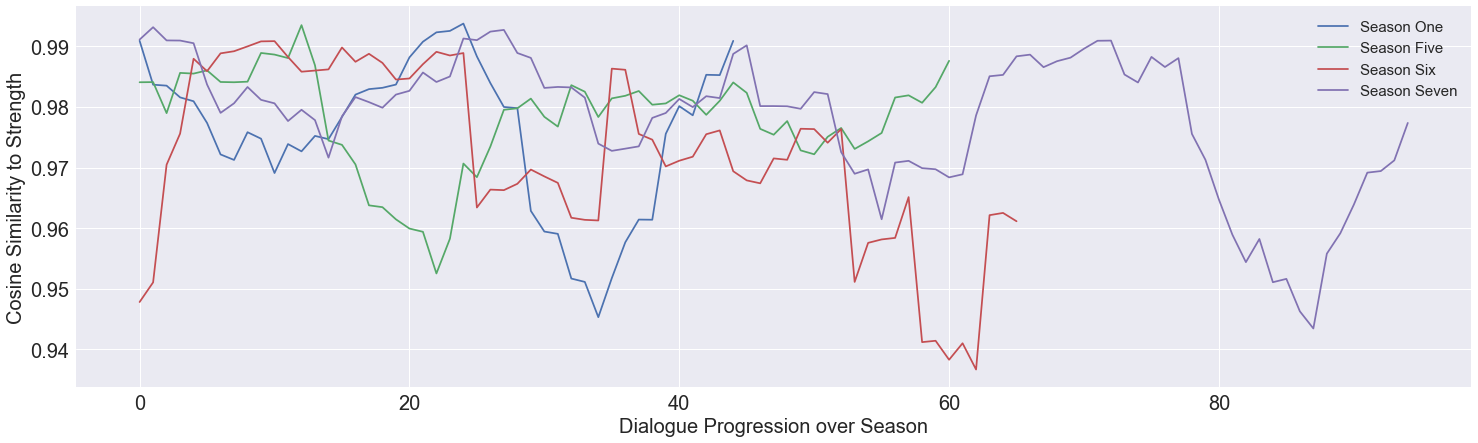

In [251]:
Sansa_Strength()

In [248]:
def Sansa_Command(runavg=10):
    y1 = np.array(command_SansaS1)    
    y_runavg1 = np.convolve(y1, np.ones((runavg,))/runavg, mode='valid')

    y2 = np.array(command_SansaS5)    
    y_runavg2 = np.convolve(y2, np.ones((runavg,))/runavg, mode='valid')
    
    y3 = np.array(command_SansaS6)    
    y_runavg3 = np.convolve(y3, np.ones((runavg,))/runavg, mode='valid')
    
    y4 = np.array(command_SansaS7)    
    y_runavg4 = np.convolve(y4, np.ones((runavg,))/runavg, mode='valid')
    
    
    x1 = np.array(range(0, len(y_runavg1)))
    x2 = np.array(range(0, len(y_runavg2)))
    x3 = np.array(range(0, len(y_runavg3)))
    x4 = np.array(range(0, len(y_runavg4)))
    
    
    figure, ax = plt.subplots(figsize=(25, 7))
    plt.plot(x1, y_runavg1, label = 'Season One');
    plt.plot(x2, y_runavg2, label = 'Season Five');
    plt.plot(x3, y_runavg3, label = 'Season Six');
    plt.plot(x4, y_runavg4, label = 'Season Seven');
    plt.legend(loc='upper right', prop={'size': 15})
    plt.xticks([0,20,40,60,80], fontsize = 20)
    plt.yticks([0.94,0.95,0.96,0.97,0.98,0.99], fontsize = 20)
    plt.xlabel('Dialogue Progression over Season', fontsize = 20)
    plt.ylabel('Cosine Similarity to Command', fontsize = 20)
    d = np.zeros(len(y_runavg2))

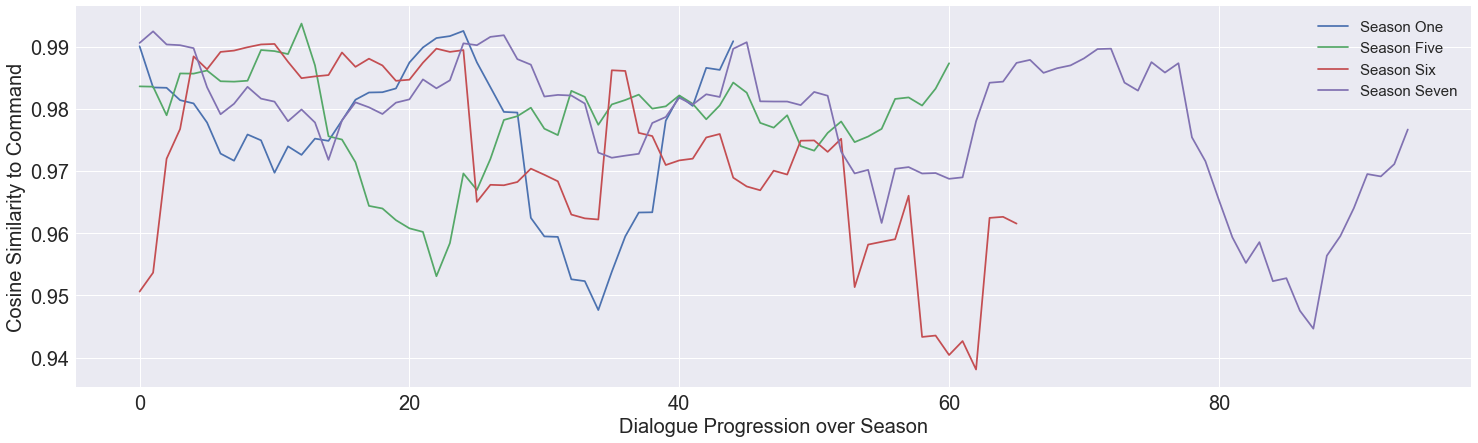

In [249]:
Sansa_Command()

In [224]:
def Sansa_Lead(runavg=10):
    y1 = np.array(lead_SansaS1)    
    y_runavg1 = np.convolve(y1, np.ones((runavg,))/runavg, mode='valid')

    y2 = np.array(lead_SansaS5)    
    y_runavg2 = np.convolve(y2, np.ones((runavg,))/runavg, mode='valid')
    
    y3 = np.array(lead_SansaS6)    
    y_runavg3 = np.convolve(y3, np.ones((runavg,))/runavg, mode='valid')
    
    y4 = np.array(lead_SansaS7)    
    y_runavg4 = np.convolve(y4, np.ones((runavg,))/runavg, mode='valid')
    
    
    x1 = np.array(range(0, len(y_runavg1)))
    x2 = np.array(range(0, len(y_runavg2)))
    x3 = np.array(range(0, len(y_runavg3)))
    x4 = np.array(range(0, len(y_runavg4)))
    
    
    figure, ax = plt.subplots(figsize=(25, 7))
    plt.plot(x1, y_runavg1, label = 'Season One');
    plt.plot(x2, y_runavg2, label = 'Season Five');
    plt.plot(x3, y_runavg3, label = 'Season Six');
    plt.plot(x4, y_runavg4, label = 'Season Seven');
    plt.legend(loc='upper right', prop={'size': 15})
    plt.xticks([0,20,40,60,80], fontsize = 20)
    plt.yticks([0.94,0.95,0.96,0.97,0.98,0.99], fontsize = 20)
    d = np.zeros(len(y_runavg2))

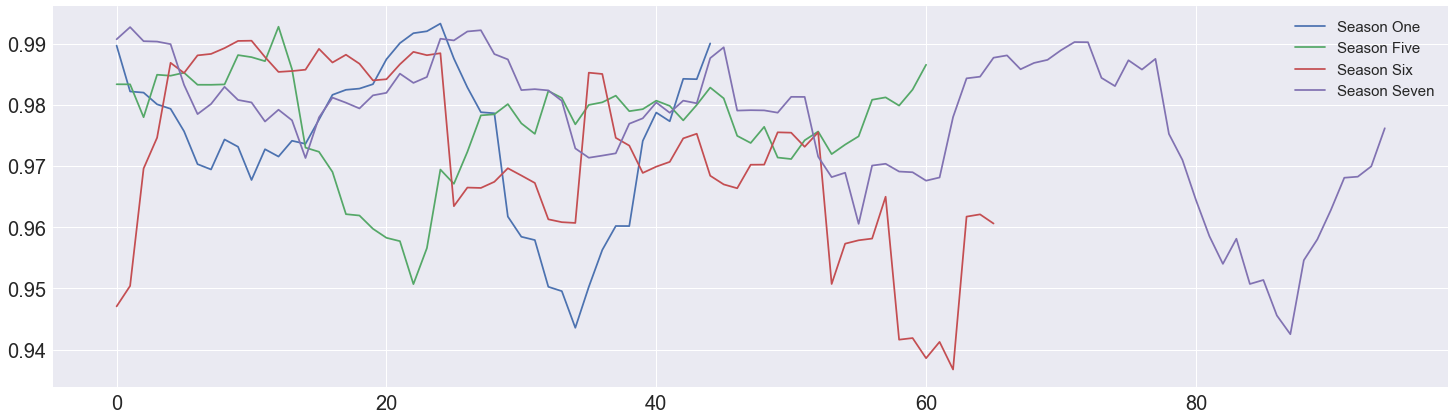

In [225]:
Sansa_Lead()

## T-SNE

In [296]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale

from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [297]:
model2.wv.vocab.items()

[('foul', <gensim.models.keyedvectors.Vocab at 0x116d11650>),
 ('four', <gensim.models.keyedvectors.Vocab at 0x11c964650>),
 ('hanging', <gensim.models.keyedvectors.Vocab at 0x11c964610>),
 ('marching', <gensim.models.keyedvectors.Vocab at 0x11c9645d0>),
 (u'increase', <gensim.models.keyedvectors.Vocab at 0x11d3e6750>),
 ('midafternoon', <gensim.models.keyedvectors.Vocab at 0x11c9642d0>),
 ('mutinied', <gensim.models.keyedvectors.Vocab at 0x11c964550>),
 ('lord', <gensim.models.keyedvectors.Vocab at 0x11c964410>),
 (u'sinking', <gensim.models.keyedvectors.Vocab at 0x11c964590>),
 ('leisurely', <gensim.models.keyedvectors.Vocab at 0x11c9643d0>),
 (u'politician', <gensim.models.keyedvectors.Vocab at 0x11c964490>),
 ('stabbed', <gensim.models.keyedvectors.Vocab at 0x11c964510>),
 ('bringing', <gensim.models.keyedvectors.Vocab at 0x11cbf5b50>),
 ('disturb', <gensim.models.keyedvectors.Vocab at 0x11c964210>),
 ('prize', <gensim.models.keyedvectors.Vocab at 0x11c9641d0>),
 ('wooden', <gensim

In [298]:
model2.wv.vocab.keys()

['foul',
 'four',
 'hanging',
 'marching',
 u'increase',
 'midafternoon',
 'mutinied',
 'lord',
 u'sinking',
 'leisurely',
 u'politician',
 'stabbed',
 'bringing',
 'disturb',
 'prize',
 'wooden',
 u'clientele',
 'succession',
 'straight',
 'tired',
 u'lefford',
 'bacon',
 'elegant',
 'second',
 'sailed',
 u'ruthless',
 'thunder',
 'cooking',
 'contributed',
 'resilient',
 'succumb',
 'hero',
 'interrupting',
 u'here',
 'substance',
 u'k',
 'climbed',
 'military',
 u'climber',
 'diplomat',
 'appropriately',
 'divide',
 'explained',
 'replace',
 'brought',
 'stern',
 'cheating',
 'spoke',
 u'cannibal',
 'occupying',
 'untie',
 'strike',
 'sideface',
 'holy',
 'relax',
 'successful',
 'brings',
 'hereby',
 'hurt',
 u'glass',
 u'hole',
 'hold',
 u'simper',
 u'benjens',
 'pursue',
 'zhoan',
 'blade',
 'plunged',
 'sweeter',
 'rework',
 'example',
 'triple',
 'organized',
 u'caution',
 'want',
 'counseling',
 'mymother',
 u'cocksucker',
 'absolute',
 'hog',
 'complaining',
 u'travel',
 'cop

In [192]:
model_list = []

for i in model2.wv.vocab.keys():
    model_list.append(model2.wv[i])

In [193]:
model_list

[array([-0.21895841, -0.02763083, -0.02533996, -0.12749611, -0.11693509,
        -0.08413357, -0.11394288, -0.17344464, -0.0122849 , -0.16525616,
         0.02456509, -0.09868202,  0.13757229, -0.12037823, -0.00426018,
         0.17905527,  0.0766762 , -0.08178438, -0.11475994, -0.01547036,
        -0.23651417, -0.1689259 ,  0.03163357,  0.18515061,  0.17237356,
        -0.14502779, -0.01301234, -0.08791047, -0.07668535, -0.09223637,
        -0.2934753 ,  0.04050505, -0.00862944, -0.10292251,  0.04342626,
        -0.04497596, -0.18566832, -0.07117318,  0.07588761,  0.16731715,
        -0.11345328,  0.0137415 , -0.03094495, -0.12630787,  0.12433449,
        -0.22019088,  0.1259709 ,  0.00243215, -0.01951397,  0.17254464,
         0.21271387,  0.07118208, -0.12958622, -0.04951456, -0.12664895,
        -0.15047415,  0.00609941,  0.06127166, -0.17859294, -0.16586791,
         0.09782324, -0.08504821,  0.1577128 , -0.14914678,  0.03164778,
        -0.10216072, -0.03053574,  0.03671831,  0.0

In [194]:
model_vectors = pd.DataFrame(model_list)
model_vectors.shape

(6913, 100)

In [195]:
model_vectors = model_vectors.reset_index()

In [196]:
model_vectors['index'] = model2.wv.vocab.keys()

In [197]:
model_vectors = model_vectors.set_index('index')

In [198]:
model_vectors.head()

0         1         2         3         4         5   \
index                                                                  
foul     -0.218958 -0.027631 -0.025340 -0.127496 -0.116935 -0.084134   
four     -0.292320 -0.037228 -0.033813 -0.178397 -0.145268 -0.105070   
hanging  -0.146177 -0.024025 -0.018082 -0.086348 -0.071098 -0.057387   
marching -0.274863 -0.026962 -0.031919 -0.159898 -0.141323 -0.102162   
increase -0.050721 -0.001706 -0.009619 -0.031306 -0.025878 -0.018769   

                6         7         8         9         10        11  \
index                                                                  
foul     -0.113943 -0.173445 -0.012285 -0.165256  0.024565 -0.098682   
four     -0.160486 -0.235916 -0.027779 -0.215857  0.034977 -0.129770   
hanging  -0.081815 -0.114833 -0.013845 -0.102159  0.016630 -0.066644   
marching -0.151645 -0.233978 -0.029324 -0.202831  0.046262 -0.123036   
increase -0.030241 -0.048526 -0.007004 -0.039561  0.004097 -0.021512   

                12        13        14        15        16        17  \
index                                                                  
foul      0.137572 -0.120378 -0.004260  0.179055  0.076676 -0.081784   
four      0.181703 -0.145441 -0.007669  0.236347  0.102033 -0.101262   
hanging   0.093890 -0.072149 -0.006174  0.118313  0.054827 -0.056394   
marching  0.168382 -0.140342 -0.011753  0.227067  0.105260 -0.095929   
increase  0.038092 -0.030339  0.000564  0.044783  0.024269 -0.022324   

                18        19        20        21        22        23  \
index                                                                  
foul     -0.114760 -0.015470 -0.236514 -0.168926  0.031634  0.185151   
four     -0.151133 -0.021090 -0.310629 -0.237237  0.041922  0.239534   
hanging  -0.071275 -0.007832 -0.157815 -0.115106  0.021690  0.123213   
marching -0.131012 -0.021534 -0.296355 -0.221224  0.029678  0.234807   
increase -0.030176 -0.008697 -0.055701 -0.043480  0.012401  0.044517   

                24        25        26        27        28        29  \
index                                                                  
foul      0.172374 -0.145028 -0.013012 -0.087910 -0.076685 -0.092236   
four      0.228187 -0.198781 -0.023143 -0.108122 -0.105262 -0.118001   
hanging   0.116219 -0.098328 -0.009621 -0.061424 -0.056327 -0.060219   
marching  0.227067 -0.182869 -0.023271 -0.111961 -0.102946 -0.106298   
increase  0.042669 -0.040179 -0.005718 -0.018105 -0.015187 -0.022103   

                30        31        32        33        34        35  \
index                                                                  
foul     -0.293475  0.040505 -0.008629 -0.102923  0.043426 -0.044976   
four     -0.379778  0.052380 -0.020498 -0.130616  0.062409 -0.066047   
hanging  -0.193444  0.026974 -0.012393 -0.062632  0.026588 -0.035136   
marching -0.362918  0.051106 -0.010612 -0.131157  0.058857 -0.065418   
increase -0.067151  0.008659  0.001450 -0.025871  0.012314 -0.008490   

                36        37        38        39        40        41  \
index                                                                  
foul     -0.185668 -0.071173  0.075888  0.167317 -0.113453  0.013741   
four     -0.232509 -0.092718  0.089942  0.216443 -0.141052  0.008233   
hanging  -0.115809 -0.047035  0.050191  0.117045 -0.073334  0.007595   
marching -0.222926 -0.083284  0.087184  0.217138 -0.136456  0.004732   
increase -0.043152 -0.018767  0.018464  0.045727 -0.029332 -0.003578   

                42        43        44        45        46        47  \
index                                                                  
foul     -0.030945 -0.126308  0.124334 -0.220191  0.125971  0.002432   
four     -0.026266 -0.172420  0.159509 -0.276621  0.168638  0.004659   
hanging  -0.020652 -0.081674  0.082103 -0.142958  0.088190  0.005479   
marching -0.029290 -0.162868  0.160757 -0.266473  0.157215  0.015486   
increase -0.001616 -0.028918  0.034067 -0.053941 

In [199]:
pca20 = PCA(n_components=20)
pca50 = PCA(n_components=50)

pca_results20 = pca20.fit_transform(model_vectors)
pca_results50 = pca50.fit_transform(model_vectors)

In [200]:
pca_results_20 = pd.DataFrame(pca_results20)
pca_results_50 = pd.DataFrame(pca_results50)

In [201]:
pca_results_20 = pca_results_20.reset_index()
pca_results_50 = pca_results_50.reset_index()

In [202]:
pca_results_20['index'] = model2.wv.vocab.keys()
pca_results_50['index'] = model2.wv.vocab.keys()

In [203]:
pca_results_20 = pca_results_20.set_index('index')
pca_results_50 = pca_results_50.set_index('index')

In [204]:
pca_results_20.head()

0         1         2         3         4         5   \
index                                                                  
foul      0.474689 -0.013615 -0.026431  0.001555  0.007833 -0.007283   
four      0.849333 -0.019894 -0.015080  0.027527  0.007218 -0.000819   
hanging   0.078092 -0.007442 -0.009818  0.009329  0.000651  0.001250   
marching  0.777897 -0.000679 -0.003330  0.028825 -0.007666 -0.010115   
increase -0.420678  0.002786  0.001918 -0.001102 -0.001464  0.007452   

                6         7         8         9         10        11  \
index                                                                  
foul      0.004142  0.003128  0.000228 -0.002262 -0.001478 -0.004655   
four      0.000370  0.013364 -0.003456  0.008788 -0.007896 -0.002775   
hanging   0.006071 -0.003545 -0.005601 -0.002663 -0.006535  0.000355   
marching -0.013925 -0.004161 -0.007496 -0.003839  0.000741  0.000758   
increase  0.000481  0.001130 -0.003900 -0.000512 -0.000302  0.002565   

                12        13        14        15        16        17  \
index                                                                  
foul     -0.005156  0.006193 -0.001527 -0.001313 -0.001968 -0.001566   
four     -0.000791  0.002003  0.002752  0.003361  0.000681  0.003989   
hanging  -0.004990  0.001966 -0.001513 -0.003298  0.004782  0.000651   
marching -0.002063 -0.008236  0.003429  0.001463 -0.001657 -0.002010   
increase  0.004947 -0.000338 -0.002923  0.001308 -0.006971  0.002741   

                18        19  
index                         
foul      0.002061 -0.001599  
four     -0.002627  0.007429  
hanging  -0.003719 -0.006147  
marching  0.002613  0.003620  
increase  0.000515  0.001885

In [205]:
pca_results_50.head()

0         1         2         3         4         5   \
index                                                                  
foul      0.474689 -0.013615 -0.026431  0.001555  0.007833 -0.007283   
four      0.849333 -0.019894 -0.015080  0.027527  0.007218 -0.000819   
hanging   0.078092 -0.007442 -0.009818  0.009329  0.000651  0.001250   
marching  0.777897 -0.000679 -0.003330  0.028825 -0.007666 -0.010115   
increase -0.420678  0.002786  0.001918 -0.001102 -0.001464  0.007452   

                6         7         8         9         10        11  \
index                                                                  
foul      0.004142  0.003128  0.000227 -0.002262 -0.001478 -0.004655   
four      0.000370  0.013364 -0.003456  0.008786 -0.007896 -0.002779   
hanging   0.006070 -0.003545 -0.005601 -0.002662 -0.006535  0.000359   
marching -0.013925 -0.004161 -0.007496 -0.003838  0.000739  0.000758   
increase  0.000481  0.001130 -0.003901 -0.000512 -0.000301  0.002565   

                12        13        14        15        16        17  \
index                                                                  
foul     -0.005155  0.006190 -0.001530 -0.001320 -0.002024 -0.001550   
four     -0.000789  0.001997  0.002722  0.003343  0.000653  0.003990   
hanging  -0.004995  0.001966 -0.001494 -0.003282  0.004764  0.000658   
marching -0.002063 -0.008233  0.003440  0.001480 -0.001697 -0.001967   
increase  0.004949 -0.000342 -0.002936  0.001296 -0.007052  0.002794   

                18        19        20        21        22        23  \
index                                                                  
foul      0.002062 -0.001619 -0.000180  0.000227 -0.003269  0.001675   
four     -0.002689  0.007517 -0.002357  0.002747 -0.001412 -0.002194   
hanging  -0.003683 -0.006110  0.002515  0.002692 -0.002687 -0.003326   
marching  0.002646  0.003722  0.008891  0.002724  0.002916  0.001271   
increase  0.000588  0.001785  0.000991  0.000796 -0.005198  0.002996   

                24        25        26        27        28        29  \
index                                                                  
foul     -0.000528 -0.006400 -0.002048  0.000483 -0.006492 -0.001257   
four      0.000063  0.003858  0.006363 -0.001393  0.002360  0.005085   
hanging   0.003352  0.004048 -0.003702 -0.002388  0.000878 -0.005629   
marching -0.001442  0.001238  0.000046 -0.005243 -0.004592  0.000282   
increase  0.001563  0.000706 -0.000564  0.001770 -0.003862  0.004646   

                30        31        32        33        34        35  \
index                                                                  
foul      0.002170  0.001052  0.001317 -0.000684 -0.003577 -0.000746   
four      0.004042 -0.000338  0.004045 -0.002222  0.000911 -0.002581   
hanging  -0.003827 -0.003986 -0.002265  0.004816  0.000421 -0.000881   
marching -0.001244 -0.004637 -0.001982  0.002273  0.000270 -0.002463   
increase -0.006829  0.004211  0.000874  0.003218 -0.002605  0.000726   

                36        37        38        39        40        41  \
index                                                                  
foul      0.000304  0.001407 -0.002877 -0.001089  0.001580 -0.001457   
four      0.001210  0.000979  0.001836  0.004713 -0.003123 -0.002697   
hanging  -0.000781  0.001167 -0.007246  0.001348 -0.002135  0.000690   
marching  0.002354 -0.006582  0.003763 -0.001867  0.000302 -0.002230   
increase  0.000154  0.002137 -0.003212 -0.001730  0.005530 -0.002463   

                42        43        44        45        46        47  \
index                                                                  
foul     -0.001979 -0.001443  0.003949  0.005808 -0.000898  0.000397   
four     -0.003097 -0.001085  0.001913 -0.005103  0.002033  0.002059   
hanging   0.002328  0.004555  0.001138  0.002357 -0.001353 -0.003787   
marching -0.006799  0.005570  0.000566  0.000201 -0.003101 -0.005802   
increase -0.005149  0.000199 -0.000920 -0.003216 

In [206]:
tsne = TSNE(n_components=2)

tsne_pca_results20 = tsne.fit_transform(pca_results20)
tsne_pca_results50 = tsne.fit_transform(pca_results50)

In [207]:
tsne_pca_results_20 = pd.DataFrame(tsne_pca_results20)
tsne_pca_results_50 = pd.DataFrame(tsne_pca_results50)

In [208]:
tsne_pca_results_20 = tsne_pca_results_20.reset_index()
tsne_pca_results_50 = tsne_pca_results_50.reset_index()

In [209]:
tsne_pca_results_20['index'] = model2.wv.vocab.keys()
tsne_pca_results_50['index'] = model2.wv.vocab.keys()

In [210]:
tsne_pca_results_20 = tsne_pca_results_20.set_index('index')
tsne_pca_results_50 = tsne_pca_results_50.set_index('index')

In [211]:
tsne_pca_results_20.head(10)

0             1
index                                   
foul         -9.975996e+14 -1.464251e+16
four         -3.076685e+16 -1.790722e+17
hanging      -4.798627e+15  5.664168e+16
marching     -8.322796e+15 -6.473470e+16
increase     -1.008837e+16 -2.261443e+16
midafternoon -3.910365e+14 -1.743923e+16
mutinied      1.437132e+15 -2.030047e+17
lord         -6.754347e+16 -6.474843e+16
sinking      -2.064526e+17 -1.078260e+18
leisurely    -6.821710e+15 -6.562077e+16

In [212]:
tsne_pca_results_50.head(10)

0             1
index                                   
foul         -1.386226e+17 -3.899036e+16
four         -1.046255e+16 -2.100086e+16
hanging      -1.993466e+15  6.878746e+14
marching     -2.160945e+16 -4.094508e+16
increase     -1.028987e+15 -4.948704e+16
midafternoon -3.327806e+16 -4.329291e+16
mutinied      3.496745e+15 -2.262644e+16
lord         -2.228017e+16  3.559105e+16
sinking       9.624072e+14 -5.042417e+16
leisurely    -1.121176e+17  1.451831e+16

In [213]:
tsne_pca_results20

array([[ -9.97599567e+14,  -1.46425130e+16],
       [ -3.07668525e+16,  -1.79072174e+17],
       [ -4.79862686e+15,   5.66416842e+16],
       ..., 
       [ -2.31533254e+16,   4.96860342e+16],
       [ -1.23644711e+16,  -2.34643331e+16],
       [ -7.22218699e+16,   1.05559853e+17]])

In [214]:
tsne_pca_results50

array([[ -1.38622625e+17,  -3.89903623e+16],
       [ -1.04625467e+16,  -2.10008563e+16],
       [ -1.99346577e+15,   6.87874554e+14],
       ..., 
       [  7.11088359e+15,  -2.77318333e+16],
       [  2.78712806e+15,   3.02658131e+14],
       [ -1.11248771e+18,   2.98234129e+17]])

In [215]:
tsne_pca_results_20.index

Index([        u'foul',         u'four',      u'hanging',     u'marching',
           u'increase', u'midafternoon',     u'mutinied',         u'lord',
            u'sinking',    u'leisurely',
       ...
              u'lance',       u'risked',       u'squeak',       u'oberyn',
              u'cliff',    u'auxiliary',        u'wylla',    u'firestorm',
         u'baratheons',  u'furthermore'],
      dtype='object', name=u'index', length=6913)

In [ ]:
import numpy as Math
import pylab as Plot
import matplotlib.pyplot as plt

rows = tsne_pca_results_20.index
%matplotlib notebook
plt.ion()

Plot.figure(figsize=(20, 10))
max_x = Math.amax(tsne_pca_results20, axis=0)[0]
max_y = Math.amax(tsne_pca_results20, axis=0)[1]
#Plot.xlim((-.125e+20,.25e+20))
#Plot.ylim((-.125+e20,.1e20))

Plot.scatter(tsne_pca_results20[:, 0], tsne_pca_results20[:, 1], 20);

for row_id in range(0, len(rows)):
    target_word = rows[row_id]
    x = tsne_pca_results20[row_id, 0]
    y = tsne_pca_results20[row_id, 1]
    Plot.annotate(target_word, (x,y))

Plot.savefig("tsne_2000.png");

In [ ]:
import numpy as Math
import pylab as Plot

rows = tsne_pca_results_50.index

Plot.figure(figsize=(20, 20))
max_x = Math.amax(tsne_pca_results50, axis=0)[0]
max_y = Math.amax(tsne_pca_results50, axis=0)[1]
Plot.xlim((-max_x,max_x))
Plot.ylim((-max_y,max_y))

Plot.scatter(tsne_pca_results50[:, 0], tsne_pca_results50[:, 1], 20);

for row_id in range(0, len(rows)):
    target_word = rows[row_id]
    x = tsne_pca_results50[row_id, 0]
    y = tsne_pca_results50[row_id, 1]
    Plot.annotate(target_word, (x,y))

Plot.savefig("tsne_5000.png");

## Dependency Parsing

In [150]:
String_AryaS1 = ' '.join(AryaS1)
String_AryaS5 = ' '.join(AryaS5)
String_AryaS6 = ' '.join(AryaS6)
String_AryaS7 = ' '.join(AryaS7)

String_CerseiS1 = ' '.join(CerseiS1)
String_CerseiS5 = ' '.join(CerseiS5)
String_CerseiS6 = ' '.join(CerseiS6)
String_CerseiS7 = ' '.join(CerseiS7)

String_DaenerysS1 = ' '.join(DaenerysS1)
String_DaenerysS5 = ' '.join(DaenerysS5)
String_DaenerysS6 = ' '.join(DaenerysS6)
String_DaenerysS7 = ' '.join(DaenerysS7)

String_SansaS1 = ' '.join(SansaS1)
String_SansaS5 = ' '.join(SansaS5)
String_SansaS6 = ' '.join(SansaS6)
String_SansaS7 = ' '.join(SansaS7)

String_JaimeS1 = ' '.join(JaimeS1)
String_JaimeS5 = ' '.join(JaimeS5)
String_JaimeS6 = ' '.join(JaimeS6)
String_JaimeS7 = ' '.join(JaimeS7)

String_JonS1 = ' '.join(JonS1)
String_JonS5 = ' '.join(JonS5)
String_JonS6 = ' '.join(JonS6)
String_JonS7 = ' '.join(JonS7)

String_TyrionS1 = ' '.join(TyrionS1)
String_TyrionS5 = ' '.join(TyrionS5)
String_TyrionS6 = ' '.join(TyrionS6)
String_TyrionS7 = ' '.join(TyrionS7)

In [151]:
String_AryaS1

u"  Watch.    Shut up.   I think so.    I know which end to use.    Sansa can keep her sewing needles.   What are you doing here?   Stop it!    Nymeria!    You've got to go.    Go!   No.    That's not true!    That's not what happened!    Liar!   Liar!    Liar liar liar!   Lady wasn't there!    I'm practicing.   The Prince.   The Hound does whatever the Prince tells him to do.   You're a liar.   Go away!    Mine.   I wasn't playing.    It's called Needle.   Stick 'em with the pointy end.   I was trying to learn.   I hate them!   So was I!   But how you can let her marry someone like that?   Winter is coming.   I don't hate her.   I can keep it?    Who are you?    It's too heavy.   What if I drop it?   I'm a girl.   Syrio says every hurt is a lesson and every lesson makes you better.   Now that Bran's awake will he come live with us?  He wants to be a knight of the King\u2019s Guard.   Can I be Lord of a holdfast?   Why do they call you Littlefinger?   I'm not a beggar.   I want to see 

In [152]:
import spacy
from spacy.en import English

nlp = spacy.en.English()

In [153]:
NLP_AryaS1 = nlp(String_AryaS1)
NLP_AryaS5 = nlp(String_AryaS5)
NLP_AryaS6 = nlp(String_AryaS6)
NLP_AryaS7 = nlp(String_AryaS7)

NLP_CerseiS1 = nlp(String_CerseiS1)
NLP_CerseiS5 = nlp(String_CerseiS5)
NLP_CerseiS6 = nlp(String_CerseiS6)
NLP_CerseiS7 = nlp(String_CerseiS7)

NLP_DaenerysS1 = nlp(String_DaenerysS1)
NLP_DaenerysS5 = nlp(String_DaenerysS5)
NLP_DaenerysS6 = nlp(String_DaenerysS6)
NLP_DaenerysS7 = nlp(String_DaenerysS7)

NLP_SansaS1 = nlp(String_SansaS1)
NLP_SansaS5 = nlp(String_SansaS5)
NLP_SansaS6 = nlp(String_SansaS6)
NLP_SansaS7 = nlp(String_SansaS7)

NLP_JaimeS1 = nlp(String_JaimeS1)
NLP_JaimeS5 = nlp(String_JaimeS5)
NLP_JaimeS6 = nlp(String_JaimeS6)
NLP_JaimeS7 = nlp(String_JaimeS7)

NLP_JonS1 = nlp(String_JonS1)
NLP_JonS5 = nlp(String_JonS5)
NLP_JonS6 = nlp(String_JonS6)
NLP_JonS7 = nlp(String_JonS7)

NLP_TyrionS1 = nlp(String_TyrionS1)
NLP_TyrionS5 = nlp(String_TyrionS5)
NLP_TyrionS6 = nlp(String_TyrionS6)
NLP_TyrionS7 = nlp(String_TyrionS7)

In [154]:
type(NLP_AryaS1)

spacy.tokens.doc.Doc

In [155]:
NLP_AryaS1

  Watch.    Shut up.   I think so.    I know which end to use.    Sansa can keep her sewing needles.   What are you doing here?   Stop it!    Nymeria!    You've got to go.    Go!   No.    That's not true!    That's not what happened!    Liar!   Liar!    Liar liar liar!   Lady wasn't there!    I'm practicing.   The Prince.   The Hound does whatever the Prince tells him to do.   You're a liar.   Go away!    Mine.   I wasn't playing.    It's called Needle.   Stick 'em with the pointy end.   I was trying to learn.   I hate them!   So was I!   But how you can let her marry someone like that?   Winter is coming.   I don't hate her.   I can keep it?    Who are you?    It's too heavy.   What if I drop it?   I'm a girl.   Syrio says every hurt is a lesson and every lesson makes you better.   Now that Bran's awake will he come live with us?  He wants to be a knight of the King’s Guard.   Can I be Lord of a holdfast?   Why do they call you Littlefinger?   I'm not a beggar.   I want to see my fath

In [156]:
nounphrases_aryas1 = [[np.orth_, np.root.head.orth_] for np in NLP_AryaS1.noun_chunks]

In [157]:
nounphrases_aryas1

[[u'Watch', u'Watch'],
 [u'I', u'think'],
 [u'I', u'know'],
 [u'Sansa', u'keep'],
 [u'her', u'keep'],
 [u'What', u'doing'],
 [u'you', u'doing'],
 [u'it', u'Stop'],
 [u'Nymeria', u'Nymeria'],
 [u'You', u'got'],
 [u'what', u'happened'],
 [u'Liar', u'Liar'],
 [u'Liar!    Liar liar liar', u'liar'],
 [u'Lady', u'was'],
 [u'I', u'practicing'],
 [u'The Prince', u'Prince'],
 [u'The Hound', u'does'],
 [u'the Prince', u'tells'],
 [u'him', u'tells'],
 [u'You', u"'re"],
 [u'a liar', u"'re"],
 [u'Mine', u'Mine'],
 [u'I', u'playing'],
 [u'It', u'called'],
 [u"'em", u'Stick'],
 [u'the pointy end', u'with'],
 [u'I', u'trying'],
 [u'I', u'hate'],
 [u'them', u'hate'],
 [u'I', u'was'],
 [u'you', u'let'],
 [u'her', u'marry'],
 [u'someone', u'marry'],
 [u'Winter', u'is'],
 [u'I', u'hate'],
 [u'her', u'hate'],
 [u'I', u'keep'],
 [u'it', u'keep'],
 [u'Who', u'are'],
 [u'you', u'are'],
 [u'It', u"'s"],
 [u'What', u'What'],
 [u'I', u'drop'],
 [u'it', u'drop'],
 [u'I', u"'m"],
 [u'a girl', u"'m"],
 [u'Syrio', u

In [169]:
for word in NLP_AryaS1:
    print(word.text, word.lemma_, word.tag_, word.pos_)

(u'  ', u'  ', u'SP', u'SPACE')
(u'Watch', u'watch', u'NN', u'NOUN')
(u'.', u'.', u'.', u'PUNCT')
(u'   ', u'   ', u'SP', u'SPACE')
(u'Shut', u'shut', u'VB', u'VERB')
(u'up', u'up', u'RP', u'PART')
(u'.', u'.', u'.', u'PUNCT')
(u'  ', u'  ', u'SP', u'SPACE')
(u'I', u'-PRON-', u'PRP', u'PRON')
(u'think', u'think', u'VBP', u'VERB')
(u'so', u'so', u'RB', u'ADV')
(u'.', u'.', u'.', u'PUNCT')
(u'   ', u'   ', u'SP', u'SPACE')
(u'I', u'-PRON-', u'PRP', u'PRON')
(u'know', u'know', u'VBP', u'VERB')
(u'which', u'which', u'WDT', u'ADJ')
(u'end', u'end', u'VBP', u'VERB')
(u'to', u'to', u'TO', u'PART')
(u'use', u'use', u'VB', u'VERB')
(u'.', u'.', u'.', u'PUNCT')
(u'   ', u'   ', u'SP', u'SPACE')
(u'Sansa', u'sansa', u'NNP', u'PROPN')
(u'can', u'can', u'MD', u'VERB')
(u'keep', u'keep', u'VB', u'VERB')
(u'her', u'-PRON-', u'PRP', u'PRON')
(u'sewing', u'sewing', u'NN', u'NOUN')
(u'needles', u'needle', u'NNS', u'NOUN')
(u'.', u'.', u'.', u'PUNCT')
(u'  ', u'  ', u'SP', u'SPACE')
(u'What', u'what', u'

## Speaker Predictions

In [ ]:
String_Arya_Total = (String_AryaS1 + String_AryaS5 + String_AryaS6 + String_AryaS7)
String_Cersei_Total = (String_CerseiS1 + String_CerseiS5 + String_CerseiS6 + String_CerseiS7)
String_Daenerys_Total = (String_DaenerysS1 + String_DaenerysS5 + String_DaenerysS6 + String_DaenerysS7)
String_Sansa_Total = (String_SansaS1 + String_SansaS5 + String_SansaS6 + String_SansaS7)
String_Jaime_Total = (String_JaimeS1 + String_JaimeS5 + String_JaimeS6 + String_JaimeS7)
String_Jon_Total = (String_JonS1 + String_JonS5 + String_JaimeS6 + String_JonS7)
String_Tyrion_Total = (String_TyrionS1 + String_TyrionS5 + String_TyrionS6 + String_TyrionS7)

In [ ]:
Main_Characters_Text = (String_Arya_Total + String_Cersei_Total + String_Daenerys_Total + String_Sansa_Total +
                       String_Jaime_Total + String_Jon_Total + String_Tyrion_Total)

In [ ]:
Main_Characters_Text = ''.join([i for i in Main_Characters_Text if not i.isdigit()])

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = TfidfVectorizer(stop_words="english", ngram_range=(1,2))
doc_vectors = vectorizer.fit_transform(Main_Characters_Text)

classes = np.array()

model = MultinomialNB().fit(doc_vectors, classes)